In [16]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 

In [17]:
import sigmoid_logistic_regression
import softmax_logistic_regression
import reduceClasses
import binaryRatio
import train_with_dir
import auc_test 
import test
import get_confidence_interval

In [18]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0.5
learning_rate = 0.00001

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (6, 8)

In [19]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             
                            

reduced_train_mnist = reduceClasses.Reduce(train_mnist, NUM_CLASSES_REDUCED, nums=nums)
reduced_test_mnist = reduceClasses.Reduce(test_mnist, NUM_CLASSES_REDUCED, nums=nums)


reduced_train_mnist_ratio = binaryRatio.Ratio(train_mnist, 2, ratio, nums=nums)

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [20]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)

In [6]:
loss = nn.CrossEntropyLoss()

In [ ]:
# SOFTMAX 10 CLASSES 

accuracies = []
for i in range(10):
    model_accuracies = []
    network = softmax_logistic_regression.Net(NUM_CLASSES)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    _, acc = test.test(test_loader_normal, network, loss_fn=loss, return_acc=True) 
    model_accuracies.append(acc)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_normal, network, optimizer, f'softmax_sigmoid_results/softmax_results/normal{i}/model{epoch}', loss_fn=loss, datatype="long")
        _, acc = test.test(test_loader_normal, network, loss_fn=loss, return_acc=True)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0023, Accuracy: 1754/10000 (18%)
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.320030
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.064328
Train Epoch: 0 [1280/60000 (2%)]	Loss: 1.931846
Train Epoch: 0 [1920/60000 (3%)]	Loss: 1.759002
Train Epoch: 0 [2560/60000 (4%)]	Loss: 1.557255
Train Epoch: 0 [3200/60000 (5%)]	Loss: 1.524203
Train Epoch: 0 [3840/60000 (6%)]	Loss: 1.369615
Train Epoch: 0 [4480/60000 (7%)]	Loss: 1.265486
Train Epoch: 0 [5120/60000 (9%)]	Loss: 1.310542
Train Epoch: 0 [5760/60000 (10%)]	Loss: 1.251088
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.109846
Train Epoch: 0 [7040/60000 (12%)]	Loss: 1.162743
Train Epoch: 0 [7680/60000 (13%)]	Loss: 1.152247
Train Epoch: 0 [8320/60000 (14%)]	Loss: 1.021806
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.894261
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.984585
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.952966
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.868884
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.946464
Train Epoch: 0 [12160/

Train Epoch: 1 [45440/60000 (76%)]	Loss: 0.742743
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.545995
Train Epoch: 1 [46720/60000 (78%)]	Loss: 0.465999
Train Epoch: 1 [47360/60000 (79%)]	Loss: 0.454007
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.276467
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.379515
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.278936
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.449995
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.571251
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.460772
Train Epoch: 1 [51840/60000 (86%)]	Loss: 0.350577
Train Epoch: 1 [52480/60000 (87%)]	Loss: 0.211418
Train Epoch: 1 [53120/60000 (88%)]	Loss: 0.465467
Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.268168
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.351707
Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.378024
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.432629
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.384459
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.412542
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.484938


Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.457370
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.517017
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.398797
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.444599
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.377482
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.194185
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.367468
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.433155
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.343475
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.384025
Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.404030
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.360315
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.290749
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.211689
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.369088
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.282339
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.467114
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.340789
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.424326
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.467762


Train Epoch: 5 [15360/60000 (26%)]	Loss: 0.252687
Train Epoch: 5 [16000/60000 (27%)]	Loss: 0.510596
Train Epoch: 5 [16640/60000 (28%)]	Loss: 0.457938
Train Epoch: 5 [17280/60000 (29%)]	Loss: 0.190266
Train Epoch: 5 [17920/60000 (30%)]	Loss: 0.278120
Train Epoch: 5 [18560/60000 (31%)]	Loss: 0.378151
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.400202
Train Epoch: 5 [19840/60000 (33%)]	Loss: 0.259166
Train Epoch: 5 [20480/60000 (34%)]	Loss: 0.241700
Train Epoch: 5 [21120/60000 (35%)]	Loss: 0.315751
Train Epoch: 5 [21760/60000 (36%)]	Loss: 0.107336
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.281581
Train Epoch: 5 [23040/60000 (38%)]	Loss: 0.413139
Train Epoch: 5 [23680/60000 (39%)]	Loss: 0.581828
Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.270580
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.379597
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.254583
Train Epoch: 5 [26240/60000 (44%)]	Loss: 0.361130
Train Epoch: 5 [26880/60000 (45%)]	Loss: 0.463485
Train Epoch: 5 [27520/60000 (46%)]	Loss: 0.245548


In [ ]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), accuracies[i])
plt.title("Logistic Regression 10 Classes with Softmax")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend() 

In [ ]:
# SIGMOID 10 CLASSES 

accuracies = []
for i in range(10):
    model_accuracies = []
    network = sigmoid_logistic_regression.Net(NUM_CLASSES)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    _, acc = test.test(test_loader_normal, network, loss_fn=loss, return_acc=True) 
    model_accuracies.append(acc)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_normal, network, optimizer, f'softmax_sigmoid_results/sigmoid_results/normal{i}/model{epoch}', loss_fn=loss, datatype="long")
        _, acc = test.test(test_loader_normal, network, loss_fn=loss, return_acc=True)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)

In [ ]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), accuracies[i])
plt.title("Logistic Regression 10 Classes with Sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend() 

In [8]:
# SOFTMAX 2 CLASSES 

aucs = []
for i in range(10):
    model_aucs = []
    network = softmax_logistic_regression.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    _, auc = auc_test.softmax_test(test_loader_reduced, network) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_reduced, network, optimizer, f'softmax_sigmoid_results/softmax_results/reduced{i}/model{epoch}')
        _, auc = auc_test.softmax_test(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs) # (10, 20)

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.025478993883784513, AUC: 0.5155745628512515 

Train Epoch: 0 [0/11769 (0%)]	Loss: 25.968010
Train Epoch: 0 [640/11769 (5%)]	Loss: 3.914133
Train Epoch: 0 [1280/11769 (11%)]	Loss: 2.805835
Train Epoch: 0 [1920/11769 (16%)]	Loss: 3.573001
Train Epoch: 0 [2560/11769 (22%)]	Loss: 1.448614
Train Epoch: 0 [3200/11769 (27%)]	Loss: 0.274659
Train Epoch: 0 [3840/11769 (33%)]	Loss: 0.969757
Train Epoch: 0 [4480/11769 (38%)]	Loss: 2.254777
Train Epoch: 0 [5120/11769 (43%)]	Loss: 0.909472
Train Epoch: 0 [5760/11769 (49%)]	Loss: 0.153815
Train Epoch: 0 [6400/11769 (54%)]	Loss: 2.000716
Train Epoch: 0 [7040/11769 (60%)]	Loss: 0.463914
Train Epoch: 0 [7680/11769 (65%)]	Loss: 0.814221
Train Epoch: 0 [8320/11769 (71%)]	Loss: 0.410788
Train Epoch: 0 [8960/11769 (76%)]	Loss: 1.183786
Train Epoch: 0 [9600/11769 (82%)]	Loss: 0.411826
Train Epoch: 0 [10240/11769 (87%)]	Loss: 0.005077
Train Epoch: 0 [10880/11769 (92%)]	Loss: 0.000001
Train Epoch: 0 [11520/11769 (98%)]	Loss: 0.000323



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [2560/11769 (22%)]	Loss: 0.124546
Train Epoch: 1 [3200/11769 (27%)]	Loss: 0.854291
Train Epoch: 1 [3840/11769 (33%)]	Loss: 0.523802
Train Epoch: 1 [4480/11769 (38%)]	Loss: 1.118245
Train Epoch: 1 [5120/11769 (43%)]	Loss: 0.366134
Train Epoch: 1 [5760/11769 (49%)]	Loss: 0.000657
Train Epoch: 1 [6400/11769 (54%)]	Loss: 1.281855
Train Epoch: 1 [7040/11769 (60%)]	Loss: 0.224083
Train Epoch: 1 [7680/11769 (65%)]	Loss: 0.235144
Train Epoch: 1 [8320/11769 (71%)]	Loss: 0.025108
Train Epoch: 1 [8960/11769 (76%)]	Loss: 0.976032
Train Epoch: 1 [9600/11769 (82%)]	Loss: 0.251214
Train Epoch: 1 [10240/11769 (87%)]	Loss: 0.000030
Train Epoch: 1 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 1 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0005186259376336328, AUC: 0.9910239290445101 

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.080608
Train Epoch: 2 [640/11769 (5%)]	Loss: 0.982328
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.000032
Train Epoch: 2 [1920/11769 (16%)]	Loss: 0.464904
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0004184421529804451, AUC: 0.9945873504434718 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000021
Train Epoch: 4 [640/11769 (5%)]	Loss: 0.818704
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 4 [1920/11769 (16%)]	Loss: 0.498410
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.132761
Train Epoch: 4 [3200/11769 (27%)]	Loss: 1.241023
Train Epoch: 4 [3840/11769 (33%)]	Loss: 0.194019
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.136850
Train Epoch: 4 [5120/11769 (43%)]	Loss: 0.448546
Train Epoch: 4 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 4 [6400/11769 (54%)]	Loss: 0.438547
Train Epoch: 4 [7040/11769 (60%)]	Loss: 0.013592
Train Epoch: 4 [7680/11769 (65%)]	Loss: 0.219988
Train Epoch: 4 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 4 [8960/11769 (76%)]	Loss: 0.645687
Train Epoch: 4 [9600/11769 (82%)]	Loss: 0.092465
Train Epoch: 4 [10240/11769 (87%)]	Loss: 0.000003
Train Epoch: 4 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 4 [11520/11769 (98%)]	Loss: 0.000000



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 5 [5120/11769 (43%)]	Loss: 0.404517
Train Epoch: 5 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 5 [6400/11769 (54%)]	Loss: 0.278885
Train Epoch: 5 [7040/11769 (60%)]	Loss: 0.010298
Train Epoch: 5 [7680/11769 (65%)]	Loss: 0.206389
Train Epoch: 5 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 5 [8960/11769 (76%)]	Loss: 0.589855
Train Epoch: 5 [9600/11769 (82%)]	Loss: 0.080729
Train Epoch: 5 [10240/11769 (87%)]	Loss: 0.000002
Train Epoch: 5 [10880/11769 (92%)]	Loss: 0.000001
Train Epoch: 5 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003828409419049881, AUC: 0.9967296901055844 

Train Epoch: 6 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 6 [640/11769 (5%)]	Loss: 0.633587
Train Epoch: 6 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 6 [1920/11769 (16%)]	Loss: 0.563660
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.063826
Train Epoch: 6 [3200/11769 (27%)]	Loss: 1.164939
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.137795
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.104737
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.000001
Train Epoch: 8 [1920/11769 (16%)]	Loss: 0.537224
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.018473
Train Epoch: 8 [3200/11769 (27%)]	Loss: 1.113465
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.069089
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.113410
Train Epoch: 8 [5120/11769 (43%)]	Loss: 0.300391
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.008738
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.031838
Train Epoch: 8 [7680/11769 (65%)]	Loss: 0.193319
Train Epoch: 8 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 8 [8960/11769 (76%)]	Loss: 0.408744
Train Epoch: 8 [9600/11769 (82%)]	Loss: 0.068589
Train Epoch: 8 [10240/11769 (87%)]	Loss: 0.000001
Train Epoch: 8 [10880/11769 (92%)]	Loss: 0.000005
Train Epoch: 8 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00034022547967932484, AUC: 0.9968684759916494 

Train Epoch: 9 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 9 [640/11769 (5%)]	Loss: 0.434994


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [6400/11769 (54%)]	Loss: 0.005983
Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.035160
Train Epoch: 9 [7680/11769 (65%)]	Loss: 0.179898
Train Epoch: 9 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 9 [8960/11769 (76%)]	Loss: 0.369408
Train Epoch: 9 [9600/11769 (82%)]	Loss: 0.054476
Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.000001
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.000006
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003290899622390976, AUC: 0.9969086649547956 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/11769 (5%)]	Loss: 0.379376
Train Epoch: 10 [1280/11769 (11%)]	Loss: 0.000006
Train Epoch: 10 [1920/11769 (16%)]	Loss: 0.530290
Train Epoch: 10 [2560/11769 (22%)]	Loss: 0.018079
Train Epoch: 10 [3200/11769 (27%)]	Loss: 1.056770
Train Epoch: 10 [3840/11769 (33%)]	Loss: 0.038064
Train Epoch: 10 [4480/11769 (38%)]	Loss: 0.109955
Train Epoch: 10 [5120/11769 (43%)]	Loss: 0.370436
Train Epoch: 10 [5760/11769 (49%)]	Loss: 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.000002
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.000814
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.034057
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.147862
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.278835
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.008570
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 12 [10880/11769 (92%)]	Loss: 0.000002
Train Epoch: 12 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0002999204687203433, AUC: 0.9970115487004497 

Train Epoch: 13 [0/11769 (0%)]	Loss: 0.000001
Train Epoch: 13 [640/11769 (5%)]	Loss: 0.260312
Train Epoch: 13 [1280/11769 (11%)]	Loss: 0.000072
Train Epoch: 13 [1920/11769 (16%)]	Loss: 0.455370
Train Epoch: 13 [2560/11769 (22%)]	Loss: 0.012501
Train Epoch: 13 [3200/11769 (27%)]	Loss: 1.007361
Train Epoch: 13 [3840/11769 (33%)]	Loss: 0.030912
Train Epoch: 13 [4480/11769 (38%)]	Loss: 0.092716
Train Epoch: 13 [5120/11769 (43%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0002910985030989716, AUC: 0.9970426281652828 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000001
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.230284
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.000137
Train Epoch: 14 [1920/11769 (16%)]	Loss: 0.427833
Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.012757
Train Epoch: 14 [3200/11769 (27%)]	Loss: 0.991230
Train Epoch: 14 [3840/11769 (33%)]	Loss: 0.030818
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.088068
Train Epoch: 14 [5120/11769 (43%)]	Loss: 0.402092
Train Epoch: 14 [5760/11769 (49%)]	Loss: 0.000007
Train Epoch: 14 [6400/11769 (54%)]	Loss: 0.000472
Train Epoch: 14 [7040/11769 (60%)]	Loss: 0.032488
Train Epoch: 14 [7680/11769 (65%)]	Loss: 0.123489
Train Epoch: 14 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 14 [8960/11769 (76%)]	Loss: 0.236447
Train Epoch: 14 [9600/11769 (82%)]	Loss: 0.002233
Train Epoch: 14 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 14 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 14 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 15 [5760/11769 (49%)]	Loss: 0.000012
Train Epoch: 15 [6400/11769 (54%)]	Loss: 0.000435
Train Epoch: 15 [7040/11769 (60%)]	Loss: 0.029974
Train Epoch: 15 [7680/11769 (65%)]	Loss: 0.109646
Train Epoch: 15 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 15 [8960/11769 (76%)]	Loss: 0.220653
Train Epoch: 15 [9600/11769 (82%)]	Loss: 0.001317
Train Epoch: 15 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 15 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 15 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00027670478351861545, AUC: 0.9970897832153742 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/11769 (5%)]	Loss: 0.187217
Train Epoch: 16 [1280/11769 (11%)]	Loss: 0.000294
Train Epoch: 16 [1920/11769 (16%)]	Loss: 0.380852
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.010773
Train Epoch: 16 [3200/11769 (27%)]	Loss: 0.977517
Train Epoch: 16 [3840/11769 (33%)]	Loss: 0.032151
Train Epoch: 16 [4480/11769 (38%)]	Loss: 0.078498
Train Epoch: 16 [5120/11769 (43

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.346874
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.009931
Train Epoch: 18 [3200/11769 (27%)]	Loss: 0.961208
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.034814
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.063326
Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.416876
Train Epoch: 18 [5760/11769 (49%)]	Loss: 0.000040
Train Epoch: 18 [6400/11769 (54%)]	Loss: 0.000512
Train Epoch: 18 [7040/11769 (60%)]	Loss: 0.021675
Train Epoch: 18 [7680/11769 (65%)]	Loss: 0.055842
Train Epoch: 18 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 18 [8960/11769 (76%)]	Loss: 0.170907
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.000674
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 18 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 18 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0002625061673407229, AUC: 0.997124077797259 

Train Epoch: 19 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 19 [640/11769 (5%)]	Loss: 0.152363
Train Epoch: 19 [1280/11769 (11%)

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 19 [7040/11769 (60%)]	Loss: 0.019636
Train Epoch: 19 [7680/11769 (65%)]	Loss: 0.039343
Train Epoch: 19 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 19 [8960/11769 (76%)]	Loss: 0.156668
Train Epoch: 19 [9600/11769 (82%)]	Loss: 0.000642
Train Epoch: 19 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 19 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 19 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00025885552167892456, AUC: 0.9971278287671527 


Test set: Avg. loss: 0.012279981905382365, AUC: 0.9190074504979144 

Train Epoch: 0 [0/11769 (0%)]	Loss: 19.189472
Train Epoch: 0 [640/11769 (5%)]	Loss: 4.676930
Train Epoch: 0 [1280/11769 (11%)]	Loss: 1.283760
Train Epoch: 0 [1920/11769 (16%)]	Loss: 2.061324
Train Epoch: 0 [2560/11769 (22%)]	Loss: 0.494969
Train Epoch: 0 [3200/11769 (27%)]	Loss: 1.741939
Train Epoch: 0 [3840/11769 (33%)]	Loss: 0.000048
Train Epoch: 0 [4480/11769 (38%)]	Loss: 3.144110
Train Epoch: 0 [5120/11769 (43%)]	Loss: 0.578636
Train Epoch: 0 [576

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [1920/11769 (16%)]	Loss: 1.224521
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.069492
Train Epoch: 2 [3200/11769 (27%)]	Loss: 1.404443
Train Epoch: 2 [3840/11769 (33%)]	Loss: 0.001655
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.018937
Train Epoch: 2 [5120/11769 (43%)]	Loss: 0.587718
Train Epoch: 2 [5760/11769 (49%)]	Loss: 0.002443
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.186427
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.429557
Train Epoch: 2 [7680/11769 (65%)]	Loss: 0.709486
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.270997
Train Epoch: 2 [8960/11769 (76%)]	Loss: 1.092166
Train Epoch: 2 [9600/11769 (82%)]	Loss: 0.030864
Train Epoch: 2 [10240/11769 (87%)]	Loss: 0.088380
Train Epoch: 2 [10880/11769 (92%)]	Loss: 0.021745
Train Epoch: 2 [11520/11769 (98%)]	Loss: 0.000080

Test set: Avg. loss: 0.0003913477695629957, AUC: 0.9916010425552894 

Train Epoch: 3 [0/11769 (0%)]	Loss: 0.000079
Train Epoch: 3 [640/11769 (5%)]	Loss: 0.765104
Train Epoch: 3 [1280/11769 (11%)]	Loss: 0.000028
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [7680/11769 (65%)]	Loss: 0.746579
Train Epoch: 3 [8320/11769 (71%)]	Loss: 0.272085
Train Epoch: 3 [8960/11769 (76%)]	Loss: 1.017262
Train Epoch: 3 [9600/11769 (82%)]	Loss: 0.001048
Train Epoch: 3 [10240/11769 (87%)]	Loss: 0.101254
Train Epoch: 3 [10880/11769 (92%)]	Loss: 0.000675
Train Epoch: 3 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003544153572362896, AUC: 0.9922322772031054 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000002
Train Epoch: 4 [640/11769 (5%)]	Loss: 0.649974
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.000004
Train Epoch: 4 [1920/11769 (16%)]	Loss: 0.950868
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.061646
Train Epoch: 4 [3200/11769 (27%)]	Loss: 1.228562
Train Epoch: 4 [3840/11769 (33%)]	Loss: 0.016545
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.000003
Train Epoch: 4 [5120/11769 (43%)]	Loss: 0.617405
Train Epoch: 4 [5760/11769 (49%)]	Loss: 0.000612
Train Epoch: 4 [6400/11769 (54%)]	Loss: 0.046137
Train Epoch: 4 [7040/11769 (60%)]	Loss: 0.325213
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.001284
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.004370
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.229977
Train Epoch: 6 [7680/11769 (65%)]	Loss: 0.778508
Train Epoch: 6 [8320/11769 (71%)]	Loss: 0.237547
Train Epoch: 6 [8960/11769 (76%)]	Loss: 0.916356
Train Epoch: 6 [9600/11769 (82%)]	Loss: 0.003663
Train Epoch: 6 [10240/11769 (87%)]	Loss: 0.070942
Train Epoch: 6 [10880/11769 (92%)]	Loss: 0.001433
Train Epoch: 6 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00027704855145628163, AUC: 0.9949790588709366 

Train Epoch: 7 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/11769 (5%)]	Loss: 0.365843
Train Epoch: 7 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 7 [1920/11769 (16%)]	Loss: 0.627080
Train Epoch: 7 [2560/11769 (22%)]	Loss: 0.019434
Train Epoch: 7 [3200/11769 (27%)]	Loss: 1.064215
Train Epoch: 7 [3840/11769 (33%)]	Loss: 0.022230
Train Epoch: 7 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 7 [5120/11769 (43%)]	Loss: 0.643409


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.00026477439865068864, AUC: 0.9950262139210282 

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/11769 (5%)]	Loss: 0.299937
Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 8 [1920/11769 (16%)]	Loss: 0.542753
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.017256
Train Epoch: 8 [3200/11769 (27%)]	Loss: 1.019330
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.019462
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 8 [5120/11769 (43%)]	Loss: 0.656989
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.008733
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.006362
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.184517
Train Epoch: 8 [7680/11769 (65%)]	Loss: 0.780195
Train Epoch: 8 [8320/11769 (71%)]	Loss: 0.262885
Train Epoch: 8 [8960/11769 (76%)]	Loss: 0.874155
Train Epoch: 8 [9600/11769 (82%)]	Loss: 0.001078
Train Epoch: 8 [10240/11769 (87%)]	Loss: 0.056832
Train Epoch: 8 [10880/11769 (92%)]	Loss: 0.005777
Train Epoch: 8 [11520/11769 (98%)]	Loss: 0.000000


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [6400/11769 (54%)]	Loss: 0.005854
Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.167759
Train Epoch: 9 [7680/11769 (65%)]	Loss: 0.766837
Train Epoch: 9 [8320/11769 (71%)]	Loss: 0.253711
Train Epoch: 9 [8960/11769 (76%)]	Loss: 0.842100
Train Epoch: 9 [9600/11769 (82%)]	Loss: 0.000702
Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.058467
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.008955
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0002451531866692608, AUC: 0.9955470628834027 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/11769 (5%)]	Loss: 0.190111
Train Epoch: 10 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 10 [1920/11769 (16%)]	Loss: 0.403787
Train Epoch: 10 [2560/11769 (22%)]	Loss: 0.020724
Train Epoch: 10 [3200/11769 (27%)]	Loss: 0.964011
Train Epoch: 10 [3840/11769 (33%)]	Loss: 0.006293
Train Epoch: 10 [4480/11769 (38%)]	Loss: 0.000001
Train Epoch: 10 [5120/11769 (43%)]	Loss: 0.690549
Train Epoch: 10 [5760/11769 (49%)]	Loss: 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 12 [5120/11769 (43%)]	Loss: 0.670761
Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.024280
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.023326
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.105954
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.745659
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.237751
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.758056
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.000152
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.052322
Train Epoch: 12 [10880/11769 (92%)]	Loss: 0.040659
Train Epoch: 12 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00022751005755941814, AUC: 0.9960968478992426 

Train Epoch: 13 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 13 [640/11769 (5%)]	Loss: 0.053551
Train Epoch: 13 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 13 [1920/11769 (16%)]	Loss: 0.274128
Train Epoch: 13 [2560/11769 (22%)]	Loss: 0.014445
Train Epoch: 13 [3200/11769 (27%)]	Loss: 0.875155
Train Epoch: 13 [3840/11769 (33%)]	Loss: 0.002408
Train Epoch: 13 [4480/11769 (38

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [9600/11769 (82%)]	Loss: 0.000087
Train Epoch: 13 [10240/11769 (87%)]	Loss: 0.044009
Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.052149
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00022192840034423656, AUC: 0.9961139951901848 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.025539
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 14 [1920/11769 (16%)]	Loss: 0.241593
Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.008341
Train Epoch: 14 [3200/11769 (27%)]	Loss: 0.845253
Train Epoch: 14 [3840/11769 (33%)]	Loss: 0.002574
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.000001
Train Epoch: 14 [5120/11769 (43%)]	Loss: 0.656076
Train Epoch: 14 [5760/11769 (49%)]	Loss: 0.017446
Train Epoch: 14 [6400/11769 (54%)]	Loss: 0.034014
Train Epoch: 14 [7040/11769 (60%)]	Loss: 0.062636
Train Epoch: 14 [7680/11769 (65%)]	Loss: 0.725306
Train Epoch: 14 [8320/11769 (71%)]	Loss: 0.209020
Train Epoch: 14 [8960/11769 (76

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 15 [1280/11769 (11%)]	Loss: 0.000001
Train Epoch: 15 [1920/11769 (16%)]	Loss: 0.214792
Train Epoch: 15 [2560/11769 (22%)]	Loss: 0.004954
Train Epoch: 15 [3200/11769 (27%)]	Loss: 0.811007
Train Epoch: 15 [3840/11769 (33%)]	Loss: 0.003596
Train Epoch: 15 [4480/11769 (38%)]	Loss: 0.000001
Train Epoch: 15 [5120/11769 (43%)]	Loss: 0.655263
Train Epoch: 15 [5760/11769 (49%)]	Loss: 0.015629
Train Epoch: 15 [6400/11769 (54%)]	Loss: 0.037623
Train Epoch: 15 [7040/11769 (60%)]	Loss: 0.042377
Train Epoch: 15 [7680/11769 (65%)]	Loss: 0.715447
Train Epoch: 15 [8320/11769 (71%)]	Loss: 0.190504
Train Epoch: 15 [8960/11769 (76%)]	Loss: 0.667177
Train Epoch: 15 [9600/11769 (82%)]	Loss: 0.000033
Train Epoch: 15 [10240/11769 (87%)]	Loss: 0.028575
Train Epoch: 15 [10880/11769 (92%)]	Loss: 0.065811
Train Epoch: 15 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00021717621025091373, AUC: 0.997155157262092 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/11769 (5%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0002153167736332856, AUC: 0.9971749838172441 

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/11769 (5%)]	Loss: 0.004357
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.000009
Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.156444
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.002827
Train Epoch: 18 [3200/11769 (27%)]	Loss: 0.724874
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.007130
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.672312
Train Epoch: 18 [5760/11769 (49%)]	Loss: 0.013114
Train Epoch: 18 [6400/11769 (54%)]	Loss: 0.043048
Train Epoch: 18 [7040/11769 (60%)]	Loss: 0.006393
Train Epoch: 18 [7680/11769 (65%)]	Loss: 0.681450
Train Epoch: 18 [8320/11769 (71%)]	Loss: 0.138366
Train Epoch: 18 [8960/11769 (76%)]	Loss: 0.603073
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.000034
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.012285
Train Epoch: 18 [10880/11769 (92%)]	Loss: 0.072487
Train Epoch: 18 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 19 [5760/11769 (49%)]	Loss: 0.013529
Train Epoch: 19 [6400/11769 (54%)]	Loss: 0.045312
Train Epoch: 19 [7040/11769 (60%)]	Loss: 0.003697
Train Epoch: 19 [7680/11769 (65%)]	Loss: 0.669134
Train Epoch: 19 [8320/11769 (71%)]	Loss: 0.122161
Train Epoch: 19 [8960/11769 (76%)]	Loss: 0.583579
Train Epoch: 19 [9600/11769 (82%)]	Loss: 0.000053
Train Epoch: 19 [10240/11769 (87%)]	Loss: 0.010682
Train Epoch: 19 [10880/11769 (92%)]	Loss: 0.074295
Train Epoch: 19 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00021420207884987935, AUC: 0.9971835574627154 


Test set: Avg. loss: 0.05135303402539366, AUC: 0.3922887560926469 

Train Epoch: 0 [0/11769 (0%)]	Loss: 58.980232
Train Epoch: 0 [640/11769 (5%)]	Loss: 3.200382
Train Epoch: 0 [1280/11769 (11%)]	Loss: 3.099389
Train Epoch: 0 [1920/11769 (16%)]	Loss: 4.172999
Train Epoch: 0 [2560/11769 (22%)]	Loss: 2.054697
Train Epoch: 0 [3200/11769 (27%)]	Loss: 2.862736
Train Epoch: 0 [3840/11769 (33%)]	Loss: 1.131512
Train Epoch: 0 [44

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0006463989060117592, AUC: 0.9883082268415119 

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.000646
Train Epoch: 2 [640/11769 (5%)]	Loss: 0.171309
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.817980
Train Epoch: 2 [1920/11769 (16%)]	Loss: 2.297951
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.222756
Train Epoch: 2 [3200/11769 (27%)]	Loss: 1.864682
Train Epoch: 2 [3840/11769 (33%)]	Loss: 0.117190
Train Epoch: 2 [4480/11769 (38%)]	Loss: 1.420799
Train Epoch: 2 [5120/11769 (43%)]	Loss: 0.486765
Train Epoch: 2 [5760/11769 (49%)]	Loss: 0.483278
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.879839
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.131652
Train Epoch: 2 [7680/11769 (65%)]	Loss: 1.047915
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.073512
Train Epoch: 2 [8960/11769 (76%)]	Loss: 1.197327
Train Epoch: 2 [9600/11769 (82%)]	Loss: 1.066837
Train Epoch: 2 [10240/11769 (87%)]	Loss: 0.528445
Train Epoch: 2 [10880/11769 (92%)]	Loss: 0.000000
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [3200/11769 (27%)]	Loss: 1.773471
Train Epoch: 3 [3840/11769 (33%)]	Loss: 0.165820
Train Epoch: 3 [4480/11769 (38%)]	Loss: 1.265753
Train Epoch: 3 [5120/11769 (43%)]	Loss: 0.599847
Train Epoch: 3 [5760/11769 (49%)]	Loss: 0.338707
Train Epoch: 3 [6400/11769 (54%)]	Loss: 0.701885
Train Epoch: 3 [7040/11769 (60%)]	Loss: 0.090101
Train Epoch: 3 [7680/11769 (65%)]	Loss: 1.086515
Train Epoch: 3 [8320/11769 (71%)]	Loss: 0.118431
Train Epoch: 3 [8960/11769 (76%)]	Loss: 0.912909
Train Epoch: 3 [9600/11769 (82%)]	Loss: 0.930094
Train Epoch: 3 [10240/11769 (87%)]	Loss: 0.442063
Train Epoch: 3 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 3 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0004958294902775845, AUC: 0.9910024949308321 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000482
Train Epoch: 4 [640/11769 (5%)]	Loss: 0.056106
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.708259
Train Epoch: 4 [1920/11769 (16%)]	Loss: 1.879114
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.006920
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 6 [1920/11769 (16%)]	Loss: 1.496582
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.003708
Train Epoch: 6 [3200/11769 (27%)]	Loss: 1.490648
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.244349
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.840088
Train Epoch: 6 [5120/11769 (43%)]	Loss: 0.792126
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.232642
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.284394
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.012541
Train Epoch: 6 [7680/11769 (65%)]	Loss: 1.097597
Train Epoch: 6 [8320/11769 (71%)]	Loss: 0.172555
Train Epoch: 6 [8960/11769 (76%)]	Loss: 0.671835
Train Epoch: 6 [9600/11769 (82%)]	Loss: 0.672555
Train Epoch: 6 [10240/11769 (87%)]	Loss: 0.305988
Train Epoch: 6 [10880/11769 (92%)]	Loss: 0.008359
Train Epoch: 6 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00039973848077081006, AUC: 0.9928779798776541 

Train Epoch: 7 [0/11769 (0%)]	Loss: 0.006015
Train Epoch: 7 [640/11769 (5%)]	Loss: 0.008923
Train Epoch: 7 [1280/11769 (11%)]	Loss: 0.361946


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [8960/11769 (76%)]	Loss: 0.629268
Train Epoch: 7 [9600/11769 (82%)]	Loss: 0.610014
Train Epoch: 7 [10240/11769 (87%)]	Loss: 0.282213
Train Epoch: 7 [10880/11769 (92%)]	Loss: 0.036470
Train Epoch: 7 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00037922815074584995, AUC: 0.9928945913157545 

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.007971
Train Epoch: 8 [640/11769 (5%)]	Loss: 0.002173
Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.269031
Train Epoch: 8 [1920/11769 (16%)]	Loss: 1.174183
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.012362
Train Epoch: 8 [3200/11769 (27%)]	Loss: 1.402101
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.271596
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.598436
Train Epoch: 8 [5120/11769 (43%)]	Loss: 0.786349
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.214959
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.073875
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.006278
Train Epoch: 8 [7680/11769 (65%)]	Loss: 1.020181
Train Epoch: 8 [8320/11769 (71%)]	Loss: 0.188147


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [640/11769 (5%)]	Loss: 0.000612
Train Epoch: 9 [1280/11769 (11%)]	Loss: 0.196725
Train Epoch: 9 [1920/11769 (16%)]	Loss: 1.057673
Train Epoch: 9 [2560/11769 (22%)]	Loss: 0.055056
Train Epoch: 9 [3200/11769 (27%)]	Loss: 1.354051
Train Epoch: 9 [3840/11769 (33%)]	Loss: 0.265078
Train Epoch: 9 [4480/11769 (38%)]	Loss: 0.495383
Train Epoch: 9 [5120/11769 (43%)]	Loss: 0.775180
Train Epoch: 9 [5760/11769 (49%)]	Loss: 0.207511
Train Epoch: 9 [6400/11769 (54%)]	Loss: 0.010042
Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.009313
Train Epoch: 9 [7680/11769 (65%)]	Loss: 0.977869
Train Epoch: 9 [8320/11769 (71%)]	Loss: 0.199015
Train Epoch: 9 [8960/11769 (76%)]	Loss: 0.578557
Train Epoch: 9 [9600/11769 (82%)]	Loss: 0.489361
Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.238984
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.089302
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003481661866170279, AUC: 0.9938735944579955 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.012787


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0003252614204681191, AUC: 0.9949881683692497 

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.025294
Train Epoch: 12 [640/11769 (5%)]	Loss: 0.000692
Train Epoch: 12 [1280/11769 (11%)]	Loss: 0.021571
Train Epoch: 12 [1920/11769 (16%)]	Loss: 0.873957
Train Epoch: 12 [2560/11769 (22%)]	Loss: 0.111296
Train Epoch: 12 [3200/11769 (27%)]	Loss: 1.254166
Train Epoch: 12 [3840/11769 (33%)]	Loss: 0.220457
Train Epoch: 12 [4480/11769 (38%)]	Loss: 0.249777
Train Epoch: 12 [5120/11769 (43%)]	Loss: 0.757928
Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.163552
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.004715
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.000731
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.847750
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.228683
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.528455
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.353431
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.199741
Train Epoch: 12 [10880/11769 (92%)]	Loss: 0.135529
Train Epoch: 12 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [5760/11769 (49%)]	Loss: 0.150095
Train Epoch: 13 [6400/11769 (54%)]	Loss: 0.005318
Train Epoch: 13 [7040/11769 (60%)]	Loss: 0.000366
Train Epoch: 13 [7680/11769 (65%)]	Loss: 0.830148
Train Epoch: 13 [8320/11769 (71%)]	Loss: 0.233602
Train Epoch: 13 [8960/11769 (76%)]	Loss: 0.500513
Train Epoch: 13 [9600/11769 (82%)]	Loss: 0.307752
Train Epoch: 13 [10240/11769 (87%)]	Loss: 0.198573
Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.147443
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003061751385776646, AUC: 0.9950572933858612 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.034629
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.001431
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.000708
Train Epoch: 14 [1920/11769 (16%)]	Loss: 0.797703
Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.117208
Train Epoch: 14 [3200/11769 (27%)]	Loss: 1.209691
Train Epoch: 14 [3840/11769 (33%)]	Loss: 0.210697
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.189487
Train Epoch: 14 [5120/11769 (43%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 16 [6400/11769 (54%)]	Loss: 0.001497
Train Epoch: 16 [7040/11769 (60%)]	Loss: 0.000054
Train Epoch: 16 [7680/11769 (65%)]	Loss: 0.768525
Train Epoch: 16 [8320/11769 (71%)]	Loss: 0.220994
Train Epoch: 16 [8960/11769 (76%)]	Loss: 0.454361
Train Epoch: 16 [9600/11769 (82%)]	Loss: 0.167268
Train Epoch: 16 [10240/11769 (87%)]	Loss: 0.169918
Train Epoch: 16 [10880/11769 (92%)]	Loss: 0.172893
Train Epoch: 16 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00027921131000262114, AUC: 0.9946093204099917 

Train Epoch: 17 [0/11769 (0%)]	Loss: 0.043198
Train Epoch: 17 [640/11769 (5%)]	Loss: 0.004480
Train Epoch: 17 [1280/11769 (11%)]	Loss: 0.000019
Train Epoch: 17 [1920/11769 (16%)]	Loss: 0.667546
Train Epoch: 17 [2560/11769 (22%)]	Loss: 0.117490
Train Epoch: 17 [3200/11769 (27%)]	Loss: 1.117241
Train Epoch: 17 [3840/11769 (33%)]	Loss: 0.187864
Train Epoch: 17 [4480/11769 (38%)]	Loss: 0.117394
Train Epoch: 17 [5120/11769 (43%)]	Loss: 0.664980
Train Epoch: 17 [5760/11769 (49

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0002705758634191122, AUC: 0.9951178447570015 

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.045962
Train Epoch: 18 [640/11769 (5%)]	Loss: 0.004386
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.000006
Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.625549
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.112527
Train Epoch: 18 [3200/11769 (27%)]	Loss: 1.088314
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.180818
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.100516
Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.650580
Train Epoch: 18 [5760/11769 (49%)]	Loss: 0.105360
Train Epoch: 18 [6400/11769 (54%)]	Loss: 0.000626
Train Epoch: 18 [7040/11769 (60%)]	Loss: 0.000010
Train Epoch: 18 [7680/11769 (65%)]	Loss: 0.718802
Train Epoch: 18 [8320/11769 (71%)]	Loss: 0.195793
Train Epoch: 18 [8960/11769 (76%)]	Loss: 0.445008
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.088267
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.155587
Train Epoch: 18 [10880/11769 (92%)]	Loss: 0.179745
Train Epoch: 18 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 19 [5760/11769 (49%)]	Loss: 0.094085
Train Epoch: 19 [6400/11769 (54%)]	Loss: 0.000454
Train Epoch: 19 [7040/11769 (60%)]	Loss: 0.000004
Train Epoch: 19 [7680/11769 (65%)]	Loss: 0.693738
Train Epoch: 19 [8320/11769 (71%)]	Loss: 0.184695
Train Epoch: 19 [8960/11769 (76%)]	Loss: 0.436725
Train Epoch: 19 [9600/11769 (82%)]	Loss: 0.049863
Train Epoch: 19 [10240/11769 (87%)]	Loss: 0.148673
Train Epoch: 19 [10880/11769 (92%)]	Loss: 0.181823
Train Epoch: 19 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00025464837317881376, AUC: 0.9956504824818988 


Test set: Avg. loss: 0.0472109105522835, AUC: 0.5656462599615043 

Train Epoch: 0 [0/11769 (0%)]	Loss: 39.480690
Train Epoch: 0 [640/11769 (5%)]	Loss: 4.931715
Train Epoch: 0 [1280/11769 (11%)]	Loss: 0.709192
Train Epoch: 0 [1920/11769 (16%)]	Loss: 4.018300
Train Epoch: 0 [2560/11769 (22%)]	Loss: 0.486297
Train Epoch: 0 [3200/11769 (27%)]	Loss: 0.555929
Train Epoch: 0 [3840/11769 (33%)]	Loss: 2.280824
Train Epoch: 0 [448

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [640/11769 (5%)]	Loss: 0.822074
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 2 [1920/11769 (16%)]	Loss: 1.436512
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.017957
Train Epoch: 2 [3200/11769 (27%)]	Loss: 1.076284
Train Epoch: 2 [3840/11769 (33%)]	Loss: 0.410036
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.732043
Train Epoch: 2 [5120/11769 (43%)]	Loss: 1.665397
Train Epoch: 2 [5760/11769 (49%)]	Loss: 0.628236
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.013239
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.401921
Train Epoch: 2 [7680/11769 (65%)]	Loss: 0.002638
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.000005
Train Epoch: 2 [8960/11769 (76%)]	Loss: 0.833802
Train Epoch: 2 [9600/11769 (82%)]	Loss: 0.310416
Train Epoch: 2 [10240/11769 (87%)]	Loss: 0.739929
Train Epoch: 2 [10880/11769 (92%)]	Loss: 0.002493
Train Epoch: 2 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.000494159542132115, AUC: 0.9937658880367639 

Train Epoch: 3 [0/11769 (0%)]	Loss: 0.000000
Tr

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [5120/11769 (43%)]	Loss: 1.684445
Train Epoch: 3 [5760/11769 (49%)]	Loss: 0.592069
Train Epoch: 3 [6400/11769 (54%)]	Loss: 0.003393
Train Epoch: 3 [7040/11769 (60%)]	Loss: 0.404066
Train Epoch: 3 [7680/11769 (65%)]	Loss: 0.007640
Train Epoch: 3 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 3 [8960/11769 (76%)]	Loss: 0.735273
Train Epoch: 3 [9600/11769 (82%)]	Loss: 0.244126
Train Epoch: 3 [10240/11769 (87%)]	Loss: 0.584005
Train Epoch: 3 [10880/11769 (92%)]	Loss: 0.003446
Train Epoch: 3 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0004573237405430456, AUC: 0.9945707390053713 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 4 [640/11769 (5%)]	Loss: 0.702152
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 4 [1920/11769 (16%)]	Loss: 1.243677
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.000451
Train Epoch: 4 [3200/11769 (27%)]	Loss: 1.056017
Train Epoch: 4 [3840/11769 (33%)]	Loss: 0.093315
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.598692
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.000183
Train Epoch: 6 [3200/11769 (27%)]	Loss: 0.997696
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.005507
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.456868
Train Epoch: 6 [5120/11769 (43%)]	Loss: 1.465695
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.458379
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.000175
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.425190
Train Epoch: 6 [7680/11769 (65%)]	Loss: 0.028392
Train Epoch: 6 [8320/11769 (71%)]	Loss: 0.000002
Train Epoch: 6 [8960/11769 (76%)]	Loss: 0.513687
Train Epoch: 6 [9600/11769 (82%)]	Loss: 0.176226
Train Epoch: 6 [10240/11769 (87%)]	Loss: 0.358938
Train Epoch: 6 [10880/11769 (92%)]	Loss: 0.021271
Train Epoch: 6 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003916531276752243, AUC: 0.9949779871652527 

Train Epoch: 7 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/11769 (5%)]	Loss: 0.525979
Train Epoch: 7 [1280/11769 (11%)]	Loss: 0.000048
Train Epoch: 7 [1920/11769 (16%)]	Loss: 1.032172
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [8960/11769 (76%)]	Loss: 0.466716
Train Epoch: 7 [9600/11769 (82%)]	Loss: 0.138587
Train Epoch: 7 [10240/11769 (87%)]	Loss: 0.304935
Train Epoch: 7 [10880/11769 (92%)]	Loss: 0.019793
Train Epoch: 7 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003742146658601228, AUC: 0.9950583650915451 

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/11769 (5%)]	Loss: 0.483456
Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.000423
Train Epoch: 8 [1920/11769 (16%)]	Loss: 0.975109
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.000753
Train Epoch: 8 [3200/11769 (27%)]	Loss: 0.919946
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.004890
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.316901
Train Epoch: 8 [5120/11769 (43%)]	Loss: 1.438306
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.382129
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.000007
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.399682
Train Epoch: 8 [7680/11769 (65%)]	Loss: 0.025179
Train Epoch: 8 [8320/11769 (71%)]	Loss: 0.000004
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [1280/11769 (11%)]	Loss: 0.003312
Train Epoch: 9 [1920/11769 (16%)]	Loss: 0.914665
Train Epoch: 9 [2560/11769 (22%)]	Loss: 0.001601
Train Epoch: 9 [3200/11769 (27%)]	Loss: 0.887097
Train Epoch: 9 [3840/11769 (33%)]	Loss: 0.006227
Train Epoch: 9 [4480/11769 (38%)]	Loss: 0.272661
Train Epoch: 9 [5120/11769 (43%)]	Loss: 1.406183
Train Epoch: 9 [5760/11769 (49%)]	Loss: 0.361227
Train Epoch: 9 [6400/11769 (54%)]	Loss: 0.000001
Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.379433
Train Epoch: 9 [7680/11769 (65%)]	Loss: 0.024727
Train Epoch: 9 [8320/11769 (71%)]	Loss: 0.000009
Train Epoch: 9 [8960/11769 (76%)]	Loss: 0.368627
Train Epoch: 9 [9600/11769 (82%)]	Loss: 0.065495
Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.220582
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.029779
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003489359179762333, AUC: 0.9956767392711543 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/11769 (5%)]	Loss: 0.388647

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 11 [10240/11769 (87%)]	Loss: 0.171761
Train Epoch: 11 [10880/11769 (92%)]	Loss: 0.029664
Train Epoch: 11 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00033199953736725804, AUC: 0.9957469359934497 

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.000001
Train Epoch: 12 [640/11769 (5%)]	Loss: 0.293004
Train Epoch: 12 [1280/11769 (11%)]	Loss: 0.032863
Train Epoch: 12 [1920/11769 (16%)]	Loss: 0.742591
Train Epoch: 12 [2560/11769 (22%)]	Loss: 0.001208
Train Epoch: 12 [3200/11769 (27%)]	Loss: 0.801196
Train Epoch: 12 [3840/11769 (33%)]	Loss: 0.002416
Train Epoch: 12 [4480/11769 (38%)]	Loss: 0.131136
Train Epoch: 12 [5120/11769 (43%)]	Loss: 1.290450
Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.284721
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.322762
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.027530
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.000046
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.243698
Train Epoch: 12 [9600/11769 (82

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [1920/11769 (16%)]	Loss: 0.701785
Train Epoch: 13 [2560/11769 (22%)]	Loss: 0.000747
Train Epoch: 13 [3200/11769 (27%)]	Loss: 0.783813
Train Epoch: 13 [3840/11769 (33%)]	Loss: 0.002187
Train Epoch: 13 [4480/11769 (38%)]	Loss: 0.095896
Train Epoch: 13 [5120/11769 (43%)]	Loss: 1.249924
Train Epoch: 13 [5760/11769 (49%)]	Loss: 0.256976
Train Epoch: 13 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 13 [7040/11769 (60%)]	Loss: 0.308592
Train Epoch: 13 [7680/11769 (65%)]	Loss: 0.024991
Train Epoch: 13 [8320/11769 (71%)]	Loss: 0.000060
Train Epoch: 13 [8960/11769 (76%)]	Loss: 0.208811
Train Epoch: 13 [9600/11769 (82%)]	Loss: 0.028538
Train Epoch: 13 [10240/11769 (87%)]	Loss: 0.136715
Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.033656
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.000318943050460539, AUC: 0.9958144534515354 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000002
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.218365
Train Epoch: 14 [1280/11769 (11%)

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.00030585123885492363, AUC: 0.9958771482340433 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.000003
Train Epoch: 16 [640/11769 (5%)]	Loss: 0.151267
Train Epoch: 16 [1280/11769 (11%)]	Loss: 0.044488
Train Epoch: 16 [1920/11769 (16%)]	Loss: 0.585374
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.000227
Train Epoch: 16 [3200/11769 (27%)]	Loss: 0.708264
Train Epoch: 16 [3840/11769 (33%)]	Loss: 0.003845
Train Epoch: 16 [4480/11769 (38%)]	Loss: 0.023369
Train Epoch: 16 [5120/11769 (43%)]	Loss: 1.149063
Train Epoch: 16 [5760/11769 (49%)]	Loss: 0.161202
Train Epoch: 16 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 16 [7040/11769 (60%)]	Loss: 0.271123
Train Epoch: 16 [7680/11769 (65%)]	Loss: 0.026095
Train Epoch: 16 [8320/11769 (71%)]	Loss: 0.000149
Train Epoch: 16 [8960/11769 (76%)]	Loss: 0.115606
Train Epoch: 16 [9600/11769 (82%)]	Loss: 0.025534
Train Epoch: 16 [10240/11769 (87%)]	Loss: 0.089791
Train Epoch: 16 [10880/11769 (92%)]	Loss: 0.029547
Train Epoch: 16 [11520/11769 (98

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 17 [5120/11769 (43%)]	Loss: 1.107687
Train Epoch: 17 [5760/11769 (49%)]	Loss: 0.128913
Train Epoch: 17 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 17 [7040/11769 (60%)]	Loss: 0.258217
Train Epoch: 17 [7680/11769 (65%)]	Loss: 0.026426
Train Epoch: 17 [8320/11769 (71%)]	Loss: 0.000243
Train Epoch: 17 [8960/11769 (76%)]	Loss: 0.087195
Train Epoch: 17 [9600/11769 (82%)]	Loss: 0.023478
Train Epoch: 17 [10240/11769 (87%)]	Loss: 0.076444
Train Epoch: 17 [10880/11769 (92%)]	Loss: 0.027098
Train Epoch: 17 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00029071991950828835, AUC: 0.9959714583342265 

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.000007
Train Epoch: 18 [640/11769 (5%)]	Loss: 0.091011
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.043999
Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.520730
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.000176
Train Epoch: 18 [3200/11769 (27%)]	Loss: 0.678760
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.005368
Train Epoch: 18 [4480/11769 (38

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.00028017284367889105, AUC: 0.9965266018784857 


Test set: Avg. loss: 0.03947076145906626, AUC: 0.3179407818307305 

Train Epoch: 0 [0/11769 (0%)]	Loss: 33.297043
Train Epoch: 0 [640/11769 (5%)]	Loss: 6.574018
Train Epoch: 0 [1280/11769 (11%)]	Loss: 2.554519
Train Epoch: 0 [1920/11769 (16%)]	Loss: 2.220080
Train Epoch: 0 [2560/11769 (22%)]	Loss: 0.995455
Train Epoch: 0 [3200/11769 (27%)]	Loss: 2.613370
Train Epoch: 0 [3840/11769 (33%)]	Loss: 1.178077
Train Epoch: 0 [4480/11769 (38%)]	Loss: 1.948068
Train Epoch: 0 [5120/11769 (43%)]	Loss: 4.677922
Train Epoch: 0 [5760/11769 (49%)]	Loss: 1.505445
Train Epoch: 0 [6400/11769 (54%)]	Loss: 0.095535
Train Epoch: 0 [7040/11769 (60%)]	Loss: 0.801883
Train Epoch: 0 [7680/11769 (65%)]	Loss: 0.878999
Train Epoch: 0 [8320/11769 (71%)]	Loss: 1.073721
Train Epoch: 0 [8960/11769 (76%)]	Loss: 0.699482
Train Epoch: 0 [9600/11769 (82%)]	Loss: 0.726592
Train Epoch: 0 [10240/11769 (87%)]	Loss: 1.001241
Train Epoch: 0 [10880/11769 (9

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [2560/11769 (22%)]	Loss: 0.334829
Train Epoch: 1 [3200/11769 (27%)]	Loss: 2.090199
Train Epoch: 1 [3840/11769 (33%)]	Loss: 0.114025
Train Epoch: 1 [4480/11769 (38%)]	Loss: 1.295019
Train Epoch: 1 [5120/11769 (43%)]	Loss: 3.732430
Train Epoch: 1 [5760/11769 (49%)]	Loss: 0.515386
Train Epoch: 1 [6400/11769 (54%)]	Loss: 0.002425
Train Epoch: 1 [7040/11769 (60%)]	Loss: 0.285157
Train Epoch: 1 [7680/11769 (65%)]	Loss: 0.475647
Train Epoch: 1 [8320/11769 (71%)]	Loss: 0.786248
Train Epoch: 1 [8960/11769 (76%)]	Loss: 0.575929
Train Epoch: 1 [9600/11769 (82%)]	Loss: 0.519349
Train Epoch: 1 [10240/11769 (87%)]	Loss: 0.856075
Train Epoch: 1 [10880/11769 (92%)]	Loss: 0.594601
Train Epoch: 1 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007382432465474304, AUC: 0.9831635037059583 

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.118084
Train Epoch: 2 [640/11769 (5%)]	Loss: 1.461621
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.370259
Train Epoch: 2 [1920/11769 (16%)]	Loss: 0.989005
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0005990077681669784, AUC: 0.9892679392814429 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.008056
Train Epoch: 4 [640/11769 (5%)]	Loss: 1.222509
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.216783
Train Epoch: 4 [1920/11769 (16%)]	Loss: 0.760955
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.091995
Train Epoch: 4 [3200/11769 (27%)]	Loss: 1.887780
Train Epoch: 4 [3840/11769 (33%)]	Loss: 0.048621
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.494173
Train Epoch: 4 [5120/11769 (43%)]	Loss: 2.759541
Train Epoch: 4 [5760/11769 (49%)]	Loss: 0.032845
Train Epoch: 4 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 4 [7040/11769 (60%)]	Loss: 0.038691
Train Epoch: 4 [7680/11769 (65%)]	Loss: 0.433543
Train Epoch: 4 [8320/11769 (71%)]	Loss: 0.508583
Train Epoch: 4 [8960/11769 (76%)]	Loss: 0.352292
Train Epoch: 4 [9600/11769 (82%)]	Loss: 0.224906
Train Epoch: 4 [10240/11769 (87%)]	Loss: 0.364558
Train Epoch: 4 [10880/11769 (92%)]	Loss: 0.273200
Train Epoch: 4 [11520/11769 (98%)]	Loss: 0.000000



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 5 [5760/11769 (49%)]	Loss: 0.006736
Train Epoch: 5 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 5 [7040/11769 (60%)]	Loss: 0.002793
Train Epoch: 5 [7680/11769 (65%)]	Loss: 0.444718
Train Epoch: 5 [8320/11769 (71%)]	Loss: 0.477522
Train Epoch: 5 [8960/11769 (76%)]	Loss: 0.253838
Train Epoch: 5 [9600/11769 (82%)]	Loss: 0.142506
Train Epoch: 5 [10240/11769 (87%)]	Loss: 0.321002
Train Epoch: 5 [10880/11769 (92%)]	Loss: 0.256438
Train Epoch: 5 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0005007338388119179, AUC: 0.9920297248288487 

Train Epoch: 6 [0/11769 (0%)]	Loss: 0.002168
Train Epoch: 6 [640/11769 (5%)]	Loss: 1.105862
Train Epoch: 6 [1280/11769 (11%)]	Loss: 0.093957
Train Epoch: 6 [1920/11769 (16%)]	Loss: 0.581495
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.000668
Train Epoch: 6 [3200/11769 (27%)]	Loss: 1.751904
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.056239
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.279465
Train Epoch: 6 [5120/11769 (43%)]	Loss: 2.612410
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.049532
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.204382
Train Epoch: 8 [5120/11769 (43%)]	Loss: 2.361834
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.002811
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.000118
Train Epoch: 8 [7680/11769 (65%)]	Loss: 0.414145
Train Epoch: 8 [8320/11769 (71%)]	Loss: 0.454060
Train Epoch: 8 [8960/11769 (76%)]	Loss: 0.120592
Train Epoch: 8 [9600/11769 (82%)]	Loss: 0.023109
Train Epoch: 8 [10240/11769 (87%)]	Loss: 0.234554
Train Epoch: 8 [10880/11769 (92%)]	Loss: 0.144068
Train Epoch: 8 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0004250094849870812, AUC: 0.9927343713160118 

Train Epoch: 9 [0/11769 (0%)]	Loss: 0.003111
Train Epoch: 9 [640/11769 (5%)]	Loss: 0.954294
Train Epoch: 9 [1280/11769 (11%)]	Loss: 0.001686
Train Epoch: 9 [1920/11769 (16%)]	Loss: 0.431879
Train Epoch: 9 [2560/11769 (22%)]	Loss: 0.000005
Train Epoch: 9 [3200/11769 (27%)]	Loss: 1.599698
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.190356
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.102089
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.000406846172691132, AUC: 0.993309877268265 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.003056
Train Epoch: 10 [640/11769 (5%)]	Loss: 0.899288
Train Epoch: 10 [1280/11769 (11%)]	Loss: 0.000223
Train Epoch: 10 [1920/11769 (16%)]	Loss: 0.393481
Train Epoch: 10 [2560/11769 (22%)]	Loss: 0.000001
Train Epoch: 10 [3200/11769 (27%)]	Loss: 1.538042
Train Epoch: 10 [3840/11769 (33%)]	Loss: 0.053954
Train Epoch: 10 [4480/11769 (38%)]	Loss: 0.127586
Train Epoch: 10 [5120/11769 (43%)]	Loss: 2.187883
Train Epoch: 10 [5760/11769 (49%)]	Loss: 0.001499
Train Epoch: 10 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 10 [7040/11769 (60%)]	Loss: 0.000391
Train Epoch: 10 [7680/11769 (65%)]	Loss: 0.400015
Train Epoch: 10 [8320/11769 (71%)]	Loss: 0.426921
Train Epoch: 10 [8960/11769 (76%)]	Loss: 0.044565
Train Epoch: 10 [9600/11769 (82%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 11 [1280/11769 (11%)]	Loss: 0.000037
Train Epoch: 11 [1920/11769 (16%)]	Loss: 0.357548
Train Epoch: 11 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 11 [3200/11769 (27%)]	Loss: 1.470944
Train Epoch: 11 [3840/11769 (33%)]	Loss: 0.048192
Train Epoch: 11 [4480/11769 (38%)]	Loss: 0.097291
Train Epoch: 11 [5120/11769 (43%)]	Loss: 2.121416
Train Epoch: 11 [5760/11769 (49%)]	Loss: 0.000827
Train Epoch: 11 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 11 [7040/11769 (60%)]	Loss: 0.000684
Train Epoch: 11 [7680/11769 (65%)]	Loss: 0.398605
Train Epoch: 11 [8320/11769 (71%)]	Loss: 0.412712
Train Epoch: 11 [8960/11769 (76%)]	Loss: 0.023775
Train Epoch: 11 [9600/11769 (82%)]	Loss: 0.047394
Train Epoch: 11 [10240/11769 (87%)]	Loss: 0.113636
Train Epoch: 11 [10880/11769 (92%)]	Loss: 0.041803
Train Epoch: 11 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00037961047505246433, AUC: 0.9928967347271223 

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.005307
Train Epoch: 12 [640/11769 (5

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.00035496062250117585, AUC: 0.9939684404110205 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.003245
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.716178
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 14 [1920/11769 (16%)]	Loss: 0.276162
Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 14 [3200/11769 (27%)]	Loss: 1.301943
Train Epoch: 14 [3840/11769 (33%)]	Loss: 0.044247
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.039996
Train Epoch: 14 [5120/11769 (43%)]	Loss: 1.858963
Train Epoch: 14 [5760/11769 (49%)]	Loss: 0.000146
Train Epoch: 14 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 14 [7040/11769 (60%)]	Loss: 0.002566
Train Epoch: 14 [7680/11769 (65%)]	Loss: 0.397520
Train Epoch: 14 [8320/11769 (71%)]	Loss: 0.379878
Train Epoch: 14 [8960/11769 (76%)]	Loss: 0.006402
Train Epoch: 14 [9600/11769 (82%)]	Loss: 0.072732
Train Epoch: 14 [10240/11769 (87%)]	Loss: 0.033617
Train Epoch: 14 [10880/11769 (92%)]	Loss: 0.006684
Train Epoch: 14 [11520/11769 (98

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 15 [5120/11769 (43%)]	Loss: 1.784745
Train Epoch: 15 [5760/11769 (49%)]	Loss: 0.000104
Train Epoch: 15 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 15 [7040/11769 (60%)]	Loss: 0.002052
Train Epoch: 15 [7680/11769 (65%)]	Loss: 0.387963
Train Epoch: 15 [8320/11769 (71%)]	Loss: 0.371224
Train Epoch: 15 [8960/11769 (76%)]	Loss: 0.006326
Train Epoch: 15 [9600/11769 (82%)]	Loss: 0.079206
Train Epoch: 15 [10240/11769 (87%)]	Loss: 0.024461
Train Epoch: 15 [10880/11769 (92%)]	Loss: 0.005593
Train Epoch: 15 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00033390381629916203, AUC: 0.9945364444234867 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.002049
Train Epoch: 16 [640/11769 (5%)]	Loss: 0.646953
Train Epoch: 16 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 16 [1920/11769 (16%)]	Loss: 0.257017
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 16 [3200/11769 (27%)]	Loss: 1.242664
Train Epoch: 16 [3840/11769 (33%)]	Loss: 0.033214
Train Epoch: 16 [4480/11769 (38

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 18 [3200/11769 (27%)]	Loss: 1.185888
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.028300
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.003396
Train Epoch: 18 [5120/11769 (43%)]	Loss: 1.530477
Train Epoch: 18 [5760/11769 (49%)]	Loss: 0.000139
Train Epoch: 18 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 18 [7040/11769 (60%)]	Loss: 0.002444
Train Epoch: 18 [7680/11769 (65%)]	Loss: 0.361587
Train Epoch: 18 [8320/11769 (71%)]	Loss: 0.342764
Train Epoch: 18 [8960/11769 (76%)]	Loss: 0.007197
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.082976
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.022385
Train Epoch: 18 [10880/11769 (92%)]	Loss: 0.008893
Train Epoch: 18 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00031129192892562284, AUC: 0.995143565693415 

Train Epoch: 19 [0/11769 (0%)]	Loss: 0.002494
Train Epoch: 19 [640/11769 (5%)]	Loss: 0.539874
Train Epoch: 19 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 19 [1920/11769 (16%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 19 [5120/11769 (43%)]	Loss: 1.471779
Train Epoch: 19 [5760/11769 (49%)]	Loss: 0.000169
Train Epoch: 19 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 19 [7040/11769 (60%)]	Loss: 0.002614
Train Epoch: 19 [7680/11769 (65%)]	Loss: 0.352340
Train Epoch: 19 [8320/11769 (71%)]	Loss: 0.334224
Train Epoch: 19 [8960/11769 (76%)]	Loss: 0.005288
Train Epoch: 19 [9600/11769 (82%)]	Loss: 0.077561
Train Epoch: 19 [10240/11769 (87%)]	Loss: 0.022451
Train Epoch: 19 [10880/11769 (92%)]	Loss: 0.007769
Train Epoch: 19 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003049896170016895, AUC: 0.9951767885696159 


Test set: Avg. loss: 0.05332370031447638, AUC: 0.5012233520381698 

Train Epoch: 0 [0/11769 (0%)]	Loss: 49.117359
Train Epoch: 0 [640/11769 (5%)]	Loss: 4.359972
Train Epoch: 0 [1280/11769 (11%)]	Loss: 2.582245
Train Epoch: 0 [1920/11769 (16%)]	Loss: 1.496377
Train Epoch: 0 [2560/11769 (22%)]	Loss: 1.084241
Train Epoch: 0 [3200/11769 (27%)]	Loss: 0.315980
Train Epoch: 0 [38

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0005884088313604241, AUC: 0.9896253531270228 

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.004168
Train Epoch: 2 [640/11769 (5%)]	Loss: 0.770319
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.379641
Train Epoch: 2 [1920/11769 (16%)]	Loss: 1.228326
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.370663
Train Epoch: 2 [3200/11769 (27%)]	Loss: 0.467413
Train Epoch: 2 [3840/11769 (33%)]	Loss: 0.711978
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.082188
Train Epoch: 2 [5120/11769 (43%)]	Loss: 1.536664
Train Epoch: 2 [5760/11769 (49%)]	Loss: 0.106895
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.000509
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.000759
Train Epoch: 2 [7680/11769 (65%)]	Loss: 0.957004
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.280560
Train Epoch: 2 [8960/11769 (76%)]	Loss: 0.827001
Train Epoch: 2 [9600/11769 (82%)]	Loss: 0.431068
Train Epoch: 2 [10240/11769 (87%)]	Loss: 0.198922
Train Epoch: 2 [10880/11769 (92%)]	Loss: 0.231380
Train Epoch: 2 [11520/11769 (98%)]	Loss: 0.251924



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [5120/11769 (43%)]	Loss: 1.425552
Train Epoch: 3 [5760/11769 (49%)]	Loss: 0.052846
Train Epoch: 3 [6400/11769 (54%)]	Loss: 0.000032
Train Epoch: 3 [7040/11769 (60%)]	Loss: 0.030200
Train Epoch: 3 [7680/11769 (65%)]	Loss: 0.889806
Train Epoch: 3 [8320/11769 (71%)]	Loss: 0.242345
Train Epoch: 3 [8960/11769 (76%)]	Loss: 0.607301
Train Epoch: 3 [9600/11769 (82%)]	Loss: 0.338116
Train Epoch: 3 [10240/11769 (87%)]	Loss: 0.223530
Train Epoch: 3 [10880/11769 (92%)]	Loss: 0.196026
Train Epoch: 3 [11520/11769 (98%)]	Loss: 0.096780

Test set: Avg. loss: 0.00046114203969390745, AUC: 0.9922708586077258 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000029
Train Epoch: 4 [640/11769 (5%)]	Loss: 0.627303
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.000463
Train Epoch: 4 [1920/11769 (16%)]	Loss: 1.037166
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.325101
Train Epoch: 4 [3200/11769 (27%)]	Loss: 0.616078
Train Epoch: 4 [3840/11769 (33%)]	Loss: 0.705953
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.009176


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 6 [1920/11769 (16%)]	Loss: 0.890973
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.264316
Train Epoch: 6 [3200/11769 (27%)]	Loss: 0.650532
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.624363
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.024145
Train Epoch: 6 [5120/11769 (43%)]	Loss: 1.318638
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.002130
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.000180
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.099554
Train Epoch: 6 [7680/11769 (65%)]	Loss: 0.720260
Train Epoch: 6 [8320/11769 (71%)]	Loss: 0.149122
Train Epoch: 6 [8960/11769 (76%)]	Loss: 0.319757
Train Epoch: 6 [9600/11769 (82%)]	Loss: 0.032542
Train Epoch: 6 [10240/11769 (87%)]	Loss: 0.233079
Train Epoch: 6 [10880/11769 (92%)]	Loss: 0.084371
Train Epoch: 6 [11520/11769 (98%)]	Loss: 0.000001

Test set: Avg. loss: 0.0003931255428810791, AUC: 0.9941206226181342 

Train Epoch: 7 [0/11769 (0%)]	Loss: 0.000002
Train Epoch: 7 [640/11769 (5%)]	Loss: 0.422988
Train Epoch: 7 [1280/11769 (11%)]	Loss: 0.000024
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [7680/11769 (65%)]	Loss: 0.684078
Train Epoch: 7 [8320/11769 (71%)]	Loss: 0.082800
Train Epoch: 7 [8960/11769 (76%)]	Loss: 0.246345
Train Epoch: 7 [9600/11769 (82%)]	Loss: 0.018053
Train Epoch: 7 [10240/11769 (87%)]	Loss: 0.214662
Train Epoch: 7 [10880/11769 (92%)]	Loss: 0.033995
Train Epoch: 7 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003764139445918934, AUC: 0.9947132758613298 

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.000001
Train Epoch: 8 [640/11769 (5%)]	Loss: 0.363651
Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.000009
Train Epoch: 8 [1920/11769 (16%)]	Loss: 0.773750
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.187553
Train Epoch: 8 [3200/11769 (27%)]	Loss: 0.631571
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.563054
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.047343
Train Epoch: 8 [5120/11769 (43%)]	Loss: 1.209140
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.000298
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.000493
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.088160
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 10 [5760/11769 (49%)]	Loss: 0.000763
Train Epoch: 10 [6400/11769 (54%)]	Loss: 0.001117
Train Epoch: 10 [7040/11769 (60%)]	Loss: 0.069086
Train Epoch: 10 [7680/11769 (65%)]	Loss: 0.601776
Train Epoch: 10 [8320/11769 (71%)]	Loss: 0.000527
Train Epoch: 10 [8960/11769 (76%)]	Loss: 0.099469
Train Epoch: 10 [9600/11769 (82%)]	Loss: 0.012968
Train Epoch: 10 [10240/11769 (87%)]	Loss: 0.185677
Train Epoch: 10 [10880/11769 (92%)]	Loss: 0.002272
Train Epoch: 10 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003419713605017889, AUC: 0.9953466539205137 

Train Epoch: 11 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 11 [640/11769 (5%)]	Loss: 0.277072
Train Epoch: 11 [1280/11769 (11%)]	Loss: 0.000001
Train Epoch: 11 [1920/11769 (16%)]	Loss: 0.654657
Train Epoch: 11 [2560/11769 (22%)]	Loss: 0.137991
Train Epoch: 11 [3200/11769 (27%)]	Loss: 0.592405
Train Epoch: 11 [3840/11769 (33%)]	Loss: 0.477777
Train Epoch: 11 [4480/11769 (38%)]	Loss: 0.034437
Train Epoch: 11 [5120/11769 (43%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 11 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00033315301219128676, AUC: 0.9953911297063955 

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/11769 (5%)]	Loss: 0.258751
Train Epoch: 12 [1280/11769 (11%)]	Loss: 0.000001
Train Epoch: 12 [1920/11769 (16%)]	Loss: 0.616417
Train Epoch: 12 [2560/11769 (22%)]	Loss: 0.124097
Train Epoch: 12 [3200/11769 (27%)]	Loss: 0.569565
Train Epoch: 12 [3840/11769 (33%)]	Loss: 0.477919
Train Epoch: 12 [4480/11769 (38%)]	Loss: 0.026219
Train Epoch: 12 [5120/11769 (43%)]	Loss: 1.105562
Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.001744
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.002711
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.060917
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.539277
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.000071
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.045645
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.003137
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.167317
Train Epoch: 12 [10880/11769 (92

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [2560/11769 (22%)]	Loss: 0.109393
Train Epoch: 13 [3200/11769 (27%)]	Loss: 0.550976
Train Epoch: 13 [3840/11769 (33%)]	Loss: 0.476721
Train Epoch: 13 [4480/11769 (38%)]	Loss: 0.022746
Train Epoch: 13 [5120/11769 (43%)]	Loss: 1.085844
Train Epoch: 13 [5760/11769 (49%)]	Loss: 0.002055
Train Epoch: 13 [6400/11769 (54%)]	Loss: 0.004154
Train Epoch: 13 [7040/11769 (60%)]	Loss: 0.061241
Train Epoch: 13 [7680/11769 (65%)]	Loss: 0.512815
Train Epoch: 13 [8320/11769 (71%)]	Loss: 0.000035
Train Epoch: 13 [8960/11769 (76%)]	Loss: 0.026892
Train Epoch: 13 [9600/11769 (82%)]	Loss: 0.000997
Train Epoch: 13 [10240/11769 (87%)]	Loss: 0.155747
Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.001560
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003194358145845109, AUC: 0.9954484659604841 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.225628
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.000007
Train Epoch: 14 [1920/11769 (16%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.00030617152897961146, AUC: 0.9955090173316243 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/11769 (5%)]	Loss: 0.208161
Train Epoch: 16 [1280/11769 (11%)]	Loss: 0.000022
Train Epoch: 16 [1920/11769 (16%)]	Loss: 0.453604
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.078531
Train Epoch: 16 [3200/11769 (27%)]	Loss: 0.524708
Train Epoch: 16 [3840/11769 (33%)]	Loss: 0.463024
Train Epoch: 16 [4480/11769 (38%)]	Loss: 0.023698
Train Epoch: 16 [5120/11769 (43%)]	Loss: 1.021754
Train Epoch: 16 [5760/11769 (49%)]	Loss: 0.002993
Train Epoch: 16 [6400/11769 (54%)]	Loss: 0.013464
Train Epoch: 16 [7040/11769 (60%)]	Loss: 0.062405
Train Epoch: 16 [7680/11769 (65%)]	Loss: 0.480134
Train Epoch: 16 [8320/11769 (71%)]	Loss: 0.000012
Train Epoch: 16 [8960/11769 (76%)]	Loss: 0.004231
Train Epoch: 16 [9600/11769 (82%)]	Loss: 0.000025
Train Epoch: 16 [10240/11769 (87%)]	Loss: 0.116812
Train Epoch: 16 [10880/11769 (92%)]	Loss: 0.001221
Train Epoch: 16 [11520/11769 (98

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 17 [6400/11769 (54%)]	Loss: 0.015819
Train Epoch: 17 [7040/11769 (60%)]	Loss: 0.059717
Train Epoch: 17 [7680/11769 (65%)]	Loss: 0.471954
Train Epoch: 17 [8320/11769 (71%)]	Loss: 0.000012
Train Epoch: 17 [8960/11769 (76%)]	Loss: 0.002053
Train Epoch: 17 [9600/11769 (82%)]	Loss: 0.000019
Train Epoch: 17 [10240/11769 (87%)]	Loss: 0.101548
Train Epoch: 17 [10880/11769 (92%)]	Loss: 0.001073
Train Epoch: 17 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00029891300522269173, AUC: 0.9960400474979959 

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/11769 (5%)]	Loss: 0.203108
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.000087
Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.378642
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.053702
Train Epoch: 18 [3200/11769 (27%)]	Loss: 0.515063
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.452818
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.022824
Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.980176
Train Epoch: 18 [5760/11769 (49

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.017277138080162537, AUC: 0.842427113296438 

Train Epoch: 0 [0/11769 (0%)]	Loss: 17.913900
Train Epoch: 0 [640/11769 (5%)]	Loss: 1.847049
Train Epoch: 0 [1280/11769 (11%)]	Loss: 1.251972
Train Epoch: 0 [1920/11769 (16%)]	Loss: 3.359107
Train Epoch: 0 [2560/11769 (22%)]	Loss: 0.065909
Train Epoch: 0 [3200/11769 (27%)]	Loss: 2.608793
Train Epoch: 0 [3840/11769 (33%)]	Loss: 1.561094
Train Epoch: 0 [4480/11769 (38%)]	Loss: 1.568162
Train Epoch: 0 [5120/11769 (43%)]	Loss: 2.425057
Train Epoch: 0 [5760/11769 (49%)]	Loss: 0.833762
Train Epoch: 0 [6400/11769 (54%)]	Loss: 0.642151
Train Epoch: 0 [7040/11769 (60%)]	Loss: 0.094989
Train Epoch: 0 [7680/11769 (65%)]	Loss: 0.564555
Train Epoch: 0 [8320/11769 (71%)]	Loss: 0.310481
Train Epoch: 0 [8960/11769 (76%)]	Loss: 1.161387
Train Epoch: 0 [9600/11769 (82%)]	Loss: 1.131376
Train Epoch: 0 [10240/11769 (87%)]	Loss: 0.161092
Train Epoch: 0 [10880/11769 (92%)]	Loss: 0.308077
Train Epoch: 0 [11520/11769 (98%)]	Loss: 0.101855

T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [5120/11769 (43%)]	Loss: 1.811014
Train Epoch: 1 [5760/11769 (49%)]	Loss: 0.611570
Train Epoch: 1 [6400/11769 (54%)]	Loss: 0.537990
Train Epoch: 1 [7040/11769 (60%)]	Loss: 0.008365
Train Epoch: 1 [7680/11769 (65%)]	Loss: 0.504826
Train Epoch: 1 [8320/11769 (71%)]	Loss: 0.070277
Train Epoch: 1 [8960/11769 (76%)]	Loss: 0.584140
Train Epoch: 1 [9600/11769 (82%)]	Loss: 0.495880
Train Epoch: 1 [10240/11769 (87%)]	Loss: 0.002750
Train Epoch: 1 [10880/11769 (92%)]	Loss: 0.022260
Train Epoch: 1 [11520/11769 (98%)]	Loss: 0.007098

Test set: Avg. loss: 0.0006673986065214958, AUC: 0.9867724725964857 

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.001348
Train Epoch: 2 [640/11769 (5%)]	Loss: 0.725940
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.177387
Train Epoch: 2 [1920/11769 (16%)]	Loss: 2.852556
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 2 [3200/11769 (27%)]	Loss: 1.214097
Train Epoch: 2 [3840/11769 (33%)]	Loss: 0.862519
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.366997
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 4 [1920/11769 (16%)]	Loss: 2.553709
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 4 [3200/11769 (27%)]	Loss: 1.268577
Train Epoch: 4 [3840/11769 (33%)]	Loss: 0.571793
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.263151
Train Epoch: 4 [5120/11769 (43%)]	Loss: 1.437580
Train Epoch: 4 [5760/11769 (49%)]	Loss: 0.470487
Train Epoch: 4 [6400/11769 (54%)]	Loss: 0.351817
Train Epoch: 4 [7040/11769 (60%)]	Loss: 0.000002
Train Epoch: 4 [7680/11769 (65%)]	Loss: 0.394329
Train Epoch: 4 [8320/11769 (71%)]	Loss: 0.000003
Train Epoch: 4 [8960/11769 (76%)]	Loss: 0.192210
Train Epoch: 4 [9600/11769 (82%)]	Loss: 0.173068
Train Epoch: 4 [10240/11769 (87%)]	Loss: 0.000003
Train Epoch: 4 [10880/11769 (92%)]	Loss: 0.038754
Train Epoch: 4 [11520/11769 (98%)]	Loss: 0.000001

Test set: Avg. loss: 0.00047198878928988124, AUC: 0.9926288083061477 

Train Epoch: 5 [0/11769 (0%)]	Loss: 0.000019
Train Epoch: 5 [640/11769 (5%)]	Loss: 0.585888
Train Epoch: 5 [1280/11769 (11%)]	Loss: 0.076048


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 5 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 5 [8960/11769 (76%)]	Loss: 0.113988
Train Epoch: 5 [9600/11769 (82%)]	Loss: 0.148784
Train Epoch: 5 [10240/11769 (87%)]	Loss: 0.000001
Train Epoch: 5 [10880/11769 (92%)]	Loss: 0.050201
Train Epoch: 5 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0004420130056624087, AUC: 0.9932278917834468 

Train Epoch: 6 [0/11769 (0%)]	Loss: 0.000012
Train Epoch: 6 [640/11769 (5%)]	Loss: 0.532516
Train Epoch: 6 [1280/11769 (11%)]	Loss: 0.064138
Train Epoch: 6 [1920/11769 (16%)]	Loss: 2.257650
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 6 [3200/11769 (27%)]	Loss: 1.190332
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.551449
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.225639
Train Epoch: 6 [5120/11769 (43%)]	Loss: 1.296987
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.457747
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.243322
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.000001
Train Epoch: 6 [7680/11769 (65%)]	Loss: 0.315281
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.038072
Train Epoch: 8 [1920/11769 (16%)]	Loss: 2.045902
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 8 [3200/11769 (27%)]	Loss: 1.091162
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.528390
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.166728
Train Epoch: 8 [5120/11769 (43%)]	Loss: 1.232635
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.427951
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.145850
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 8 [7680/11769 (65%)]	Loss: 0.259564
Train Epoch: 8 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 8 [8960/11769 (76%)]	Loss: 0.025759
Train Epoch: 8 [9600/11769 (82%)]	Loss: 0.106608
Train Epoch: 8 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 8 [10880/11769 (92%)]	Loss: 0.091549
Train Epoch: 8 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003812868711124049, AUC: 0.9933339906461528 

Train Epoch: 9 [0/11769 (0%)]	Loss: 0.000009
Train Epoch: 9 [640/11769 (5%)]	Loss: 0.451625
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.000001
Train Epoch: 9 [7680/11769 (65%)]	Loss: 0.243868
Train Epoch: 9 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 9 [8960/11769 (76%)]	Loss: 0.028637
Train Epoch: 9 [9600/11769 (82%)]	Loss: 0.103488
Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.103527
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003594692495668897, AUC: 0.9933650701109858 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.000004
Train Epoch: 10 [640/11769 (5%)]	Loss: 0.427483
Train Epoch: 10 [1280/11769 (11%)]	Loss: 0.014377
Train Epoch: 10 [1920/11769 (16%)]	Loss: 1.851623
Train Epoch: 10 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 10 [3200/11769 (27%)]	Loss: 0.971333
Train Epoch: 10 [3840/11769 (33%)]	Loss: 0.494633
Train Epoch: 10 [4480/11769 (38%)]	Loss: 0.129230
Train Epoch: 10 [5120/11769 (43%)]	Loss: 1.161619
Train Epoch: 10 [5760/11769 (49%)]	Loss: 0.405946
Train Epoch: 10 [6400/11769 (54%)]	Loss:

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.380892
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.035981
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.000003
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.247849
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.000003
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.055113
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.068741
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 12 [10880/11769 (92%)]	Loss: 0.125924
Train Epoch: 12 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00032344573094484475, AUC: 0.9948943941219087 

Train Epoch: 13 [0/11769 (0%)]	Loss: 0.000001
Train Epoch: 13 [640/11769 (5%)]	Loss: 0.359711
Train Epoch: 13 [1280/11769 (11%)]	Loss: 0.003330
Train Epoch: 13 [1920/11769 (16%)]	Loss: 1.634233
Train Epoch: 13 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 13 [3200/11769 (27%)]	Loss: 0.820648
Train Epoch: 13 [3840/11769 (33%)]	Loss: 0.407460
Train Epoch: 13 [4480/11769 (38%)]	Loss: 0.092335
Train Epoch: 13 [5120/11769 (43

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.130870
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003178022400809618, AUC: 0.9949110055600091 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.342017
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.002671
Train Epoch: 14 [1920/11769 (16%)]	Loss: 1.561205
Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 14 [3200/11769 (27%)]	Loss: 0.776561
Train Epoch: 14 [3840/11769 (33%)]	Loss: 0.383142
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.082655
Train Epoch: 14 [5120/11769 (43%)]	Loss: 0.975202
Train Epoch: 14 [5760/11769 (49%)]	Loss: 0.361916
Train Epoch: 14 [6400/11769 (54%)]	Loss: 0.015769
Train Epoch: 14 [7040/11769 (60%)]	Loss: 0.000010
Train Epoch: 14 [7680/11769 (65%)]	Loss: 0.240779
Train Epoch: 14 [8320/11769 (71%)]	Loss: 0.000017
Train Epoch: 14 [8960/11769 (76%)]	Loss: 0.052021
Train Epoch: 14 [9600/11769 (82%)]	Loss: 0.044933
Train Epoch: 14 [10240/11769 (87%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 15 [1920/11769 (16%)]	Loss: 1.492807
Train Epoch: 15 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 15 [3200/11769 (27%)]	Loss: 0.737277
Train Epoch: 15 [3840/11769 (33%)]	Loss: 0.358965
Train Epoch: 15 [4480/11769 (38%)]	Loss: 0.071197
Train Epoch: 15 [5120/11769 (43%)]	Loss: 0.949180
Train Epoch: 15 [5760/11769 (49%)]	Loss: 0.356133
Train Epoch: 15 [6400/11769 (54%)]	Loss: 0.015047
Train Epoch: 15 [7040/11769 (60%)]	Loss: 0.000017
Train Epoch: 15 [7680/11769 (65%)]	Loss: 0.240918
Train Epoch: 15 [8320/11769 (71%)]	Loss: 0.000031
Train Epoch: 15 [8960/11769 (76%)]	Loss: 0.052261
Train Epoch: 15 [9600/11769 (82%)]	Loss: 0.036489
Train Epoch: 15 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 15 [10880/11769 (92%)]	Loss: 0.138500
Train Epoch: 15 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00030953705495929127, AUC: 0.9949458359947357 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/11769 (5%)]	Loss: 0.317068
Train Epoch: 16 [1280/11769 (11

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0003017295020831051, AUC: 0.9949833456936723 

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/11769 (5%)]	Loss: 0.285487
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.000805
Train Epoch: 18 [1920/11769 (16%)]	Loss: 1.312444
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 18 [3200/11769 (27%)]	Loss: 0.653508
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.285160
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.025863
Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.881997
Train Epoch: 18 [5760/11769 (49%)]	Loss: 0.354355
Train Epoch: 18 [6400/11769 (54%)]	Loss: 0.015445
Train Epoch: 18 [7040/11769 (60%)]	Loss: 0.000085
Train Epoch: 18 [7680/11769 (65%)]	Loss: 0.227534
Train Epoch: 18 [8320/11769 (71%)]	Loss: 0.000096
Train Epoch: 18 [8960/11769 (76%)]	Loss: 0.060347
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.025374
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.000002
Train Epoch: 18 [10880/11769 (92%)]	Loss: 0.130543
Train Epoch: 18 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 19 [5760/11769 (49%)]	Loss: 0.351529
Train Epoch: 19 [6400/11769 (54%)]	Loss: 0.012288
Train Epoch: 19 [7040/11769 (60%)]	Loss: 0.000122
Train Epoch: 19 [7680/11769 (65%)]	Loss: 0.219287
Train Epoch: 19 [8320/11769 (71%)]	Loss: 0.000126
Train Epoch: 19 [8960/11769 (76%)]	Loss: 0.056066
Train Epoch: 19 [9600/11769 (82%)]	Loss: 0.024009
Train Epoch: 19 [10240/11769 (87%)]	Loss: 0.000002
Train Epoch: 19 [10880/11769 (92%)]	Loss: 0.131975
Train Epoch: 19 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0002917879980296575, AUC: 0.9950503272989158 


Test set: Avg. loss: 0.03849023420124567, AUC: 0.5596388137504126 

Train Epoch: 0 [0/11769 (0%)]	Loss: 50.523800
Train Epoch: 0 [640/11769 (5%)]	Loss: 10.834276
Train Epoch: 0 [1280/11769 (11%)]	Loss: 2.978494
Train Epoch: 0 [1920/11769 (16%)]	Loss: 3.129914
Train Epoch: 0 [2560/11769 (22%)]	Loss: 1.571972
Train Epoch: 0 [3200/11769 (27%)]	Loss: 1.666944
Train Epoch: 0 [3840/11769 (33%)]	Loss: 1.320740
Train Epoch: 0 [44

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [640/11769 (5%)]	Loss: 1.108806
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.913876
Train Epoch: 2 [1920/11769 (16%)]	Loss: 1.325033
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.302888
Train Epoch: 2 [3200/11769 (27%)]	Loss: 1.378352
Train Epoch: 2 [3840/11769 (33%)]	Loss: 1.104274
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.145502
Train Epoch: 2 [5120/11769 (43%)]	Loss: 1.392313
Train Epoch: 2 [5760/11769 (49%)]	Loss: 0.363492
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.718835
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 2 [7680/11769 (65%)]	Loss: 1.411387
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.000210
Train Epoch: 2 [8960/11769 (76%)]	Loss: 1.054785
Train Epoch: 2 [9600/11769 (82%)]	Loss: 0.007738
Train Epoch: 2 [10240/11769 (87%)]	Loss: 0.976042
Train Epoch: 2 [10880/11769 (92%)]	Loss: 0.796103
Train Epoch: 2 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0005274248419341093, AUC: 0.9911911151311982 

Train Epoch: 3 [0/11769 (0%)]	Loss: 0.000000
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [6400/11769 (54%)]	Loss: 0.535222
Train Epoch: 3 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 3 [7680/11769 (65%)]	Loss: 1.239176
Train Epoch: 3 [8320/11769 (71%)]	Loss: 0.000038
Train Epoch: 3 [8960/11769 (76%)]	Loss: 0.862044
Train Epoch: 3 [9600/11769 (82%)]	Loss: 0.000037
Train Epoch: 3 [10240/11769 (87%)]	Loss: 0.802297
Train Epoch: 3 [10880/11769 (92%)]	Loss: 0.672462
Train Epoch: 3 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00048542289568523936, AUC: 0.992394640614216 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 4 [640/11769 (5%)]	Loss: 0.946449
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.694980
Train Epoch: 4 [1920/11769 (16%)]	Loss: 1.114736
Train Epoch: 4 [2560/11769 (22%)]	Loss: 0.189710
Train Epoch: 4 [3200/11769 (27%)]	Loss: 1.365971
Train Epoch: 4 [3840/11769 (33%)]	Loss: 0.999017
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.047258
Train Epoch: 4 [5120/11769 (43%)]	Loss: 1.251696
Train Epoch: 4 [5760/11769 (49%)]	Loss: 0.255799
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 6 [5120/11769 (43%)]	Loss: 1.119743
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.189904
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.209691
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 6 [7680/11769 (65%)]	Loss: 1.039021
Train Epoch: 6 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 6 [8960/11769 (76%)]	Loss: 0.598443
Train Epoch: 6 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 6 [10240/11769 (87%)]	Loss: 0.462638
Train Epoch: 6 [10880/11769 (92%)]	Loss: 0.472822
Train Epoch: 6 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00040183254897471044, AUC: 0.9942052873671621 

Train Epoch: 7 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/11769 (5%)]	Loss: 0.753018
Train Epoch: 7 [1280/11769 (11%)]	Loss: 0.395996
Train Epoch: 7 [1920/11769 (16%)]	Loss: 0.836523
Train Epoch: 7 [2560/11769 (22%)]	Loss: 0.098067
Train Epoch: 7 [3200/11769 (27%)]	Loss: 1.324243
Train Epoch: 7 [3840/11769 (33%)]	Loss: 0.848850
Train Epoch: 7 [4480/11769 (38%)]	Loss: 0.018244


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [10240/11769 (87%)]	Loss: 0.403923
Train Epoch: 7 [10880/11769 (92%)]	Loss: 0.517843
Train Epoch: 7 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00038408719419692614, AUC: 0.9942535141229375 

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/11769 (5%)]	Loss: 0.706045
Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.330748
Train Epoch: 8 [1920/11769 (16%)]	Loss: 0.758385
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.061131
Train Epoch: 8 [3200/11769 (27%)]	Loss: 1.288282
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.794789
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.011384
Train Epoch: 8 [5120/11769 (43%)]	Loss: 1.126575
Train Epoch: 8 [5760/11769 (49%)]	Loss: 0.160588
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.078618
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 8 [7680/11769 (65%)]	Loss: 0.960900
Train Epoch: 8 [8320/11769 (71%)]	Loss: 0.000001
Train Epoch: 8 [8960/11769 (76%)]	Loss: 0.487505
Train Epoch: 8 [9600/11769 (82%)]	Loss: 0.000000


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [1920/11769 (16%)]	Loss: 0.684959
Train Epoch: 9 [2560/11769 (22%)]	Loss: 0.036299
Train Epoch: 9 [3200/11769 (27%)]	Loss: 1.266366
Train Epoch: 9 [3840/11769 (33%)]	Loss: 0.755591
Train Epoch: 9 [4480/11769 (38%)]	Loss: 0.004287
Train Epoch: 9 [5120/11769 (43%)]	Loss: 1.116585
Train Epoch: 9 [5760/11769 (49%)]	Loss: 0.148879
Train Epoch: 9 [6400/11769 (54%)]	Loss: 0.029436
Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 9 [7680/11769 (65%)]	Loss: 0.928984
Train Epoch: 9 [8320/11769 (71%)]	Loss: 0.000002
Train Epoch: 9 [8960/11769 (76%)]	Loss: 0.420863
Train Epoch: 9 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.306320
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.558874
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00035973566566935235, AUC: 0.9953193254255743 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/11769 (5%)]	Loss: 0.644088
Train Epoch: 10 [1280/11769 (11%)]	Loss: 0.2479

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0003398730271104453, AUC: 0.9958857218795145 

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/11769 (5%)]	Loss: 0.583063
Train Epoch: 12 [1280/11769 (11%)]	Loss: 0.198320
Train Epoch: 12 [1920/11769 (16%)]	Loss: 0.581795
Train Epoch: 12 [2560/11769 (22%)]	Loss: 0.004059
Train Epoch: 12 [3200/11769 (27%)]	Loss: 1.218508
Train Epoch: 12 [3840/11769 (33%)]	Loss: 0.664657
Train Epoch: 12 [4480/11769 (38%)]	Loss: 0.000054
Train Epoch: 12 [5120/11769 (43%)]	Loss: 0.988152
Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.106897
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.000065
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.855409
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.000555
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.252040
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.183882
Train Epoch: 12 [10880/11769 (92%)]	Loss: 0.569523
Train Epoch: 12 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [5760/11769 (49%)]	Loss: 0.098462
Train Epoch: 13 [6400/11769 (54%)]	Loss: 0.000022
Train Epoch: 13 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 13 [7680/11769 (65%)]	Loss: 0.830638
Train Epoch: 13 [8320/11769 (71%)]	Loss: 0.002617
Train Epoch: 13 [8960/11769 (76%)]	Loss: 0.215538
Train Epoch: 13 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 13 [10240/11769 (87%)]	Loss: 0.151761
Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.578096
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00031764026322473406, AUC: 0.9959602054245454 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.514420
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.154172
Train Epoch: 14 [1920/11769 (16%)]	Loss: 0.547724
Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.001011
Train Epoch: 14 [3200/11769 (27%)]	Loss: 1.186722
Train Epoch: 14 [3840/11769 (33%)]	Loss: 0.619817
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.000009
Train Epoch: 14 [5120/11769 (43

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0002970323660729094, AUC: 0.9955384892379315 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/11769 (5%)]	Loss: 0.450354
Train Epoch: 16 [1280/11769 (11%)]	Loss: 0.122436
Train Epoch: 16 [1920/11769 (16%)]	Loss: 0.503914
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.000651
Train Epoch: 16 [3200/11769 (27%)]	Loss: 1.125885
Train Epoch: 16 [3840/11769 (33%)]	Loss: 0.604093
Train Epoch: 16 [4480/11769 (38%)]	Loss: 0.000006
Train Epoch: 16 [5120/11769 (43%)]	Loss: 0.876610
Train Epoch: 16 [5760/11769 (49%)]	Loss: 0.086618
Train Epoch: 16 [6400/11769 (54%)]	Loss: 0.000003
Train Epoch: 16 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 16 [7680/11769 (65%)]	Loss: 0.741609
Train Epoch: 16 [8320/11769 (71%)]	Loss: 0.033376
Train Epoch: 16 [8960/11769 (76%)]	Loss: 0.149680
Train Epoch: 16 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 16 [10240/11769 (87%)]	Loss: 0.120729
Train Epoch: 16 [10880/11769 (92%)]	Loss: 0.583646
Train Epoch: 16 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 17 [6400/11769 (54%)]	Loss: 0.000002
Train Epoch: 17 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 17 [7680/11769 (65%)]	Loss: 0.708633
Train Epoch: 17 [8320/11769 (71%)]	Loss: 0.046270
Train Epoch: 17 [8960/11769 (76%)]	Loss: 0.131451
Train Epoch: 17 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 17 [10240/11769 (87%)]	Loss: 0.108872
Train Epoch: 17 [10880/11769 (92%)]	Loss: 0.583088
Train Epoch: 17 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0002839071888237513, AUC: 0.9955947537863361 

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/11769 (5%)]	Loss: 0.410365
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.094686
Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.453336
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.000562
Train Epoch: 18 [3200/11769 (27%)]	Loss: 1.069238
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.595309
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.000004
Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.825422
Train Epoch: 18 [5760/11769 (49%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [3200/11769 (27%)]	Loss: 2.456475
Train Epoch: 0 [3840/11769 (33%)]	Loss: 1.344460
Train Epoch: 0 [4480/11769 (38%)]	Loss: 0.631030
Train Epoch: 0 [5120/11769 (43%)]	Loss: 0.871620
Train Epoch: 0 [5760/11769 (49%)]	Loss: 0.417501
Train Epoch: 0 [6400/11769 (54%)]	Loss: 1.591485
Train Epoch: 0 [7040/11769 (60%)]	Loss: 0.315656
Train Epoch: 0 [7680/11769 (65%)]	Loss: 2.323166
Train Epoch: 0 [8320/11769 (71%)]	Loss: 0.199666
Train Epoch: 0 [8960/11769 (76%)]	Loss: 2.076897
Train Epoch: 0 [9600/11769 (82%)]	Loss: 1.238411
Train Epoch: 0 [10240/11769 (87%)]	Loss: 0.798280
Train Epoch: 0 [10880/11769 (92%)]	Loss: 0.404928
Train Epoch: 0 [11520/11769 (98%)]	Loss: 0.000003

Test set: Avg. loss: 0.0005315410177653373, AUC: 0.9900754695142601 

Train Epoch: 1 [0/11769 (0%)]	Loss: 0.170493
Train Epoch: 1 [640/11769 (5%)]	Loss: 0.607652
Train Epoch: 1 [1280/11769 (11%)]	Loss: 0.150304
Train Epoch: 1 [1920/11769 (16%)]	Loss: 1.667375
Train Epoch: 1 [2560/11769 (22%)]	Loss: 0.625094
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [8960/11769 (76%)]	Loss: 1.513642
Train Epoch: 1 [9600/11769 (82%)]	Loss: 0.259651
Train Epoch: 1 [10240/11769 (87%)]	Loss: 0.395888
Train Epoch: 1 [10880/11769 (92%)]	Loss: 0.248218
Train Epoch: 1 [11520/11769 (98%)]	Loss: 0.000002

Test set: Avg. loss: 0.00040887057102491646, AUC: 0.9934336592747554 

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.060487
Train Epoch: 2 [640/11769 (5%)]	Loss: 0.487841
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.114659
Train Epoch: 2 [1920/11769 (16%)]	Loss: 1.631328
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.518810
Train Epoch: 2 [3200/11769 (27%)]	Loss: 1.424022
Train Epoch: 2 [3840/11769 (33%)]	Loss: 0.759893
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.000102
Train Epoch: 2 [5120/11769 (43%)]	Loss: 0.630212
Train Epoch: 2 [5760/11769 (49%)]	Loss: 0.038545
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.947665
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.000044
Train Epoch: 2 [7680/11769 (65%)]	Loss: 1.190675
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.019172


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [640/11769 (5%)]	Loss: 0.388118
Train Epoch: 3 [1280/11769 (11%)]	Loss: 0.093670
Train Epoch: 3 [1920/11769 (16%)]	Loss: 1.569688
Train Epoch: 3 [2560/11769 (22%)]	Loss: 0.452769
Train Epoch: 3 [3200/11769 (27%)]	Loss: 1.394189
Train Epoch: 3 [3840/11769 (33%)]	Loss: 0.698116
Train Epoch: 3 [4480/11769 (38%)]	Loss: 0.000030
Train Epoch: 3 [5120/11769 (43%)]	Loss: 0.621133
Train Epoch: 3 [5760/11769 (49%)]	Loss: 0.000308
Train Epoch: 3 [6400/11769 (54%)]	Loss: 0.814918
Train Epoch: 3 [7040/11769 (60%)]	Loss: 0.000001
Train Epoch: 3 [7680/11769 (65%)]	Loss: 1.118398
Train Epoch: 3 [8320/11769 (71%)]	Loss: 0.013492
Train Epoch: 3 [8960/11769 (76%)]	Loss: 0.964613
Train Epoch: 3 [9600/11769 (82%)]	Loss: 0.053634
Train Epoch: 3 [10240/11769 (87%)]	Loss: 0.276567
Train Epoch: 3 [10880/11769 (92%)]	Loss: 0.069508
Train Epoch: 3 [11520/11769 (98%)]	Loss: 0.000002

Test set: Avg. loss: 0.0003482599667510631, AUC: 0.994879926095176 

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000905
Tr

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0003277706155865829, AUC: 0.9945450180689579 

Train Epoch: 6 [0/11769 (0%)]	Loss: 0.000004
Train Epoch: 6 [640/11769 (5%)]	Loss: 0.305936
Train Epoch: 6 [1280/11769 (11%)]	Loss: 0.007520
Train Epoch: 6 [1920/11769 (16%)]	Loss: 1.210446
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.383562
Train Epoch: 6 [3200/11769 (27%)]	Loss: 1.312944
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.532711
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.023188
Train Epoch: 6 [5120/11769 (43%)]	Loss: 0.620598
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.000019
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.494056
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 6 [7680/11769 (65%)]	Loss: 0.894931
Train Epoch: 6 [8320/11769 (71%)]	Loss: 0.004879
Train Epoch: 6 [8960/11769 (76%)]	Loss: 0.571954
Train Epoch: 6 [9600/11769 (82%)]	Loss: 0.005581
Train Epoch: 6 [10240/11769 (87%)]	Loss: 0.256076
Train Epoch: 6 [10880/11769 (92%)]	Loss: 0.004597
Train Epoch: 6 [11520/11769 (98%)]	Loss: 0.000002



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [5760/11769 (49%)]	Loss: 0.000118
Train Epoch: 7 [6400/11769 (54%)]	Loss: 0.423542
Train Epoch: 7 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 7 [7680/11769 (65%)]	Loss: 0.796810
Train Epoch: 7 [8320/11769 (71%)]	Loss: 0.004342
Train Epoch: 7 [8960/11769 (76%)]	Loss: 0.440958
Train Epoch: 7 [9600/11769 (82%)]	Loss: 0.005658
Train Epoch: 7 [10240/11769 (87%)]	Loss: 0.248931
Train Epoch: 7 [10880/11769 (92%)]	Loss: 0.001922
Train Epoch: 7 [11520/11769 (98%)]	Loss: 0.000001

Test set: Avg. loss: 0.0003158034560102854, AUC: 0.9946366489049311 

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/11769 (5%)]	Loss: 0.219542
Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.001200
Train Epoch: 8 [1920/11769 (16%)]	Loss: 0.977752
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.305507
Train Epoch: 8 [3200/11769 (27%)]	Loss: 1.212384
Train Epoch: 8 [3840/11769 (33%)]	Loss: 0.443661
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.068193
Train Epoch: 8 [5120/11769 (43%)]	Loss: 0.666988
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 10 [5760/11769 (49%)]	Loss: 0.002584
Train Epoch: 10 [6400/11769 (54%)]	Loss: 0.247465
Train Epoch: 10 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 10 [7680/11769 (65%)]	Loss: 0.546214
Train Epoch: 10 [8320/11769 (71%)]	Loss: 0.005903
Train Epoch: 10 [8960/11769 (76%)]	Loss: 0.200131
Train Epoch: 10 [9600/11769 (82%)]	Loss: 0.000874
Train Epoch: 10 [10240/11769 (87%)]	Loss: 0.203164
Train Epoch: 10 [10880/11769 (92%)]	Loss: 0.000128
Train Epoch: 10 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00029119204413569983, AUC: 0.9947250646238527 

Train Epoch: 11 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 11 [640/11769 (5%)]	Loss: 0.113417
Train Epoch: 11 [1280/11769 (11%)]	Loss: 0.000460
Train Epoch: 11 [1920/11769 (16%)]	Loss: 0.640960
Train Epoch: 11 [2560/11769 (22%)]	Loss: 0.223571
Train Epoch: 11 [3200/11769 (27%)]	Loss: 1.089983
Train Epoch: 11 [3840/11769 (33%)]	Loss: 0.343587
Train Epoch: 11 [4480/11769 (38%)]	Loss: 0.105495
Train Epoch: 11 [5120/11769 (43

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 11 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0002861341951303107, AUC: 0.9947357816806918 

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/11769 (5%)]	Loss: 0.072992
Train Epoch: 12 [1280/11769 (11%)]	Loss: 0.000332
Train Epoch: 12 [1920/11769 (16%)]	Loss: 0.554967
Train Epoch: 12 [2560/11769 (22%)]	Loss: 0.178011
Train Epoch: 12 [3200/11769 (27%)]	Loss: 1.056537
Train Epoch: 12 [3840/11769 (33%)]	Loss: 0.310255
Train Epoch: 12 [4480/11769 (38%)]	Loss: 0.111796
Train Epoch: 12 [5120/11769 (43%)]	Loss: 0.769644
Train Epoch: 12 [5760/11769 (49%)]	Loss: 0.012662
Train Epoch: 12 [6400/11769 (54%)]	Loss: 0.189546
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 12 [7680/11769 (65%)]	Loss: 0.437069
Train Epoch: 12 [8320/11769 (71%)]	Loss: 0.004626
Train Epoch: 12 [8960/11769 (76%)]	Loss: 0.148742
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.000706
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.155899
Train Epoch: 12 [10880/11769 (92%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [3200/11769 (27%)]	Loss: 1.028189
Train Epoch: 13 [3840/11769 (33%)]	Loss: 0.278796
Train Epoch: 13 [4480/11769 (38%)]	Loss: 0.113471
Train Epoch: 13 [5120/11769 (43%)]	Loss: 0.768229
Train Epoch: 13 [5760/11769 (49%)]	Loss: 0.018035
Train Epoch: 13 [6400/11769 (54%)]	Loss: 0.163457
Train Epoch: 13 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 13 [7680/11769 (65%)]	Loss: 0.396894
Train Epoch: 13 [8320/11769 (71%)]	Loss: 0.006820
Train Epoch: 13 [8960/11769 (76%)]	Loss: 0.129940
Train Epoch: 13 [9600/11769 (82%)]	Loss: 0.000726
Train Epoch: 13 [10240/11769 (87%)]	Loss: 0.136891
Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.001885
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0002768705319420398, AUC: 0.994765253586999 

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/11769 (5%)]	Loss: 0.035479
Train Epoch: 14 [1280/11769 (11%)]	Loss: 0.000080
Train Epoch: 14 [1920/11769 (16%)]	Loss: 0.419826
Train Epoch: 14 [2560/11769 (22%)

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 16 [1280/11769 (11%)]	Loss: 0.000039
Train Epoch: 16 [1920/11769 (16%)]	Loss: 0.310484
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.040222
Train Epoch: 16 [3200/11769 (27%)]	Loss: 0.967109
Train Epoch: 16 [3840/11769 (33%)]	Loss: 0.219487
Train Epoch: 16 [4480/11769 (38%)]	Loss: 0.100466
Train Epoch: 16 [5120/11769 (43%)]	Loss: 0.758452
Train Epoch: 16 [5760/11769 (49%)]	Loss: 0.042801
Train Epoch: 16 [6400/11769 (54%)]	Loss: 0.088716
Train Epoch: 16 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 16 [7680/11769 (65%)]	Loss: 0.303224
Train Epoch: 16 [8320/11769 (71%)]	Loss: 0.018699
Train Epoch: 16 [8960/11769 (76%)]	Loss: 0.088799
Train Epoch: 16 [9600/11769 (82%)]	Loss: 0.001200
Train Epoch: 16 [10240/11769 (87%)]	Loss: 0.077055
Train Epoch: 16 [10880/11769 (92%)]	Loss: 0.010792
Train Epoch: 16 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00026735345645967725, AUC: 0.9948311634865588 

Train Epoch: 17 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/11769 (5

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 17 [7040/11769 (60%)]	Loss: 0.000001
Train Epoch: 17 [7680/11769 (65%)]	Loss: 0.279060
Train Epoch: 17 [8320/11769 (71%)]	Loss: 0.017273
Train Epoch: 17 [8960/11769 (76%)]	Loss: 0.078239
Train Epoch: 17 [9600/11769 (82%)]	Loss: 0.001150
Train Epoch: 17 [10240/11769 (87%)]	Loss: 0.054235
Train Epoch: 17 [10880/11769 (92%)]	Loss: 0.013041
Train Epoch: 17 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00026417762719819755, AUC: 0.994849382483185 

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/11769 (5%)]	Loss: 0.014858
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.000039
Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.220428
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.004064
Train Epoch: 18 [3200/11769 (27%)]	Loss: 0.949890
Train Epoch: 18 [3840/11769 (33%)]	Loss: 0.205993
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.092379
Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.753177
Train Epoch: 18 [5760/11769 (49%)]	Loss: 0.052518
Train Epoch: 18 [6400/11769 (54%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [3840/11769 (33%)]	Loss: 2.611408
Train Epoch: 0 [4480/11769 (38%)]	Loss: 3.713551
Train Epoch: 0 [5120/11769 (43%)]	Loss: 0.296876
Train Epoch: 0 [5760/11769 (49%)]	Loss: 0.410446
Train Epoch: 0 [6400/11769 (54%)]	Loss: 1.998984
Train Epoch: 0 [7040/11769 (60%)]	Loss: 0.642119
Train Epoch: 0 [7680/11769 (65%)]	Loss: 1.885481
Train Epoch: 0 [8320/11769 (71%)]	Loss: 0.224971
Train Epoch: 0 [8960/11769 (76%)]	Loss: 0.610396
Train Epoch: 0 [9600/11769 (82%)]	Loss: 1.396599
Train Epoch: 0 [10240/11769 (87%)]	Loss: 0.010919
Train Epoch: 0 [10880/11769 (92%)]	Loss: 0.365907
Train Epoch: 0 [11520/11769 (98%)]	Loss: 0.142040

Test set: Avg. loss: 0.00103106721464398, AUC: 0.980847547723054 

Train Epoch: 1 [0/11769 (0%)]	Loss: 0.779070
Train Epoch: 1 [640/11769 (5%)]	Loss: 1.860912
Train Epoch: 1 [1280/11769 (11%)]	Loss: 0.581627
Train Epoch: 1 [1920/11769 (16%)]	Loss: 0.471236
Train Epoch: 1 [2560/11769 (22%)]	Loss: 0.126787
Train Epoch: 1 [3200/11769 (27%)]	Loss: 1.122990
Trai

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [10240/11769 (87%)]	Loss: 0.000064
Train Epoch: 1 [10880/11769 (92%)]	Loss: 0.237411
Train Epoch: 1 [11520/11769 (98%)]	Loss: 0.020226

Test set: Avg. loss: 0.0007112204997682671, AUC: 0.9880762025609479 

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.185072
Train Epoch: 2 [640/11769 (5%)]	Loss: 1.523855
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.219501
Train Epoch: 2 [1920/11769 (16%)]	Loss: 0.464624
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.001791
Train Epoch: 2 [3200/11769 (27%)]	Loss: 1.124637
Train Epoch: 2 [3840/11769 (33%)]	Loss: 0.586276
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.481764
Train Epoch: 2 [5120/11769 (43%)]	Loss: 0.524793
Train Epoch: 2 [5760/11769 (49%)]	Loss: 0.031325
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.864148
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.066276
Train Epoch: 2 [7680/11769 (65%)]	Loss: 0.688276
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.085134
Train Epoch: 2 [8960/11769 (76%)]	Loss: 0.302592
Train Epoch: 2 [9600/11769 (82%)]	Loss: 1.254245
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 4 [5120/11769 (43%)]	Loss: 0.708381
Train Epoch: 4 [5760/11769 (49%)]	Loss: 0.017943
Train Epoch: 4 [6400/11769 (54%)]	Loss: 0.603405
Train Epoch: 4 [7040/11769 (60%)]	Loss: 0.000002
Train Epoch: 4 [7680/11769 (65%)]	Loss: 0.539340
Train Epoch: 4 [8320/11769 (71%)]	Loss: 0.000594
Train Epoch: 4 [8960/11769 (76%)]	Loss: 0.180827
Train Epoch: 4 [9600/11769 (82%)]	Loss: 1.018703
Train Epoch: 4 [10240/11769 (87%)]	Loss: 0.000001
Train Epoch: 4 [10880/11769 (92%)]	Loss: 0.001137
Train Epoch: 4 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0004813308224051142, AUC: 0.9917269679731473 

Train Epoch: 5 [0/11769 (0%)]	Loss: 0.049467
Train Epoch: 5 [640/11769 (5%)]	Loss: 0.931010
Train Epoch: 5 [1280/11769 (11%)]	Loss: 0.007733
Train Epoch: 5 [1920/11769 (16%)]	Loss: 0.389952
Train Epoch: 5 [2560/11769 (22%)]	Loss: 0.000221
Train Epoch: 5 [3200/11769 (27%)]	Loss: 1.181184
Train Epoch: 5 [3840/11769 (33%)]	Loss: 0.302729
Train Epoch: 5 [4480/11769 (38%)]	Loss: 0.336281
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 5 [10880/11769 (92%)]	Loss: 0.000212
Train Epoch: 5 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00044801700127544366, AUC: 0.992783133924629 

Train Epoch: 6 [0/11769 (0%)]	Loss: 0.011787
Train Epoch: 6 [640/11769 (5%)]	Loss: 0.812059
Train Epoch: 6 [1280/11769 (11%)]	Loss: 0.001864
Train Epoch: 6 [1920/11769 (16%)]	Loss: 0.357274
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.000350
Train Epoch: 6 [3200/11769 (27%)]	Loss: 1.131661
Train Epoch: 6 [3840/11769 (33%)]	Loss: 0.284182
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.305142
Train Epoch: 6 [5120/11769 (43%)]	Loss: 0.783103
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.016527
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.397981
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 6 [7680/11769 (65%)]	Loss: 0.505593
Train Epoch: 6 [8320/11769 (71%)]	Loss: 0.008426
Train Epoch: 6 [8960/11769 (76%)]	Loss: 0.144442
Train Epoch: 6 [9600/11769 (82%)]	Loss: 0.875754
Train Epoch: 6 [10240/11769 (87%)]	Loss: 0.000005
T

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [3200/11769 (27%)]	Loss: 1.094311
Train Epoch: 7 [3840/11769 (33%)]	Loss: 0.282533
Train Epoch: 7 [4480/11769 (38%)]	Loss: 0.268633
Train Epoch: 7 [5120/11769 (43%)]	Loss: 0.809541
Train Epoch: 7 [5760/11769 (49%)]	Loss: 0.015216
Train Epoch: 7 [6400/11769 (54%)]	Loss: 0.292202
Train Epoch: 7 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 7 [7680/11769 (65%)]	Loss: 0.475062
Train Epoch: 7 [8320/11769 (71%)]	Loss: 0.012276
Train Epoch: 7 [8960/11769 (76%)]	Loss: 0.134639
Train Epoch: 7 [9600/11769 (82%)]	Loss: 0.815008
Train Epoch: 7 [10240/11769 (87%)]	Loss: 0.000011
Train Epoch: 7 [10880/11769 (92%)]	Loss: 0.000005
Train Epoch: 7 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00040606925298708566, AUC: 0.9923983915841097 

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.005336
Train Epoch: 8 [640/11769 (5%)]	Loss: 0.578678
Train Epoch: 8 [1280/11769 (11%)]	Loss: 0.000404
Train Epoch: 8 [1920/11769 (16%)]	Loss: 0.299349
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.000763


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0003797898288839352, AUC: 0.9924294710489426 

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.007809
Train Epoch: 10 [640/11769 (5%)]	Loss: 0.422679
Train Epoch: 10 [1280/11769 (11%)]	Loss: 0.000038
Train Epoch: 10 [1920/11769 (16%)]	Loss: 0.259125
Train Epoch: 10 [2560/11769 (22%)]	Loss: 0.002073
Train Epoch: 10 [3200/11769 (27%)]	Loss: 0.950166
Train Epoch: 10 [3840/11769 (33%)]	Loss: 0.254549
Train Epoch: 10 [4480/11769 (38%)]	Loss: 0.177481
Train Epoch: 10 [5120/11769 (43%)]	Loss: 0.864593
Train Epoch: 10 [5760/11769 (49%)]	Loss: 0.027229
Train Epoch: 10 [6400/11769 (54%)]	Loss: 0.032419
Train Epoch: 10 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 10 [7680/11769 (65%)]	Loss: 0.441503
Train Epoch: 10 [8320/11769 (71%)]	Loss: 0.046933
Train Epoch: 10 [8960/11769 (76%)]	Loss: 0.087843
Train Epoch: 10 [9600/11769 (82%)]	Loss: 0.587287
Train Epoch: 10 [10240/11769 (87%)]	Loss: 0.000003
Train Epoch: 10 [10880/11769 (92%)]	Loss: 0.000025
Train Epoch: 10 [11520/11769 (98%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 11 [5760/11769 (49%)]	Loss: 0.032334
Train Epoch: 11 [6400/11769 (54%)]	Loss: 0.005938
Train Epoch: 11 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 11 [7680/11769 (65%)]	Loss: 0.434943
Train Epoch: 11 [8320/11769 (71%)]	Loss: 0.047568
Train Epoch: 11 [8960/11769 (76%)]	Loss: 0.089050
Train Epoch: 11 [9600/11769 (82%)]	Loss: 0.512675
Train Epoch: 11 [10240/11769 (87%)]	Loss: 0.000001
Train Epoch: 11 [10880/11769 (92%)]	Loss: 0.000188
Train Epoch: 11 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0003659685776717421, AUC: 0.9924069652295808 

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.005386
Train Epoch: 12 [640/11769 (5%)]	Loss: 0.284549
Train Epoch: 12 [1280/11769 (11%)]	Loss: 0.000038
Train Epoch: 12 [1920/11769 (16%)]	Loss: 0.219672
Train Epoch: 12 [2560/11769 (22%)]	Loss: 0.002603
Train Epoch: 12 [3200/11769 (27%)]	Loss: 0.867101
Train Epoch: 12 [3840/11769 (33%)]	Loss: 0.244787
Train Epoch: 12 [4480/11769 (38%)]	Loss: 0.137409
Train Epoch: 12 [5120/11769 (43%

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.003015
Train Epoch: 14 [3200/11769 (27%)]	Loss: 0.785657
Train Epoch: 14 [3840/11769 (33%)]	Loss: 0.239955
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.122924
Train Epoch: 14 [5120/11769 (43%)]	Loss: 0.949021
Train Epoch: 14 [5760/11769 (49%)]	Loss: 0.031867
Train Epoch: 14 [6400/11769 (54%)]	Loss: 0.000507
Train Epoch: 14 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 14 [7680/11769 (65%)]	Loss: 0.412968
Train Epoch: 14 [8320/11769 (71%)]	Loss: 0.033178
Train Epoch: 14 [8960/11769 (76%)]	Loss: 0.077564
Train Epoch: 14 [9600/11769 (82%)]	Loss: 0.324720
Train Epoch: 14 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 14 [10880/11769 (92%)]	Loss: 0.006802
Train Epoch: 14 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00034428106362528434, AUC: 0.9929513917170011 

Train Epoch: 15 [0/11769 (0%)]	Loss: 0.002969
Train Epoch: 15 [640/11769 (5%)]	Loss: 0.152349
Train Epoch: 15 [1280/11769 (11%)]	Loss: 0.000025
Train Epoch: 15 [1920/11769 (16

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 15 [8320/11769 (71%)]	Loss: 0.032603
Train Epoch: 15 [8960/11769 (76%)]	Loss: 0.073149
Train Epoch: 15 [9600/11769 (82%)]	Loss: 0.277464
Train Epoch: 15 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 15 [10880/11769 (92%)]	Loss: 0.009559
Train Epoch: 15 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00033847785576036503, AUC: 0.9929621087738402 

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.002430
Train Epoch: 16 [640/11769 (5%)]	Loss: 0.118509
Train Epoch: 16 [1280/11769 (11%)]	Loss: 0.000032
Train Epoch: 16 [1920/11769 (16%)]	Loss: 0.154372
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.001491
Train Epoch: 16 [3200/11769 (27%)]	Loss: 0.732574
Train Epoch: 16 [3840/11769 (33%)]	Loss: 0.247994
Train Epoch: 16 [4480/11769 (38%)]	Loss: 0.097063
Train Epoch: 16 [5120/11769 (43%)]	Loss: 0.962357
Train Epoch: 16 [5760/11769 (49%)]	Loss: 0.016769
Train Epoch: 16 [6400/11769 (54%)]	Loss: 0.000196
Train Epoch: 16 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 16 [7680/11769 (65

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 18 [5120/11769 (43%)]	Loss: 0.954294
Train Epoch: 18 [5760/11769 (49%)]	Loss: 0.007873
Train Epoch: 18 [6400/11769 (54%)]	Loss: 0.000034
Train Epoch: 18 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 18 [7680/11769 (65%)]	Loss: 0.371695
Train Epoch: 18 [8320/11769 (71%)]	Loss: 0.023676
Train Epoch: 18 [8960/11769 (76%)]	Loss: 0.039688
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.159679
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 18 [10880/11769 (92%)]	Loss: 0.012283
Train Epoch: 18 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.00032133710865648636, AUC: 0.9935338637561998 

Train Epoch: 19 [0/11769 (0%)]	Loss: 0.001804
Train Epoch: 19 [640/11769 (5%)]	Loss: 0.028635
Train Epoch: 19 [1280/11769 (11%)]	Loss: 0.000023
Train Epoch: 19 [1920/11769 (16%)]	Loss: 0.099146
Train Epoch: 19 [2560/11769 (22%)]	Loss: 0.000775
Train Epoch: 19 [3200/11769 (27%)]	Loss: 0.677639
Train Epoch: 19 [3840/11769 (33%)]	Loss: 0.272795
Train Epoch: 19 [4480/11769 (38

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


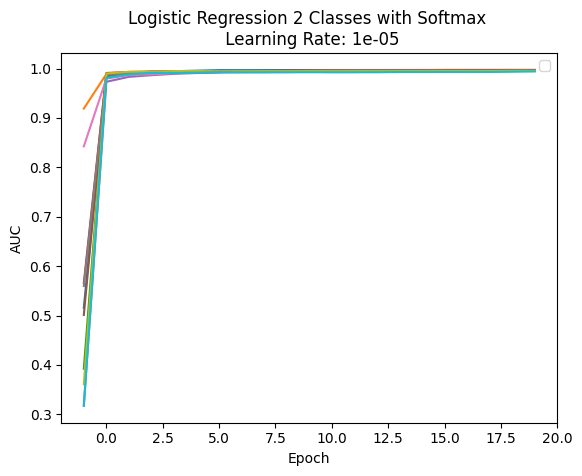

In [12]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes with Softmax \n Learning Rate: " + str(learning_rate))
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [ ]:
# SIGMOID 2 CLASSES 

aucs = []
for i in range(10):
    model_aucs = []
    network = sigmoid_logistic_regression.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    _, auc = auc_test.sigmoid_test(test_loader_reduced, network) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_reduced, network, optimizer, f'softmax_sigmoid_results/sigmoid_results/reduced{i}/model{epoch}')
        _, auc = auc_test.sigmoid_test(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


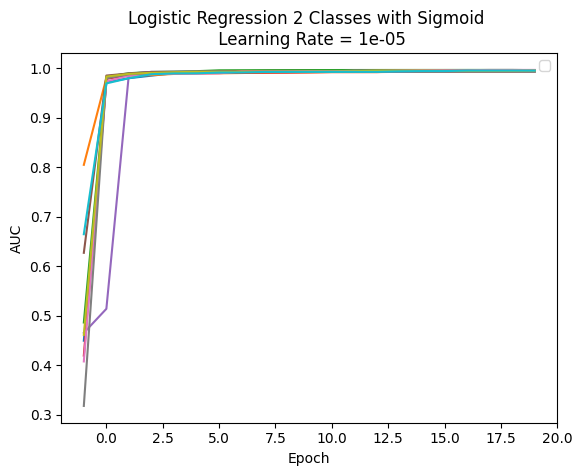

In [72]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [22]:
# SOFTMAX 2 CLASSES RATIO

aucs = []
for i in range(10):
    model_aucs = []
    network = softmax_logistic_regression.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    _, auc = auc_test.softmax_test(test_loader_reduced, network) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_reduced_ratio, network, optimizer, f'softmax_sigmoid_results/softmax_results/reduced_ratio{i}/model{epoch}')
        _, auc = auc_test.softmax_test(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs) # (10, 20)

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.025478993883784513, AUC: 0.5155745628512515 

Train Epoch: 0 [0/5977 (0%)]	Loss: 41.192825
Train Epoch: 0 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.269580
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.076449
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.01022235601831914, AUC: 0.8181722702584525 

Train Epoch: 1 [0/5977 (0%)]	Loss: 2.431257
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.000025
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.000655
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.263470
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.254334
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [2560/5977 (43%)]	Loss: 0.173003
Train Epoch: 2 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.161451
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.005022145699763643, AUC: 0.9567347056881852 

Train Epoch: 3 [0/5977 (0%)]	Loss: 0.007232
Train Epoch: 3 [640/5977 (11%)]	Loss: 0.348791
Train Epoch: 3 [1280/5977 (21%)]	Loss: 0.036408
Train Epoch: 3 [1920/5977 (32%)]	Loss: 0.000009
Train Epoch: 3 [2560/5977 (43%)]	Loss: 0.116071
Train Epoch: 3 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.053371
Train Epoch: 3 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 3 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004529476659391731, AUC: 0.9696503667376849 

Train Epoch: 4 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 4 [640/5977 (11%)]	Loss: 0.329929
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0034103034445958106, AUC: 0.9825488804962426 

Train Epoch: 7 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/5977 (11%)]	Loss: 0.208282
Train Epoch: 7 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 7 [1920/5977 (32%)]	Loss: 0.000108
Train Epoch: 7 [2560/5977 (43%)]	Loss: 0.000632
Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000034
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.000002
Train Epoch: 7 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 7 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0034506167931092698, AUC: 0.9836881036382263 

Train Epoch: 8 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/5977 (11%)]	Loss: 0.105482
Train Epoch: 8 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 8 [1920/5977 (32%)]	Loss: 0.000019
Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.000639
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000297
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000000
Trai

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [2560/5977 (43%)]	Loss: 0.000402
Train Epoch: 9 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 9 [3840/5977 (64%)]	Loss: 0.001506
Train Epoch: 9 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 9 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 9 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003524157324686307, AUC: 0.9849987996896341 

Train Epoch: 10 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/5977 (11%)]	Loss: 0.004305
Train Epoch: 10 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 10 [1920/5977 (32%)]	Loss: 0.000004
Train Epoch: 10 [2560/5977 (43%)]	Loss: 0.000246
Train Epoch: 10 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 10 [3840/5977 (64%)]	Loss: 0.006259
Train Epoch: 10 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 10 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 10 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0034844042351527245, AUC: 0.9854665992206557 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 11 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 11 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003840919113554076, AUC: 0.9851316911944374 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000011
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.000009
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 12 [3840/5977 (64%)]	Loss: 0.001223
Train Epoch: 12 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 12 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 12 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003977874174374725, AUC: 0.9844897394897822 

Train Epoch: 13 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 13 [640/5977 (11%)]	Loss: 0.000001
Train Epoch: 13 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 13 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.000012
Train Epoch: 13 [3200/5977 (53%)]	Los

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 16 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 16 [3840/5977 (64%)]	Loss: 0.000030
Train Epoch: 16 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 16 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 16 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004248582304881473, AUC: 0.9845299284529285 

Train Epoch: 17 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 17 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 17 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 17 [2560/5977 (43%)]	Loss: 0.000020
Train Epoch: 17 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 17 [3840/5977 (64%)]	Loss: 0.000019
Train Epoch: 17 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 17 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 17 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004300582976568313, AUC: 0.9842287791557534 

Train Epoch: 18 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 18 [1280/5977 (21%)]	Los

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.004252530403018738, AUC: 0.985020233803312 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 19 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 19 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 19 [2560/5977 (43%)]	Loss: 0.000025
Train Epoch: 19 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 19 [3840/5977 (64%)]	Loss: 0.000029
Train Epoch: 19 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 19 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 19 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004210330437922823, AUC: 0.985094717348343 


Test set: Avg. loss: 0.012279981905382365, AUC: 0.9190074504979144 

Train Epoch: 0 [0/5977 (0%)]	Loss: 0.000046
Train Epoch: 0 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.207228
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/597

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0039034301943413714, AUC: 0.956674154317045 

Train Epoch: 1 [0/5977 (0%)]	Loss: 0.359847
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.015895
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.116572
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 1 [5120/5977 (85%)]	Loss: 0.003993
Train Epoch: 1 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0026905467544776807, AUC: 0.9789511645153962 

Train Epoch: 2 [0/5977 (0%)]	Loss: 0.000387
Train Epoch: 2 [640/5977 (11%)]	Loss: 0.007203
Train Epoch: 2 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 2 [1920/5977 (32%)]	Loss: 0.033894
Train Epoch: 2 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 2 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.000000
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 3 [5120/5977 (85%)]	Loss: 0.086058
Train Epoch: 3 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002482508527072567, AUC: 0.9884636241656771 

Train Epoch: 4 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 4 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 4 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 4 [1920/5977 (32%)]	Loss: 0.000488
Train Epoch: 4 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 4 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 4 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 4 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 4 [5120/5977 (85%)]	Loss: 0.069561
Train Epoch: 4 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0023221851752658314, AUC: 0.9900384956681657 

Train Epoch: 5 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 5 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 5 [1280/5977 (21%)]	Loss: 0.000000
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0022918384514486814, AUC: 0.991014819546197 

Train Epoch: 6 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 6 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 6 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 6 [1920/5977 (32%)]	Loss: 0.000126
Train Epoch: 6 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 6 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 6 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 6 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 6 [5120/5977 (85%)]	Loss: 0.021196
Train Epoch: 6 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002211762881427078, AUC: 0.9916406956655937 

Train Epoch: 7 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 7 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 7 [1920/5977 (32%)]	Loss: 0.000070
Train Epoch: 7 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.000009
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000479
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.001072
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0024607820170266287, AUC: 0.9919959660998058 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 9 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 9 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 9 [1920/5977 (32%)]	Loss: 0.000002
Train Epoch: 9 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 9 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 9 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 9 [4480/5977 (74%)]	Loss: 0.002798
Train Epoch: 9 [5120/5977 (85%)]	Loss: 0.000249
Train Epoch: 9 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002391760578807096, AUC: 0.9922403149957346 

Train Epoch: 10 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 10 [1280/5977 (21%)]	Loss: 0.000000
Tr

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0024242369037730848, AUC: 0.9927713451621063 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 11 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 11 [1920/5977 (32%)]	Loss: 0.000001
Train Epoch: 11 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 11 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 11 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 11 [4480/5977 (74%)]	Loss: 0.039830
Train Epoch: 11 [5120/5977 (85%)]	Loss: 0.000020
Train Epoch: 11 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0024873518055270175, AUC: 0.9936844384047875 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.000001
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.000002
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 12 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 12 [4480/5977 (74%)]	L

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [1920/5977 (32%)]	Loss: 0.000001
Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.000005
Train Epoch: 13 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 13 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 13 [4480/5977 (74%)]	Loss: 0.046852
Train Epoch: 13 [5120/5977 (85%)]	Loss: 0.000002
Train Epoch: 13 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002411136345833725, AUC: 0.9939512931200782 

Train Epoch: 14 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 14 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 14 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 14 [2560/5977 (43%)]	Loss: 0.000007
Train Epoch: 14 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 14 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 14 [4480/5977 (74%)]	Loss: 0.039135
Train Epoch: 14 [5120/5977 (85%)]	Loss: 0.000001
Train Epoch: 14 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0024277055732458523, AUC: 0.9940193464310058 

Train Epoch: 15 [0/5977 (0%)]	L

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0027341979630985617, AUC: 0.9941795664307486 

Train Epoch: 18 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 18 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 18 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 18 [2560/5977 (43%)]	Loss: 0.000069
Train Epoch: 18 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 18 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5977 (74%)]	Loss: 0.030699
Train Epoch: 18 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 18 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0029801430169099606, AUC: 0.9937144461639367 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 19 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 19 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 19 [2560/5977 (43%)]	Loss: 0.000019
Train Epoch: 19 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 19 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 19 [4480/5977 (74%)]	L

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.879836
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.029370710716484498, AUC: 0.6271401962507448 

Train Epoch: 1 [0/5977 (0%)]	Loss: 1.579644
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.000005
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.074645
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.148687
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.922437
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000001
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 1 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 1 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0065026927438581955, AUC: 0.8871338517530961 



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004957225752173004, AUC: 0.9524655660963761 

Train Epoch: 3 [0/5977 (0%)]	Loss: 1.040990
Train Epoch: 3 [640/5977 (11%)]	Loss: 0.030918
Train Epoch: 3 [1280/5977 (21%)]	Loss: 0.000499
Train Epoch: 3 [1920/5977 (32%)]	Loss: 0.226943
Train Epoch: 3 [2560/5977 (43%)]	Loss: 0.764305
Train Epoch: 3 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 3 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 3 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003893687241319297, AUC: 0.9675610765069254 

Train Epoch: 4 [0/5977 (0%)]	Loss: 0.794403
Train Epoch: 4 [640/5977 (11%)]	Loss: 0.123172
Train Epoch: 4 [1280/5977 (21%)]	Loss: 0.000093
Train Epoch: 4 [1920/5977 (32%)]	Loss: 0.223411
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [1920/5977 (32%)]	Loss: 0.123670
Train Epoch: 7 [2560/5977 (43%)]	Loss: 0.545918
Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 7 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 7 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0035315964286124976, AUC: 0.9831902963480559 

Train Epoch: 8 [0/5977 (0%)]	Loss: 0.229240
Train Epoch: 8 [640/5977 (11%)]	Loss: 0.000003
Train Epoch: 8 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 8 [1920/5977 (32%)]	Loss: 0.089579
Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.506233
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003351801177236111, AUC: 0.9843171948746747 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.172232
Trai

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 9 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 9 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003119877653339141, AUC: 0.9856766535346998 

Train Epoch: 10 [0/5977 (0%)]	Loss: 0.124474
Train Epoch: 10 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 10 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 10 [1920/5977 (32%)]	Loss: 0.034121
Train Epoch: 10 [2560/5977 (43%)]	Loss: 0.448662
Train Epoch: 10 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 10 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 10 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 10 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 10 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0034438319828199305, AUC: 0.9855442978827382 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.023317
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 11 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 11 [1920/5977 (32%)]	Loss: 0.004582
Train Epoch: 11 [2560/5977 (43%)]	Loss:

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0035366536914438443, AUC: 0.9860897960758424 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.002294
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.001975
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.371973
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 12 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 12 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 12 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 12 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0037366978623605417, AUC: 0.9857532804910984 

Train Epoch: 13 [0/5977 (0%)]	Loss: 0.000130
Train Epoch: 13 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 13 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 13 [1920/5977 (32%)]	Loss: 0.000420
Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.334127
Train Epoch: 13 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 13 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 13 [4480/5977 (74%)]	L

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 14 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 14 [1920/5977 (32%)]	Loss: 0.000193
Train Epoch: 14 [2560/5977 (43%)]	Loss: 0.304224
Train Epoch: 14 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 14 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 14 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 14 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 14 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0037588395687363904, AUC: 0.9859708367449298 

Train Epoch: 15 [0/5977 (0%)]	Loss: 0.000022
Train Epoch: 15 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 15 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 15 [1920/5977 (32%)]	Loss: 0.000100
Train Epoch: 15 [2560/5977 (43%)]	Loss: 0.275057
Train Epoch: 15 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 15 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 15 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 15 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 15 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0037679400750075314, AUC: 0.

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 18 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 18 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 18 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 18 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0038341909461880323, AUC: 0.986948232328645 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000001
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 19 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 19 [1920/5977 (32%)]	Loss: 0.000006
Train Epoch: 19 [2560/5977 (43%)]	Loss: 0.163514
Train Epoch: 19 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 19 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 19 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 19 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 19 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003869378295250808, AUC: 0.986988957144633 


Test set: Avg. loss: 0.0472109105522835, AUC: 0.5656462599615043 

Train Epoch: 0 [0/5977 (0%)]	Loss: 0.853632
Train Epoch: 0 [640

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.175181
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.013597343772588063, AUC: 0.7561548057426277 

Train Epoch: 1 [0/5977 (0%)]	Loss: 3.259362
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.002293
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.076786
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 1 [5120/5977 (85%)]	Loss: 0.005741
Train Epoch: 1 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.00270815776742023, AUC: 0.9436604321974681 

Train Epoch: 2 [0/5977 (0%)]	Loss: 2.063615
Train Epoch: 2 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 2 [1280/5977 (21%)]	Loss: 0.000000
Train E

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.000704
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002864667100689179, AUC: 0.9768870593682082 

Train Epoch: 3 [0/5977 (0%)]	Loss: 0.000014
Train Epoch: 3 [640/5977 (11%)]	Loss: 0.004726
Train Epoch: 3 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 3 [1920/5977 (32%)]	Loss: 0.000333
Train Epoch: 3 [2560/5977 (43%)]	Loss: 0.034763
Train Epoch: 3 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 3 [5120/5977 (85%)]	Loss: 0.001470
Train Epoch: 3 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002668081850245379, AUC: 0.9824679667171082 

Train Epoch: 4 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 4 [640/5977 (11%)]	Loss: 0.043286
Train Epoch: 4 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 4 [1920/5977 (32%)]	Loss: 0.000313
Train Epoch: 4 [2560/5977 (43%)]	Loss: 0.058272
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0029330121557658256, AUC: 0.9838574331362824 

Train Epoch: 5 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 5 [640/5977 (11%)]	Loss: 0.026014
Train Epoch: 5 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 5 [1920/5977 (32%)]	Loss: 0.000014
Train Epoch: 5 [2560/5977 (43%)]	Loss: 0.045982
Train Epoch: 5 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 5 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 5 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 5 [5120/5977 (85%)]	Loss: 0.000044
Train Epoch: 5 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0027869943506228997, AUC: 0.9852651185520827 

Train Epoch: 6 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 6 [640/5977 (11%)]	Loss: 0.028398
Train Epoch: 6 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 6 [1920/5977 (32%)]	Loss: 0.000008
Train Epoch: 6 [2560/5977 (43%)]	Loss: 0.049375
Train Epoch: 6 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 6 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 6 [4480/5977 (74%)]	Loss: 0.000001
Trai

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.000001
Train Epoch: 7 [5120/5977 (85%)]	Loss: 0.000009
Train Epoch: 7 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002821388081734225, AUC: 0.9866390452388403 

Train Epoch: 8 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/5977 (11%)]	Loss: 0.005939
Train Epoch: 8 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 8 [1920/5977 (32%)]	Loss: 0.000004
Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.041329
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000001
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.000004
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0028489329553292157, AUC: 0.9870366480475667 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 9 [640/5977 (11%)]	Loss: 0.002940
Train Epoch: 9 [1280/5977 (21%)]	Loss: 0.000000
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0030063725159528588, AUC: 0.9879363449691991 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000213
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.000001
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.004059
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 12 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 12 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 12 [5120/5977 (85%)]	Loss: 0.000008
Train Epoch: 12 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003017644581093798, AUC: 0.9874787266421747 

Train Epoch: 13 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 13 [640/5977 (11%)]	Loss: 0.000103
Train Epoch: 13 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 13 [1920/5977 (32%)]	Loss: 0.000001
Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.003413
Train Epoch: 13 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 13 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 13 [4480/5977 (74%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 14 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 14 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 14 [2560/5977 (43%)]	Loss: 0.002647
Train Epoch: 14 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 14 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 14 [4480/5977 (74%)]	Loss: 0.000001
Train Epoch: 14 [5120/5977 (85%)]	Loss: 0.000006
Train Epoch: 14 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0030973864638287087, AUC: 0.9874449679131319 

Train Epoch: 15 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/5977 (11%)]	Loss: 0.000015
Train Epoch: 15 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 15 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 15 [2560/5977 (43%)]	Loss: 0.005277
Train Epoch: 15 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 15 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 15 [4480/5977 (74%)]	Loss: 0.000001
Train Epoch: 15 [5120/5977 (85%)]	Loss: 0.000004
Train Epoch: 15 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0030980401404402517, AUC: 0.

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 16 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 16 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 16 [2560/5977 (43%)]	Loss: 0.007872
Train Epoch: 16 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 16 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 16 [4480/5977 (74%)]	Loss: 0.000004
Train Epoch: 16 [5120/5977 (85%)]	Loss: 0.000003
Train Epoch: 16 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003087449024429479, AUC: 0.9873377973447419 

Train Epoch: 17 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/5977 (11%)]	Loss: 0.000018
Train Epoch: 17 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 17 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 17 [2560/5977 (43%)]	Loss: 0.008859
Train Epoch: 17 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 17 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 17 [4480/5977 (74%)]	Loss: 0.000009
Train Epoch: 17 [5120/5977 (85%)]	Loss: 0.000003
Train Epoch: 17 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0030734677245651465, AUC: 0.9

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 18 [640/5977 (11%)]	Loss: 0.000031
Train Epoch: 18 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 18 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 18 [2560/5977 (43%)]	Loss: 0.008781
Train Epoch: 18 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 18 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5977 (74%)]	Loss: 0.000019
Train Epoch: 18 [5120/5977 (85%)]	Loss: 0.000002
Train Epoch: 18 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003093159470252122, AUC: 0.9872863554719149 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.000032
Train Epoch: 19 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 19 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 19 [2560/5977 (43%)]	Loss: 0.005136
Train Epoch: 19 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 19 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 19 [4480/5977 (74%)]	Loss: 0.000038
Train Epoch: 19 [5120/5977 (85%)]	Loss: 0.000002
Train Epoch: 19 [5760/5977 (96%)]	Loss: 0.000000

Test

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.000104
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.123608
Train Epoch: 0 [2560/5977 (43%)]	Loss: 1.403012
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.000001
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.01543705507835246, AUC: 0.6589698550625234 

Train Epoch: 1 [0/5977 (0%)]	Loss: 0.939313
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.371109
Train Epoch: 1 [2560/5977 (43%)]	Loss: 1.178690
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 1 [5120/5977 (85%)]	Loss: 0.024643
Train Epoch: 1 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003641835527637237, AUC: 0.9151289476278867 

Tr

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.003365337972068392, AUC: 0.9770065545519626 

Train Epoch: 5 [0/5977 (0%)]	Loss: 0.000004
Train Epoch: 5 [640/5977 (11%)]	Loss: 0.047759
Train Epoch: 5 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 5 [1920/5977 (32%)]	Loss: 0.181120
Train Epoch: 5 [2560/5977 (43%)]	Loss: 0.577442
Train Epoch: 5 [3200/5977 (53%)]	Loss: 0.000002
Train Epoch: 5 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 5 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 5 [5120/5977 (85%)]	Loss: 0.009681
Train Epoch: 5 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0032177142968582563, AUC: 0.9800019719384585 

Train Epoch: 6 [0/5977 (0%)]	Loss: 0.000002
Train Epoch: 6 [640/5977 (11%)]	Loss: 0.040409
Train Epoch: 6 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 6 [1920/5977 (32%)]	Loss: 0.123592
Train Epoch: 6 [2560/5977 (43%)]	Loss: 0.561692
Train Epoch: 6 [3200/5977 (53%)]	Loss: 0.000011
Train Epoch: 6 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 6 [4480/5977 (74%)]	Loss: 0.000000
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000066
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 7 [5120/5977 (85%)]	Loss: 0.000756
Train Epoch: 7 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003504172738788044, AUC: 0.9814359141435142 

Train Epoch: 8 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/5977 (11%)]	Loss: 0.014140
Train Epoch: 8 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 8 [1920/5977 (32%)]	Loss: 0.010238
Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.513113
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000257
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.000268
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0035586511373026275, AUC: 0.981944974343366 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 9 [640/5977 (11%)]	Loss: 0.000826
Train Epoch: 9 [1280/5977 (21%)]	Loss: 0.000000
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.003493161798757549, AUC: 0.9820757224368015 

Train Epoch: 10 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/5977 (11%)]	Loss: 0.000456
Train Epoch: 10 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 10 [1920/5977 (32%)]	Loss: 0.000496
Train Epoch: 10 [2560/5977 (43%)]	Loss: 0.563685
Train Epoch: 10 [3200/5977 (53%)]	Loss: 0.000605
Train Epoch: 10 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 10 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 10 [5120/5977 (85%)]	Loss: 0.000007
Train Epoch: 10 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0034428173464030707, AUC: 0.9824486760147981 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.000191
Train Epoch: 11 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 11 [1920/5977 (32%)]	Loss: 0.000133
Train Epoch: 11 [2560/5977 (43%)]	Loss: 0.575941
Train Epoch: 11 [3200/5977 (53%)]	Loss: 0.000424
Train Epoch: 11 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 11 [4480/5977 (74%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 14 [3200/5977 (53%)]	Loss: 0.000036
Train Epoch: 14 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 14 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 14 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 14 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004000113987774582, AUC: 0.982478683773947 

Train Epoch: 15 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 15 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 15 [1920/5977 (32%)]	Loss: 0.000001
Train Epoch: 15 [2560/5977 (43%)]	Loss: 0.546899
Train Epoch: 15 [3200/5977 (53%)]	Loss: 0.000012
Train Epoch: 15 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 15 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 15 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 15 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0041442238272593876, AUC: 0.982196825179082 

Train Epoch: 16 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 16 [1280/5977 (21%)]	Loss

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.004121501006448244, AUC: 0.9823329318009372 

Train Epoch: 17 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 17 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 17 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 17 [2560/5977 (43%)]	Loss: 0.465956
Train Epoch: 17 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 17 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 17 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 17 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 17 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004098214101100313, AUC: 0.9823490073861956 

Train Epoch: 18 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 18 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 18 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 18 [2560/5977 (43%)]	Loss: 0.439629
Train Epoch: 18 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 18 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5977 (74%)]	Los

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 19 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 19 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 19 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 19 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 19 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0040750517114595845, AUC: 0.9827637574858641 


Test set: Avg. loss: 0.05332370031447638, AUC: 0.5012233520381698 

Train Epoch: 0 [0/5977 (0%)]	Loss: 87.067268
Train Epoch: 0 [640/5977 (11%)]	Loss: 0.000009
Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.132914
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.674155
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.205475
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.010691335482626968, AUC: 0.8696355771992473 

Train Epoch: 1 [0/5977 (0%)]	Loss: 2.357300
Train Epoch: 1 [640/5977 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.248093
Train Epoch: 1 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 1 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004807509497332524, AUC: 0.9545709319123944 

Train Epoch: 2 [0/5977 (0%)]	Loss: 1.209244
Train Epoch: 2 [640/5977 (11%)]	Loss: 0.354800
Train Epoch: 2 [1280/5977 (21%)]	Loss: 0.015971
Train Epoch: 2 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 2 [2560/5977 (43%)]	Loss: 0.696547
Train Epoch: 2 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.183039
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003974417968813183, AUC: 0.9718586162993573 

Train Epoch: 3 [0/5977 (0%)]	Loss: 0.604180
Train Epoch: 3 [640/5977 (11%)]	Loss: 0.121465
Train Epoch: 3 [1280/5977 (21%)]	Loss: 0.000007
Train Epoch: 3 [1920/5977 (32%)]	Loss: 0.000000
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 6 [640/5977 (11%)]	Loss: 0.000003
Train Epoch: 6 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 6 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 6 [2560/5977 (43%)]	Loss: 0.704021
Train Epoch: 6 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 6 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 6 [4480/5977 (74%)]	Loss: 0.003706
Train Epoch: 6 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 6 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003938886443033475, AUC: 0.9844141842390675 

Train Epoch: 7 [0/5977 (0%)]	Loss: 0.000121
Train Epoch: 7 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 7 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 7 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 7 [2560/5977 (43%)]	Loss: 0.681735
Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.001232
Train Epoch: 7 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 7 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 8 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 8 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.699096
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000973
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003890327415110902, AUC: 0.9853358511272199 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.000014
Train Epoch: 9 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 9 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 9 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 9 [2560/5977 (43%)]	Loss: 0.700464
Train Epoch: 9 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 9 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 9 [4480/5977 (74%)]	Loss: 0.000807
Train Epoch: 9 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 9 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0040582091418359095, AUC: 0.9846783596901485 



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 10 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 10 [4480/5977 (74%)]	Loss: 0.000472
Train Epoch: 10 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 10 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004037631471211372, AUC: 0.9849023461780833 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.000005
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 11 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 11 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 11 [2560/5977 (43%)]	Loss: 0.672618
Train Epoch: 11 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 11 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 11 [4480/5977 (74%)]	Loss: 0.000469
Train Epoch: 11 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 11 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004013133098373255, AUC: 0.9851332987529634 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.000004
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Los

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 15 [2560/5977 (43%)]	Loss: 0.628652
Train Epoch: 15 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 15 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 15 [4480/5977 (74%)]	Loss: 0.000097
Train Epoch: 15 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 15 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0038666721456539557, AUC: 0.9861085509253107 

Train Epoch: 16 [0/5977 (0%)]	Loss: 0.000002
Train Epoch: 16 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 16 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 16 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 16 [2560/5977 (43%)]	Loss: 0.612291
Train Epoch: 16 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 16 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 16 [4480/5977 (74%)]	Loss: 0.000037
Train Epoch: 16 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 16 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0038105826940595736, AUC: 0.9862307253732752 

Train Epoch: 17 [0/5977 (0%)]	Loss: 0.000002
Train Epoch: 17 [640/5977 (11%)]	L

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 17 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 17 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0037579661077100546, AUC: 0.9863384317945068 

Train Epoch: 18 [0/5977 (0%)]	Loss: 0.000002
Train Epoch: 18 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 18 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 18 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 18 [2560/5977 (43%)]	Loss: 0.581425
Train Epoch: 18 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 18 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5977 (74%)]	Loss: 0.000007
Train Epoch: 18 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 18 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0037073958240927624, AUC: 0.986442387245845 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000002
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 19 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 19 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 19 [2560/5977 (43%)]	Loss: 0.568604
Train Epoch: 19 [3200/5977 (53%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0036584348658844057, AUC: 0.9864986517942497 


Test set: Avg. loss: 0.017277138080162537, AUC: 0.842427113296438 

Train Epoch: 0 [0/5977 (0%)]	Loss: 1.170407
Train Epoch: 0 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.402433
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.156174
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.000027
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0029988002579651512, AUC: 0.9285477744959767 

Train Epoch: 1 [0/5977 (0%)]	Loss: 3.033206
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.000060
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.183936
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.449036
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 1 [3840/5977 (64%)

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0023844683886067963, AUC: 0.9742115461283559 

Train Epoch: 2 [0/5977 (0%)]	Loss: 0.861658
Train Epoch: 2 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 2 [1280/5977 (21%)]	Loss: 0.000502
Train Epoch: 2 [1920/5977 (32%)]	Loss: 0.167656
Train Epoch: 2 [2560/5977 (43%)]	Loss: 0.419129
Train Epoch: 2 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.016003
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002625326068751807, AUC: 0.9816127455813575 

Train Epoch: 3 [0/5977 (0%)]	Loss: 0.295223
Train Epoch: 3 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 3 [1280/5977 (21%)]	Loss: 0.000013
Train Epoch: 3 [1920/5977 (32%)]	Loss: 0.080294
Train Epoch: 3 [2560/5977 (43%)]	Loss: 0.400673
Train Epoch: 3 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.000000
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.002564695557698947, AUC: 0.9860040596211307 

Train Epoch: 6 [0/5977 (0%)]	Loss: 0.067223
Train Epoch: 6 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 6 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 6 [1920/5977 (32%)]	Loss: 0.035406
Train Epoch: 6 [2560/5977 (43%)]	Loss: 0.497857
Train Epoch: 6 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 6 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 6 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 6 [5120/5977 (85%)]	Loss: 0.011368
Train Epoch: 6 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0024870630376827643, AUC: 0.9881849806878635 

Train Epoch: 7 [0/5977 (0%)]	Loss: 0.047963
Train Epoch: 7 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 7 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 7 [1920/5977 (32%)]	Loss: 0.032227
Train Epoch: 7 [2560/5977 (43%)]	Loss: 0.538187
Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.000000
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.003316
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002428209806327741, AUC: 0.9891034324589643 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.013598
Train Epoch: 9 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 9 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 9 [1920/5977 (32%)]	Loss: 0.031620
Train Epoch: 9 [2560/5977 (43%)]	Loss: 0.588704
Train Epoch: 9 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 9 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 9 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 9 [5120/5977 (85%)]	Loss: 0.001697
Train Epoch: 9 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0023888022509667693, AUC: 0.9894201214885563 

Train Epoch: 10 [0/5977 (0%)]	Loss: 0.007809
Train Epoch: 10 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 10 [1280/5977 (21%)]	Loss: 0.000000
Tr

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.002380137734778426, AUC: 0.990011703026068 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.004302
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 11 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 11 [1920/5977 (32%)]	Loss: 0.024011
Train Epoch: 11 [2560/5977 (43%)]	Loss: 0.589321
Train Epoch: 11 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 11 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 11 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 11 [5120/5977 (85%)]	Loss: 0.000605
Train Epoch: 11 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0025259613003543197, AUC: 0.9901178018887741 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.001019
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.024456
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.568418
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 12 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 12 [4480/5977 (74%)]	Los

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.551009
Train Epoch: 13 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 13 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 13 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 13 [5120/5977 (85%)]	Loss: 0.000053
Train Epoch: 13 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0023675315375160234, AUC: 0.9905572012191723 

Train Epoch: 14 [0/5977 (0%)]	Loss: 0.001904
Train Epoch: 14 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 14 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 14 [1920/5977 (32%)]	Loss: 0.010368
Train Epoch: 14 [2560/5977 (43%)]	Loss: 0.537000
Train Epoch: 14 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 14 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 14 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 14 [5120/5977 (85%)]	Loss: 0.000014
Train Epoch: 14 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002397474171458811, AUC: 0.9906327564698872 

Train Epoch: 15 [0/5977 (0%)]	Loss: 0.001556
Train Epoch: 15 [640/5977 (11%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 15 [5120/5977 (85%)]	Loss: 0.000004
Train Epoch: 15 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0023754242784488275, AUC: 0.9910421480411364 

Train Epoch: 16 [0/5977 (0%)]	Loss: 0.002024
Train Epoch: 16 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 16 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 16 [1920/5977 (32%)]	Loss: 0.003214
Train Epoch: 16 [2560/5977 (43%)]	Loss: 0.504334
Train Epoch: 16 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 16 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 16 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 16 [5120/5977 (85%)]	Loss: 0.000002
Train Epoch: 16 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002451536077890337, AUC: 0.9910185705160908 

Train Epoch: 17 [0/5977 (0%)]	Loss: 0.001105
Train Epoch: 17 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 17 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 17 [1920/5977 (32%)]	Loss: 0.001790
Train Epoch: 17 [2560/5977 (43%)]	Loss: 0.484455
Train Epoch: 17 [3200/5977 (53%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.007845
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.240830
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.007268057353254678, AUC: 0.9176571013362027 

Train Epoch: 1 [0/5977 (0%)]	Loss: 0.293262
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.000070
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.033988
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.340506
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.373666
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 1 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 1 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004411043587678708, AUC: 0.9736890896074557 

Train Epoch: 3 [0/5977 (0%)]	Loss: 0.004926
Train Epoch: 3 [640/5977 (11%)]	Loss: 0.137448
Train Epoch: 3 [1280/5977 (21%)]	Loss: 0.066609
Train Epoch: 3 [1920/5977 (32%)]	Loss: 0.396119
Train Epoch: 3 [2560/5977 (43%)]	Loss: 0.478555
Train Epoch: 3 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 3 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 3 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004145168493006293, AUC: 0.9805914100646024 

Train Epoch: 4 [0/5977 (0%)]	Loss: 0.000042
Train Epoch: 4 [640/5977 (11%)]	Loss: 0.182121
Train Epoch: 4 [1280/5977 (21%)]	Loss: 0.024209
Train Epoch: 4 [1920/5977 (32%)]	Loss: 0.418711
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.003936410073661409, AUC: 0.9835402082538485 

Train Epoch: 5 [0/5977 (0%)]	Loss: 0.000003
Train Epoch: 5 [640/5977 (11%)]	Loss: 0.162832
Train Epoch: 5 [1280/5977 (21%)]	Loss: 0.000015
Train Epoch: 5 [1920/5977 (32%)]	Loss: 0.409527
Train Epoch: 5 [2560/5977 (43%)]	Loss: 0.371245
Train Epoch: 5 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 5 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 5 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 5 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 5 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0035406030236317257, AUC: 0.9852442202912467 

Train Epoch: 6 [0/5977 (0%)]	Loss: 0.000014
Train Epoch: 6 [640/5977 (11%)]	Loss: 0.165609
Train Epoch: 6 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 6 [1920/5977 (32%)]	Loss: 0.395516
Train Epoch: 6 [2560/5977 (43%)]	Loss: 0.268290
Train Epoch: 6 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 6 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 6 [4480/5977 (74%)]	Loss: 0.000000
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [2560/5977 (43%)]	Loss: 0.174991
Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 7 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 7 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003146374817960751, AUC: 0.9880692364740026 

Train Epoch: 8 [0/5977 (0%)]	Loss: 0.000110
Train Epoch: 8 [640/5977 (11%)]	Loss: 0.152373
Train Epoch: 8 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 8 [1920/5977 (32%)]	Loss: 0.374130
Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.146312
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0030452353613717215, AUC: 0.9890375225594046 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.000309
Train Epoch: 9 [640/5977 (11%)]	Loss: 0.165833
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.002635251229347403, AUC: 0.9911402091112131 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.010293
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.195589
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.354510
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.139814
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 12 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 12 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 12 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 12 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002708941574669279, AUC: 0.9912870327899072 

Train Epoch: 13 [0/5977 (0%)]	Loss: 0.002287
Train Epoch: 13 [640/5977 (11%)]	Loss: 0.162116
Train Epoch: 13 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 13 [1920/5977 (32%)]	Loss: 0.328204
Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.119771
Train Epoch: 13 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 13 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 13 [4480/5977 (74%)]	Los

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 14 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 14 [1920/5977 (32%)]	Loss: 0.305763
Train Epoch: 14 [2560/5977 (43%)]	Loss: 0.100383
Train Epoch: 14 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 14 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 14 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 14 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 14 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002802755151476179, AUC: 0.9915126268363676 

Train Epoch: 15 [0/5977 (0%)]	Loss: 0.001040
Train Epoch: 15 [640/5977 (11%)]	Loss: 0.088356
Train Epoch: 15 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 15 [1920/5977 (32%)]	Loss: 0.257951
Train Epoch: 15 [2560/5977 (43%)]	Loss: 0.061256
Train Epoch: 15 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 15 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 15 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 15 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 15 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0027099818176364305, AUC: 0.9

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 16 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 16 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 16 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 16 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0026843574353133176, AUC: 0.99178269666871 

Train Epoch: 17 [0/5977 (0%)]	Loss: 0.001377
Train Epoch: 17 [640/5977 (11%)]	Loss: 0.100670
Train Epoch: 17 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 17 [1920/5977 (32%)]	Loss: 0.234582
Train Epoch: 17 [2560/5977 (43%)]	Loss: 0.058304
Train Epoch: 17 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 17 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 17 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 17 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 17 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0026465478520956097, AUC: 0.9919037994109906 

Train Epoch: 18 [0/5977 (0%)]	Loss: 0.001206
Train Epoch: 18 [640/5977 (11%)]	Loss: 0.100851
Train Epoch: 18 [1280/5977 (21%)]	Loss: 0.000000


/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 18 [1920/5977 (32%)]	Loss: 0.218621
Train Epoch: 18 [2560/5977 (43%)]	Loss: 0.052260
Train Epoch: 18 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 18 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 18 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 18 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002617956009957608, AUC: 0.9919831056315991 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000997
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.098116
Train Epoch: 19 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 19 [1920/5977 (32%)]	Loss: 0.200517
Train Epoch: 19 [2560/5977 (43%)]	Loss: 0.044897
Train Epoch: 19 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 19 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 19 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 19 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 19 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0025879508713510958, AUC: 0.992067234527785 



/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.02699811414161824, AUC: 0.36088081346748235 

Train Epoch: 0 [0/5977 (0%)]	Loss: 12.731292
Train Epoch: 0 [640/5977 (11%)]	Loss: 0.031293
Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.000002
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.467241
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 0 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 0 [4480/5977 (74%)]	Loss: 0.497459
Train Epoch: 0 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 0 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.012384145156196926, AUC: 0.7451376713121536 

Train Epoch: 1 [0/5977 (0%)]	Loss: 1.920113
Train Epoch: 1 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.280533
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.000009
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.023757
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000020
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000001
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.752501
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [2560/5977 (43%)]	Loss: 0.003696
Train Epoch: 2 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000010
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.588891
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0027620309875124975, AUC: 0.9746868475991649 

Train Epoch: 3 [0/5977 (0%)]	Loss: 0.311167
Train Epoch: 3 [640/5977 (11%)]	Loss: 0.000065
Train Epoch: 3 [1280/5977 (21%)]	Loss: 0.431187
Train Epoch: 3 [1920/5977 (32%)]	Loss: 0.142705
Train Epoch: 3 [2560/5977 (43%)]	Loss: 0.000183
Train Epoch: 3 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000288
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.540592
Train Epoch: 3 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 3 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002632104091762756, AUC: 0.9827010627033561 

Train Epoch: 4 [0/5977 (0%)]	Loss: 0.046610
Train Epoch: 4 [640/5977 (11%)]	Loss: 0.001254
Train

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 7 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 7 [1280/5977 (21%)]	Loss: 0.000870
Train Epoch: 7 [1920/5977 (32%)]	Loss: 0.203649
Train Epoch: 7 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 7 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 7 [3840/5977 (64%)]	Loss: 0.001397
Train Epoch: 7 [4480/5977 (74%)]	Loss: 0.347520
Train Epoch: 7 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 7 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0026403418732479245, AUC: 0.9905223707844457 

Train Epoch: 8 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 8 [1280/5977 (21%)]	Loss: 0.000015
Train Epoch: 8 [1920/5977 (32%)]	Loss: 0.211882
Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.001477
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.317536
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 9 [2560/5977 (43%)]	Loss: 0.000001
Train Epoch: 9 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 9 [3840/5977 (64%)]	Loss: 0.001227
Train Epoch: 9 [4480/5977 (74%)]	Loss: 0.290110
Train Epoch: 9 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 9 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.002439335204552913, AUC: 0.9917521530567188 

Train Epoch: 10 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 10 [1280/5977 (21%)]	Loss: 0.000001
Train Epoch: 10 [1920/5977 (32%)]	Loss: 0.219793
Train Epoch: 10 [2560/5977 (43%)]	Loss: 0.000001
Train Epoch: 10 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 10 [3840/5977 (64%)]	Loss: 0.001364
Train Epoch: 10 [4480/5977 (74%)]	Loss: 0.266658
Train Epoch: 10 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 10 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0023170655928783537, AUC: 0.9922521037582575 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 11 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.00227814499389064, AUC: 0.9925687927878493 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000001
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.211123
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.000007
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 12 [3840/5977 (64%)]	Loss: 0.001515
Train Epoch: 12 [4480/5977 (74%)]	Loss: 0.220352
Train Epoch: 12 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 12 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0023006640112424735, AUC: 0.9928302889747206 

Train Epoch: 13 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 13 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 13 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 13 [1920/5977 (32%)]	Loss: 0.192482
Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.000009
Train Epoch: 13 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 13 [3840/5977 (64%)]	Los

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 16 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 16 [3840/5977 (64%)]	Loss: 0.000541
Train Epoch: 16 [4480/5977 (74%)]	Loss: 0.104599
Train Epoch: 16 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 16 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.001979049133217853, AUC: 0.9940343503105803 

Train Epoch: 17 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 17 [1280/5977 (21%)]	Loss: 0.000002
Train Epoch: 17 [1920/5977 (32%)]	Loss: 0.166714
Train Epoch: 17 [2560/5977 (43%)]	Loss: 0.000077
Train Epoch: 17 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 17 [3840/5977 (64%)]	Loss: 0.000617
Train Epoch: 17 [4480/5977 (74%)]	Loss: 0.079130
Train Epoch: 17 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 17 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0019084801955252702, AUC: 0.9941538454943349 

Train Epoch: 18 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 18 [1280/5977 (21%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0019461239223401245, AUC: 0.9941924268989553 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 19 [1280/5977 (21%)]	Loss: 0.000003
Train Epoch: 19 [1920/5977 (32%)]	Loss: 0.151612
Train Epoch: 19 [2560/5977 (43%)]	Loss: 0.000204
Train Epoch: 19 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 19 [3840/5977 (64%)]	Loss: 0.000603
Train Epoch: 19 [4480/5977 (74%)]	Loss: 0.033635
Train Epoch: 19 [5120/5977 (85%)]	Loss: 0.000000
Train Epoch: 19 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0020003708746615897, AUC: 0.9941929627517972 


Test set: Avg. loss: 0.04139430478492879, AUC: 0.3170491227017272 

Train Epoch: 0 [0/5977 (0%)]	Loss: 4.730220
Train Epoch: 0 [640/5977 (11%)]	Loss: 0.219620
Train Epoch: 0 [1280/5977 (21%)]	Loss: 0.023167
Train Epoch: 0 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 0 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 0 [3200/5977 (53%)]	Loss: 0.103247
Train Epoch: 0 [3840/

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [640/5977 (11%)]	Loss: 0.006759
Train Epoch: 1 [1280/5977 (21%)]	Loss: 0.078687
Train Epoch: 1 [1920/5977 (32%)]	Loss: 0.000001
Train Epoch: 1 [2560/5977 (43%)]	Loss: 0.000000
Train Epoch: 1 [3200/5977 (53%)]	Loss: 0.000067
Train Epoch: 1 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 1 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 1 [5120/5977 (85%)]	Loss: 0.190056
Train Epoch: 1 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.005103985962166796, AUC: 0.8869939941613475 

Train Epoch: 2 [0/5977 (0%)]	Loss: 3.353710
Train Epoch: 2 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 2 [1280/5977 (21%)]	Loss: 0.000149
Train Epoch: 2 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 2 [2560/5977 (43%)]	Loss: 0.000008
Train Epoch: 2 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 2 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 2 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 2 [5120/5977 (85%)]	Loss: 0.008072
Train Epoch: 2 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 3 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 3 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 3 [5120/5977 (85%)]	Loss: 0.018769
Train Epoch: 3 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004446004118238177, AUC: 0.9628536092904022 

Train Epoch: 4 [0/5977 (0%)]	Loss: 0.225930
Train Epoch: 4 [640/5977 (11%)]	Loss: 0.000703
Train Epoch: 4 [1280/5977 (21%)]	Loss: 0.000006
Train Epoch: 4 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 4 [2560/5977 (43%)]	Loss: 0.000252
Train Epoch: 4 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 4 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 4 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 4 [5120/5977 (85%)]	Loss: 0.017806
Train Epoch: 4 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.004178804887254292, AUC: 0.9677212965066682 

Train Epoch: 5 [0/5977 (0%)]	Loss: 0.098393
Train Epoch: 5 [640/5977 (11%)]	Loss: 0.001769
Train Epoch: 5 [1280/5977 (21%)]	Loss: 0.000002
Train Epoch: 5 [1920/5977 (32%)]	Loss: 0.000000
Train 

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 8 [2560/5977 (43%)]	Loss: 0.000295
Train Epoch: 8 [3200/5977 (53%)]	Loss: 0.000000
Train Epoch: 8 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 8 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 8 [5120/5977 (85%)]	Loss: 0.006834
Train Epoch: 8 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003622081832609315, AUC: 0.9785101576264721 

Train Epoch: 9 [0/5977 (0%)]	Loss: 0.000246
Train Epoch: 9 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 9 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 9 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 9 [2560/5977 (43%)]	Loss: 0.000305
Train Epoch: 9 [3200/5977 (53%)]	Loss: 0.000001
Train Epoch: 9 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 9 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 9 [5120/5977 (85%)]	Loss: 0.006179
Train Epoch: 9 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003570342532843043, AUC: 0.9800335872561334 

Train Epoch: 10 [0/5977 (0%)]	Loss: 0.000109
Train Epoch: 10 [640/5977 (11%)]	Loss: 0.000000
Trai

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 10 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003680557197665576, AUC: 0.9808818423049389 

Train Epoch: 11 [0/5977 (0%)]	Loss: 0.000013
Train Epoch: 11 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 11 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 11 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 11 [2560/5977 (43%)]	Loss: 0.000238
Train Epoch: 11 [3200/5977 (53%)]	Loss: 0.000001
Train Epoch: 11 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 11 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 11 [5120/5977 (85%)]	Loss: 0.001454
Train Epoch: 11 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.003631200232614395, AUC: 0.981850664243183 

Train Epoch: 12 [0/5977 (0%)]	Loss: 0.000003
Train Epoch: 12 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 12 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 12 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 12 [2560/5977 (43%)]	Loss: 0.000243
Train Epoch: 12 [3200/5977 (53%)]	Loss: 0.000001
Train Epoch: 12 [3840/5977 (64%)]	Loss

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 13 [0/5977 (0%)]	Loss: 0.000001
Train Epoch: 13 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 13 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 13 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 13 [2560/5977 (43%)]	Loss: 0.000262
Train Epoch: 13 [3200/5977 (53%)]	Loss: 0.000002
Train Epoch: 13 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 13 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 13 [5120/5977 (85%)]	Loss: 0.000282
Train Epoch: 13 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0034601230552231054, AUC: 0.9835096646418574 

Train Epoch: 14 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 14 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 14 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 14 [2560/5977 (43%)]	Loss: 0.000306
Train Epoch: 14 [3200/5977 (53%)]	Loss: 0.000002
Train Epoch: 14 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 14 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 14 [5120/5977 (85%)]	Loss: 0.000193
Train Ep

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 17 [3200/5977 (53%)]	Loss: 0.000007
Train Epoch: 17 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 17 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 17 [5120/5977 (85%)]	Loss: 0.000126
Train Epoch: 17 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0032533399807000013, AUC: 0.9859799462432428 

Train Epoch: 18 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 18 [1280/5977 (21%)]	Loss: 0.000000
Train Epoch: 18 [1920/5977 (32%)]	Loss: 0.000000
Train Epoch: 18 [2560/5977 (43%)]	Loss: 0.000594
Train Epoch: 18 [3200/5977 (53%)]	Loss: 0.000008
Train Epoch: 18 [3840/5977 (64%)]	Loss: 0.000000
Train Epoch: 18 [4480/5977 (74%)]	Loss: 0.000000
Train Epoch: 18 [5120/5977 (85%)]	Loss: 0.000088
Train Epoch: 18 [5760/5977 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0032802467267212167, AUC: 0.986241442430114 

Train Epoch: 19 [0/5977 (0%)]	Loss: 0.000000
Train Epoch: 19 [640/5977 (11%)]	Loss: 0.000000
Train Epoch: 19 [1280/5977 (21%)]	Lo

/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/caralee/Downloads/ML/numbers mnist/softmax_logistic_regression.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


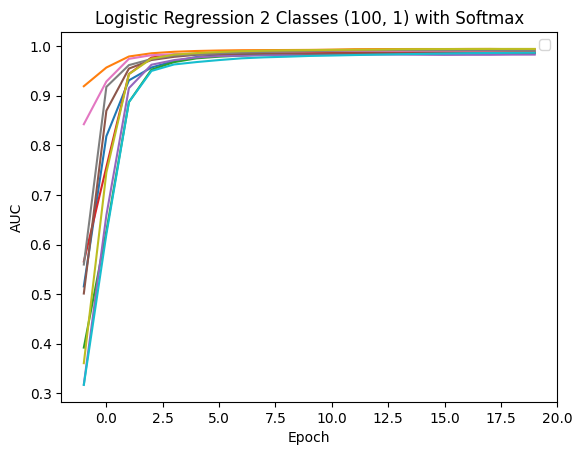

In [23]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [69]:
# SIGMOID 2 CLASSES RATIO

aucs = []
for i in range(10):
    model_aucs = []
    network = sigmoid_logistic_regression.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    _, auc = auc_test.sigmoid_test(test_loader_reduced, network, loss_fn=sigmoid_loss) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_reduced_ratio, network, optimizer, f'softmax_sigmoid_results/sigmoid_results/reduced_ratio{i}/model{epoch}')
        _, auc = auc_test.sigmoid_test(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs)

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.022128139716991478, AUC: 0.4259660355034659 

[tensor([1.0000]), tensor([2.9924e-08]), tensor([2.1295e-06]), tensor([4.3586e-10]), tensor([1.]), tensor([5.0997e-13]), tensor([0.9900]), tensor([0.1078]), tensor([0.0001]), tensor([9.9344e-20]), tensor([6.4400e-15]), tensor([1.7502e-06]), tensor([3.2184e-25]), tensor([4.2159e-14]), tensor([0.9987]), tensor([3.9706e-34]), tensor([1.4426e-15]), tensor([0.0821]), tensor([1.2243e-35]), tensor([0.0646]), tensor([3.1654e-05]), tensor([1.5949e-33]), tensor([2.5292e-13]), tensor([0.8090]), tensor([0.0003]), tensor([1.6268e-27]), tensor([1.0000]), tensor([1.5133e-14]), tensor([1.0000]), tensor([1.8410e-19]), tensor([0.9999]), tensor([0.1442]), tensor([0.0460]), tensor([4.8255e-10]), tensor([4.9129e-09]), tensor([1.]), tensor([5.1181e-26]), tensor([2.0052e-07]), tensor([5.7634e-23]), tensor([0.4124]), tensor([1.]), tensor([1.0000]), tensor([1.0147e-20]), tensor([9.0617e-07]), tensor([4.6064e-24]), tensor([6.0994e-11]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.3217e-14]), tensor([4.4949e-34]), tensor([5.9637e-28]), tensor([6.8285e-36]), tensor([5.5101e-08]), tensor([1.3711e-27]), tensor([3.5225e-18]), tensor([3.6048e-35]), tensor([1.1899e-09]), tensor([0.]), tensor([0.]), tensor([3.5916e-32]), tensor([0.]), tensor([8.3775e-16]), tensor([1.3991e-26]), tensor([6.8452e-33]), tensor([0.]), tensor([0.]), tensor([1.1880e-32]), tensor([1.5620e-36]), tensor([3.5030e-24]), tensor([3.3206e-36]), tensor([0.]), tensor([1.4007e-36]), tensor([3.5494e-27]), tensor([3.8065e-35]), tensor([0.9994]), tensor([4.4139e-25]), tensor([4.6101e-05]), tensor([0.]), tensor([2.1692e-32]), tensor([1.3707e-12]), tensor([3.4154e-09]), tensor([6.2071e-25]), tensor([9.9630e-13]), tensor([0.0032]), tensor([1.0051e-37]), tensor([1.4265e-32]), tensor([7.1557e-23]), tensor([5.3852e-19]), tensor([1.]), tensor([2.7771e-09]), tensor([0.]), tensor([6.6571e-20]), tensor([2.2894e-19]), tensor([2.4515e-28]), tensor([0.1107]), tensor([2.1256e-34]), tensor([2.9453e-08]), tenso

Train Epoch: 2 [3200/11702 (27%)]	Loss: 0.000000
Train Epoch: 2 [3840/11702 (33%)]	Loss: 0.000000
Train Epoch: 2 [4480/11702 (38%)]	Loss: 0.147233
Train Epoch: 2 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 2 [5760/11702 (49%)]	Loss: 0.000016
Train Epoch: 2 [6400/11702 (55%)]	Loss: 4.847901
Train Epoch: 2 [7040/11702 (60%)]	Loss: 2.106693
Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.004285
Train Epoch: 2 [8320/11702 (71%)]	Loss: 1.564993
Train Epoch: 2 [8960/11702 (77%)]	Loss: 0.170829
Train Epoch: 2 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 2 [10240/11702 (87%)]	Loss: 0.119761
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.008408
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.003699365116301037, AUC: 0.9866245772121077 

[tensor([3.0395e-16]), tensor([2.8591e-35]), tensor([9.2597e-27]), tensor([0.]), tensor([4.8619e-11]), tensor([2.6105e-14]), tensor([5.7235e-21]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 3 [5760/11702 (49%)]	Loss: 0.096029
Train Epoch: 3 [6400/11702 (55%)]	Loss: 3.399783
Train Epoch: 3 [7040/11702 (60%)]	Loss: 1.923836
Train Epoch: 3 [7680/11702 (66%)]	Loss: 0.000325
Train Epoch: 3 [8320/11702 (71%)]	Loss: 1.562812
Train Epoch: 3 [8960/11702 (77%)]	Loss: 0.303133
Train Epoch: 3 [9600/11702 (82%)]	Loss: 0.121425
Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.096914
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.028104
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.002434786802493267, AUC: 0.9912184436261376 

[tensor([1.4479e-17]), tensor([1.1368e-35]), tensor([1.2461e-26]), tensor([0.]), tensor([5.2329e-12]), tensor([5.0674e-11]), tensor([2.8971e-22]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([6.4155e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([1.3588e-27]), tensor([0.9875]), tensor([0.]), tensor([0.]), tensor([9.2173e-26]), tensor

Train Epoch: 4 [8320/11702 (71%)]	Loss: 1.562640
Train Epoch: 4 [8960/11702 (77%)]	Loss: 0.366932
Train Epoch: 4 [9600/11702 (82%)]	Loss: 0.000835
Train Epoch: 4 [10240/11702 (87%)]	Loss: 0.037386
Train Epoch: 4 [10880/11702 (93%)]	Loss: 0.056130
Train Epoch: 4 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.001882592775313257, AUC: 0.9935965585387079 

[tensor([1.5296e-19]), tensor([8.8319e-36]), tensor([2.9025e-27]), tensor([0.]), tensor([3.2821e-14]), tensor([1.5909e-07]), tensor([2.3107e-24]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.9868e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1247e-27]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([4.5922e-26]), tensor([0.3107]), tensor([1.]), tensor([1.0000]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.6527e-14]), tensor([1.]), tensor([0.0169]), tensor([1.]), tensor([1.]), tensor([1.7806e-17]), tensor

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0014648405414683973, AUC: 0.9947700762625764 

[tensor([7.7575e-20]), tensor([8.6729e-35]), tensor([5.4146e-27]), tensor([0.]), tensor([2.1679e-14]), tensor([0.0018]), tensor([4.4114e-25]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([7.3550e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.3011e-27]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.7348e-25]), tensor([0.9989]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.4320e-14]), tensor([1.]), tensor([0.6037]), tensor([1.]), tensor([1.]), tensor([2.1504e-15]), tensor([0.]), tensor([1.]), tensor([0.0139]), tensor([1.]), tensor([1.]), tensor([1.8442e-35]), tensor([1.]), tensor([1.]), tensor([9.7845e-37]), tensor([1.]), tensor([1.0044e-36]), tensor([3.3060e-09]), tensor([1.]), tensor([0.]), tensor([0.2236]), tensor([0.]), tensor([3.9113e-18]), tensor([0.]), tensor([1.]), 

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([3.6538e-19]), tensor([9.0824e-32]), tensor([4.8120e-26]), tensor([0.]), tensor([2.8537e-13]), tensor([0.9988]), tensor([4.3627e-25]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.6203e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.8492e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([9.5011e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([3.8687e-13]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.0130e-11]), tensor([0.]), tensor([1.]), tensor([0.9943]), tensor([1.]), tensor([1.]), tensor([1.3589e-32]), tensor([1.]), tensor([1.]), tensor([1.0770e-35]), tensor([1.]), tensor([9.2824e-34]), tensor([1.5127e-08]), tensor([1.]), tensor([3.0174e-35]), tensor([0.9993]), tensor([0.]), tensor([5.6029e-16]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.4889e-22]), tensor([9.9738e-0

Train Epoch: 8 [3840/11702 (33%)]	Loss: 0.000003
Train Epoch: 8 [4480/11702 (38%)]	Loss: 0.000420
Train Epoch: 8 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 8 [5760/11702 (49%)]	Loss: 0.393141
Train Epoch: 8 [6400/11702 (55%)]	Loss: 0.400593
Train Epoch: 8 [7040/11702 (60%)]	Loss: 0.288923
Train Epoch: 8 [7680/11702 (66%)]	Loss: 0.000010
Train Epoch: 8 [8320/11702 (71%)]	Loss: 0.249171
Train Epoch: 8 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 8 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 8 [10240/11702 (87%)]	Loss: 0.001329
Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.238282
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008090951674720022, AUC: 0.9966327007411917 

[tensor([4.0487e-22]), tensor([7.1450e-31]), tensor([2.9034e-27]), tensor([0.]), tensor([2.7333e-15]), tensor([1.0000]), tensor([5.0206e-28]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([6.2449e-29]), tensor([1.]), tensor([0.])

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 9 [7680/11702 (66%)]	Loss: 0.000003
Train Epoch: 9 [8320/11702 (71%)]	Loss: 0.207879
Train Epoch: 9 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 9 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 9 [10240/11702 (87%)]	Loss: 0.000719
Train Epoch: 9 [10880/11702 (93%)]	Loss: 0.238277
Train Epoch: 9 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007647712778600847, AUC: 0.9968138190017705 

[tensor([2.5342e-23]), tensor([7.1664e-31]), tensor([1.5539e-27]), tensor([0.]), tensor([1.7800e-16]), tensor([1.]), tensor([3.8588e-29]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([3.8023e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.5811e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.5118e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.5617e-13]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.])

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0007107089549364757, AUC: 0.9969692163259357 

[tensor([4.6690e-24]), tensor([1.3639e-30]), tensor([1.3926e-27]), tensor([0.]), tensor([3.7671e-17]), tensor([1.]), tensor([6.4222e-30]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([9.8766e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.1756e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.4172e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([2.9528e-13]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.3913e-06]), tensor([0.]), tensor([1.]), tensor([0.9999]), tensor([1.]), tensor([1.]), tensor([9.0994e-31]), tensor([1.]), tensor([1.]), tensor([7.6580e-36]), tensor([1.]), tensor([3.8416e-32]), tensor([1.7946e-09]), tensor([1.]), tensor([3.5425e-34]), tensor([1.0000]), tensor([0.]), tensor([8.2404e-15]), tensor([2.7972e-36]), tensor

[tensor([1.1031e-24]), tensor([3.1112e-30]), tensor([9.9641e-28]), tensor([0.]), tensor([3.7549e-18]), tensor([1.]), tensor([1.1857e-30]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([2.8468e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.9463e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.4736e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([4.9931e-13]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([6.6071e-06]), tensor([0.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.1009e-30]), tensor([1.]), tensor([1.]), tensor([1.5123e-35]), tensor([1.]), tensor([9.1335e-32]), tensor([1.4692e-09]), tensor([1.]), tensor([1.1424e-33]), tensor([1.]), tensor([0.]), tensor([1.9876e-14]), tensor([6.1712e-36]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.2414e-22]), tensor([0.0158]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 13 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 13 [5760/11702 (49%)]	Loss: 0.379192
Train Epoch: 13 [6400/11702 (55%)]	Loss: 0.071778
Train Epoch: 13 [7040/11702 (60%)]	Loss: 0.001587
Train Epoch: 13 [7680/11702 (66%)]	Loss: 0.000001
Train Epoch: 13 [8320/11702 (71%)]	Loss: 0.088339
Train Epoch: 13 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 13 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 13 [10240/11702 (87%)]	Loss: 0.000002
Train Epoch: 13 [10880/11702 (93%)]	Loss: 0.249106
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0006193926955108563, AUC: 0.9972853695026855 

[tensor([3.1533e-25]), tensor([5.5861e-30]), tensor([1.4837e-27]), tensor([0.]), tensor([4.4628e-19]), tensor([1.]), tensor([4.0088e-31]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([6.7055e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.6203e-25]), tensor([1.]), tensor([0.]

Train Epoch: 14 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 14 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 14 [10240/11702 (87%)]	Loss: 0.000002
Train Epoch: 14 [10880/11702 (93%)]	Loss: 0.238277
Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0005965482590114601, AUC: 0.9973603889005584 

[tensor([3.2522e-25]), tensor([6.2005e-30]), tensor([2.3820e-27]), tensor([0.]), tensor([3.3684e-19]), tensor([1.]), tensor([4.3501e-31]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([8.4891e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.2938e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.9113e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([3.8330e-12]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.4835e-05]), tensor([0.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0005918356510916605, AUC: 0.9974021854222306 

[tensor([2.9652e-25]), tensor([4.0400e-30]), tensor([3.4175e-27]), tensor([0.]), tensor([2.9518e-19]), tensor([1.]), tensor([4.4873e-31]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([7.5276e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.6694e-26]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.5584e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([3.0782e-12]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.0537e-05]), tensor([0.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.5588e-31]), tensor([1.]), tensor([1.]), tensor([6.0530e-35]), tensor([1.]), tensor([1.4787e-31]), tensor([9.4655e-10]), tensor([1.]), tensor([6.1146e-33]), tensor([1.]), tensor([0.]), tensor([7.6600e-14]), tensor([3.4032e-36]), tensor([1.]), 

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([3.1323e-25]), tensor([3.4915e-30]), tensor([5.8401e-27]), tensor([0.]), tensor([2.8513e-19]), tensor([1.]), tensor([4.9835e-31]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([8.1617e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.5696e-26]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.6599e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([2.6072e-12]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.9615e-05]), tensor([0.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.0435e-31]), tensor([1.]), tensor([1.]), tensor([6.5938e-35]), tensor([1.]), tensor([1.1533e-31]), tensor([8.3504e-10]), tensor([1.]), tensor([5.1726e-33]), tensor([1.]), tensor([0.]), tensor([5.5399e-14]), tensor([2.3947e-36]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([9.6345e-23]), tensor([0.0216]), ten

Train Epoch: 18 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 18 [5120/11702 (44%)]	Loss: 0.000018
Train Epoch: 18 [5760/11702 (49%)]	Loss: 0.337338
Train Epoch: 18 [6400/11702 (55%)]	Loss: 0.013326
Train Epoch: 18 [7040/11702 (60%)]	Loss: 0.000023
Train Epoch: 18 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 18 [8320/11702 (71%)]	Loss: 0.085116
Train Epoch: 18 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 18 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 18 [10240/11702 (87%)]	Loss: 0.000004
Train Epoch: 18 [10880/11702 (93%)]	Loss: 0.179504
Train Epoch: 18 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0005525831233393825, AUC: 0.9975179296360916 

[tensor([4.5165e-25]), tensor([2.9070e-30]), tensor([2.1852e-26]), tensor([0.]), tensor([3.3083e-19]), tensor([1.]), tensor([8.4666e-31]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.0346e-27]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 19 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 19 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 19 [10240/11702 (87%)]	Loss: 0.000006
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.164270
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0005405142162897572, AUC: 0.9975382920440856 

[tensor([6.8207e-25]), tensor([1.6997e-30]), tensor([4.5197e-26]), tensor([0.]), tensor([4.5399e-19]), tensor([1.]), tensor([1.3357e-30]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([9.7314e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.9641e-27]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.1081e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([8.2812e-12]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0001]), tensor([2.2239e-37]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([2.7245e-06]), tensor([2.4799e-17]), tensor([1.0000]), tensor([0.0004]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.2727e-33]), tensor([1.]), tensor([1.1089e-10]), tensor([6.4998e-20]), tensor([1.3847e-20]), tensor([0.0037]), tensor([1.]), tensor([6.0696e-27]), tensor([1.]), tensor([1.8635e-13]), tensor([4.9213e-06]), tensor([5.5367e-14]), tensor([2.3850e-21]), tensor([0.1035]), tensor([3.3951e-25]), tensor([5.2122e-13]), tensor([0.9685]), tensor([1.4199e-23]), tensor([8.2329e-14]), tensor([1.]), tensor([3.3155e-17]), tensor([0.9860]), tensor([2.0540e-07]), tensor([0.0123]), tensor([0.0012]), tensor([1.]), tensor([1.0000]), tensor([2.3815e-05]), tensor([1.]), tensor([0.0217]), tensor([1.]), tensor([0.0002]), tensor([1.]), tensor([1.1602e-07]), tensor([0.9981]), tensor([0.4835]), tensor([1.]), tensor([1.]), tensor([0.9639]), tensor([1.]), tensor([4.1321e-30]), tensor([0.0090]), tensor([1.]), tensor([0.9997]), tensor([3.6678e-17]), tensor([2.7097e-20]), tensor([0.1911]),

Train Epoch: 1 [3840/11702 (33%)]	Loss: 0.236124
Train Epoch: 1 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 1 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 1 [5760/11702 (49%)]	Loss: 0.053797
Train Epoch: 1 [6400/11702 (55%)]	Loss: 6.408470
Train Epoch: 1 [7040/11702 (60%)]	Loss: 3.300427
Train Epoch: 1 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 1 [8320/11702 (71%)]	Loss: 0.000006
Train Epoch: 1 [8960/11702 (77%)]	Loss: 0.011350
Train Epoch: 1 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 1 [10240/11702 (87%)]	Loss: 0.204831
Train Epoch: 1 [10880/11702 (93%)]	Loss: 0.000008
Train Epoch: 1 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.008489329128778747, AUC: 0.9595495406669439 

[tensor([2.3628e-26]), tensor([0.]), tensor([1.6768e-18]), tensor([0.]), tensor([5.0320e-17]), tensor([0.9981]), tensor([2.7084e-08]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.3748e-22]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor(

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 2 [7040/11702 (60%)]	Loss: 1.793281
Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 2 [8320/11702 (71%)]	Loss: 0.000040
Train Epoch: 2 [8960/11702 (77%)]	Loss: 0.313045
Train Epoch: 2 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 2 [10240/11702 (87%)]	Loss: 0.178965
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.000005
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0040384348381626925, AUC: 0.9836055823005663 

[tensor([1.2680e-24]), tensor([0.]), tensor([6.7344e-18]), tensor([0.]), tensor([1.3138e-17]), tensor([1.]), tensor([2.1510e-08]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([6.1277e-21]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.2417e-21]), tensor([0.9683]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.1249]), tensor([1.]), tensor([8.6047e-07]), tensor([0.0131]), tensor([0.]), tensor([0.]), tensor([1.5830e-23]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 3 [1280/11702 (11%)]	Loss: 0.000095
Train Epoch: 3 [1920/11702 (16%)]	Loss: 0.000515
Train Epoch: 3 [2560/11702 (22%)]	Loss: 0.000000
Train Epoch: 3 [3200/11702 (27%)]	Loss: 0.007348
Train Epoch: 3 [3840/11702 (33%)]	Loss: 0.072695
Train Epoch: 3 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 3 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 3 [5760/11702 (49%)]	Loss: 0.138460
Train Epoch: 3 [6400/11702 (55%)]	Loss: 1.563079
Train Epoch: 3 [7040/11702 (60%)]	Loss: 0.366429
Train Epoch: 3 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 3 [8320/11702 (71%)]	Loss: 0.000104
Train Epoch: 3 [8960/11702 (77%)]	Loss: 1.811600
Train Epoch: 3 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.108285
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.000004
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0025782300078350563, AUC: 0.9896049907190287 

[tensor([5.8113e-24]), tensor([0.]), tensor([1.1993e-18]), tensor([0.]), tensor([5.4757e-19])

Train Epoch: 4 [5760/11702 (49%)]	Loss: 0.192349
Train Epoch: 4 [6400/11702 (55%)]	Loss: 1.563596
Train Epoch: 4 [7040/11702 (60%)]	Loss: 0.203595
Train Epoch: 4 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 4 [8320/11702 (71%)]	Loss: 0.000041
Train Epoch: 4 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 4 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 4 [10240/11702 (87%)]	Loss: 0.079137
Train Epoch: 4 [10880/11702 (93%)]	Loss: 0.000134
Train Epoch: 4 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.001812787591547206, AUC: 0.9924101803466323 

[tensor([4.4351e-24]), tensor([3.0934e-38]), tensor([2.3132e-19]), tensor([0.]), tensor([4.7771e-20]), tensor([1.]), tensor([2.6380e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.0541e-21]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.1689e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), te

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 5 [10880/11702 (93%)]	Loss: 0.002725
Train Epoch: 5 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0013982370711755061, AUC: 0.9940193464310056 

[tensor([3.2315e-24]), tensor([1.3466e-36]), tensor([6.1332e-20]), tensor([0.]), tensor([1.3835e-20]), tensor([1.]), tensor([9.2407e-11]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([8.6630e-22]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.2455e-19]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.4422e-21]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([5.3967e-09]), tensor([2.0772e-21]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.2532e-19]), tensor([1.]), tensor([1.]), tensor([2.7168e-36]), tensor([1.]), tensor([0.]), tensor([1.3769e-16]), tensor([1.]), tensor([5.8197e-

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0013168865417594988, AUC: 0.9946377206106151 

[tensor([2.8125e-25]), tensor([1.4805e-36]), tensor([5.1557e-21]), tensor([0.]), tensor([1.1570e-21]), tensor([1.]), tensor([6.5922e-12]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.2461e-22]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.2085e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9999]), tensor([0.]), tensor([0.]), tensor([3.7879e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.2582e-09]), tensor([3.7620e-23]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([3.6084e-20]), tensor([1.]), tensor([1.]), tensor([9.2452e-38]), tensor([1.]), tensor([0.]), tensor([3.3235e-17]), tensor([1.]), tensor([9.4613e-34]), tensor([0.4455]), tensor([0.]), tensor([2.0040e-33]), tensor([1.3686e-30]), tensor([1.]), tens

[tensor([5.7656e-26]), tensor([1.2947e-36]), tensor([1.4694e-21]), tensor([0.]), tensor([4.6430e-22]), tensor([1.]), tensor([2.0705e-12]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.5974e-23]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.3459e-21]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9999]), tensor([0.]), tensor([0.]), tensor([1.4512e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.4845e-09]), tensor([1.4368e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0616e-20]), tensor([1.]), tensor([1.]), tensor([8.0531e-39]), tensor([1.]), tensor([0.]), tensor([1.3375e-17]), tensor([1.]), tensor([6.1694e-34]), tensor([0.6807]), tensor([0.]), tensor([4.9056e-34]), tensor([6.7956e-31]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.1638e-31]), tensor([1.]), tensor([0.]), t

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 9 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 9 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 9 [5760/11702 (49%)]	Loss: 0.059447
Train Epoch: 9 [6400/11702 (55%)]	Loss: 1.570084
Train Epoch: 9 [7040/11702 (60%)]	Loss: 0.000801
Train Epoch: 9 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 9 [8320/11702 (71%)]	Loss: 0.000135
Train Epoch: 9 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 9 [9600/11702 (82%)]	Loss: 0.000001
Train Epoch: 9 [10240/11702 (87%)]	Loss: 0.008419
Train Epoch: 9 [10880/11702 (93%)]	Loss: 0.019360
Train Epoch: 9 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0010896715688409272, AUC: 0.9956397654250599 

[tensor([3.1743e-26]), tensor([3.9815e-36]), tensor([6.6362e-22]), tensor([0.]), tensor([5.0346e-22]), tensor([1.]), tensor([1.0187e-12]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([9.1399e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2

Train Epoch: 10 [10240/11702 (87%)]	Loss: 0.007734
Train Epoch: 10 [10880/11702 (93%)]	Loss: 0.029648
Train Epoch: 10 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0010332742524690017, AUC: 0.9958503555919459 

[tensor([2.5851e-26]), tensor([9.4016e-36]), tensor([5.5526e-22]), tensor([0.]), tensor([4.9662e-22]), tensor([1.]), tensor([7.4009e-13]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([6.4141e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.9029e-21]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([4.8059e-23]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.8933e-08]), tensor([4.0605e-26]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.5158e-21]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0009645678056693225, AUC: 0.9960030736519014 

[tensor([2.5467e-26]), tensor([2.4579e-35]), tensor([4.7533e-22]), tensor([0.]), tensor([4.8698e-22]), tensor([1.]), tensor([6.0232e-13]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.5705e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.0573e-21]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([7.8273e-23]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.5947e-07]), tensor([2.4742e-26]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.0663e-21]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.3859e-18]), tensor([1.]), tensor([3.9539e-32]), tensor([0.9992]), tensor([0.]), tensor([3.2260e-34]), tensor([3.3276e-31]), tensor([1.]), tensor([1.]), te

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([2.3768e-26]), tensor([7.1425e-35]), tensor([4.4882e-22]), tensor([0.]), tensor([4.8441e-22]), tensor([1.]), tensor([5.3018e-13]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.8328e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.8773e-21]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([8.7238e-23]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.7406e-07]), tensor([2.4253e-26]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.5313e-21]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.0975e-18]), tensor([1.]), tensor([9.2796e-32]), tensor([0.9998]), tensor([0.]), tensor([4.1862e-34]), tensor([4.7839e-31]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.5688e-29]), tensor([1.]), tensor([0.]), tensor([1

Train Epoch: 14 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 14 [5760/11702 (49%)]	Loss: 0.008001
Train Epoch: 14 [6400/11702 (55%)]	Loss: 0.140999
Train Epoch: 14 [7040/11702 (60%)]	Loss: 0.000015
Train Epoch: 14 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 14 [8320/11702 (71%)]	Loss: 0.001192
Train Epoch: 14 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 14 [9600/11702 (82%)]	Loss: 0.000898
Train Epoch: 14 [10240/11702 (87%)]	Loss: 0.009314
Train Epoch: 14 [10880/11702 (93%)]	Loss: 0.046953
Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008196270336275516, AUC: 0.9963765630827399 

[tensor([1.9422e-26]), tensor([3.3988e-34]), tensor([3.0078e-22]), tensor([0.]), tensor([6.5443e-22]), tensor([1.]), tensor([2.9064e-13]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.2863e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.5417e-21]), tensor([1.]), tensor([0.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 15 [10880/11702 (93%)]	Loss: 0.043183
Train Epoch: 15 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007845134653660081, AUC: 0.9964724807414489 

[tensor([1.6030e-26]), tensor([6.8823e-34]), tensor([2.0298e-22]), tensor([0.]), tensor([7.8020e-22]), tensor([1.]), tensor([1.8831e-13]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.6485e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.9638e-21]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.4745e-39]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([3.7121e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([6.3107e-06]), tensor([6.2513e-26]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([8.1358e-21]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.6523e-19]), tensor([1.]), tensor([1.2631e-31

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0007280587039378859, AUC: 0.9966134100388815 

[tensor([1.1938e-26]), tensor([4.6421e-33]), tensor([1.4183e-22]), tensor([0.]), tensor([1.3527e-21]), tensor([1.]), tensor([8.1244e-14]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.7164e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1525e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.2589e-38]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([5.4572e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.8497e-05]), tensor([1.9652e-25]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.3250e-20]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.2285e-19]), tensor([1.]), tensor([2.3490e-31]), tensor([1.0000]), tensor([0.]), tensor([6.8846e-34]), tensor([2.5086e-30]), tensor([1.]), tensor([

[tensor([5.6947e-27]), tensor([1.0749e-32]), tensor([7.1699e-23]), tensor([0.]), tensor([1.4617e-21]), tensor([1.]), tensor([2.9568e-14]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.5800e-39]), tensor([0.]), tensor([1.1785e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.4668e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.4022e-38]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.3733e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.5747e-05]), tensor([2.8936e-25]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.1244e-20]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.3173e-19]), tensor([1.]), tensor([1.5653e-31]), tensor([1.0000]), tensor([0.]), tensor([5.0648e-34]), tensor([3.3456e-30]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.9480e-27]), tensor([1.]), tensor([0.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 19 [5760/11702 (49%)]	Loss: 0.005943
Train Epoch: 19 [6400/11702 (55%)]	Loss: 0.018435
Train Epoch: 19 [7040/11702 (60%)]	Loss: 0.000002
Train Epoch: 19 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 19 [8320/11702 (71%)]	Loss: 0.000270
Train Epoch: 19 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 19 [9600/11702 (82%)]	Loss: 0.010630
Train Epoch: 19 [10240/11702 (87%)]	Loss: 0.001391
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.032028
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0006624141218252557, AUC: 0.9967929207409345 

[tensor([9.7189e-28]), tensor([3.9841e-32]), tensor([1.7909e-23]), tensor([0.]), tensor([4.2984e-22]), tensor([1.]), tensor([2.5452e-15]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1889e-38]), tensor([0.]), tensor([4.7839e-25]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.7591e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.8482e-38]), ten

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.]), tensor([6.5564e-39]), tensor([1.]), tensor([0.]), tensor([0.0002]), tensor([0.]), tensor([1.]), tensor([1.3961e-38]), tensor([1.0000]), tensor([1.1555e-20]), tensor([0.]), tensor([3.9989e-17]), tensor([0.9998]), tensor([8.2888e-11]), tensor([0.]), tensor([2.3400e-11]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.3289e-20]), tensor([0.]), tensor([1.6352e-22]), tensor([1.0000]), tensor([2.6754e-36]), tensor([6.4920e-09]), tensor([1.9411e-33]), tensor([1.2190e-24]), tensor([0.]), tensor([8.3590e-37]), tensor([0.]), tensor([3.1799e-12]), tensor([2.0223e-33]), tensor([0.9997]), tensor([7.3556e-26]), tensor([4.0438e-05]), tensor([9.3335e-24]), tensor([8.2497e-19]), tensor([1.]), tensor([2.3840e-25]), tensor([1.6521e-38]), tensor([8.0369e-31]), tensor([9.8444e-16]), tensor([3.0344e-34]), tensor([4.4527e-20]), tensor([1.6166e-22]), tensor([4.9957e-21]), tensor([2.4205e-17]), tensor([6.2575e-29]), tensor([1.8329e-13]), tensor([0.0051]), tensor([1.6966e-20]), tensor([0.]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([0.2920]), tensor([0.]), tensor([9.7197e-08]), tensor([0.]), tensor([3.3179e-19]), tensor([8.3510e-38]), tensor([0.9997]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.0452e-33]), tensor([4.7868e-10]), tensor([0.9932]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.9663e-29]), tensor([0.]), tensor([0.]), tensor([4.0420e-09]), tensor([2.5644e-17]), tensor([0.]), tensor([2.6788e-22]), tensor([1.7396e-24]), tensor([3.4926e-10]), tensor([3.1944e-34]), tensor([4.0686e-34]), tensor([0.]), tensor([1.3463e-36]), tensor([1.2948e-32]), tensor([1.]), tensor([9.7915e-24]), tensor([1.0000]), tensor([2.7338e-16]), tensor([2.0013e-18]), tensor([1.6430e-11]), tensor([6.4315e-10]), tensor([3.1938e-39]), tensor([8.2991e-26]), tensor([1.1000e-09]), tensor([0.]), tensor([6.1550e-24]), tensor([7.4432e-06]), tensor([2.6921e-29]), tensor([0.0007]), tensor([0.]), tensor([2.5893e-22]), tensor([0.8798]), tensor([0.]), tensor([4.2385e-35]), tensor([0.]), tenso

Train Epoch: 2 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 2 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 2 [5760/11702 (49%)]	Loss: 0.995650
Train Epoch: 2 [6400/11702 (55%)]	Loss: 3.213667
Train Epoch: 2 [7040/11702 (60%)]	Loss: 1.910421
Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.004812
Train Epoch: 2 [8320/11702 (71%)]	Loss: 0.464286
Train Epoch: 2 [8960/11702 (77%)]	Loss: 0.003890
Train Epoch: 2 [9600/11702 (82%)]	Loss: 0.000038
Train Epoch: 2 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.000727
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0030633802246109545, AUC: 0.9859622630994587 

[tensor([6.6399e-05]), tensor([0.]), tensor([1.0740e-15]), tensor([0.]), tensor([1.3986e-25]), tensor([8.9570e-17]), tensor([0.0009]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.1041e-34]), tensor([2.0359e-15]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 3 [9600/11702 (82%)]	Loss: 0.001539
Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.000050
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0019704777261485224, AUC: 0.99070777586776 

[tensor([3.3778e-06]), tensor([0.]), tensor([3.8447e-16]), tensor([0.]), tensor([6.8559e-26]), tensor([1.8043e-12]), tensor([0.0001]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([5.8036e-35]), tensor([3.2563e-16]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([2.0577e-32]), tensor([0.]), tensor([3.7176e-25]), tensor([1.]), tensor([1.]), tensor([0.0373]), tensor([7.2613e-10]), tensor([0.]), tensor([0.]), tensor([2.7853e-20]), tensor([1.]), tensor([0.9382]), tensor([1.]), tensor([1.]), tensor([0.0003]), tensor([5.6889e-22]), tensor([1.]), tensor([9.9358e-08]), tensor([0.9622]), tensor([1.]), tensor([8.5531e-31]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0014391166946655968, AUC: 0.9928913761987028 

[tensor([4.2973e-07]), tensor([0.]), tensor([5.6997e-16]), tensor([0.]), tensor([3.0661e-26]), tensor([9.8725e-09]), tensor([4.6738e-05]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.7011e-34]), tensor([1.5503e-16]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([8.0460e-33]), tensor([0.]), tensor([3.1086e-24]), tensor([1.]), tensor([1.]), tensor([0.9959]), tensor([4.8631e-08]), tensor([0.]), tensor([0.]), tensor([1.1790e-19]), tensor([1.]), tensor([0.9999]), tensor([1.]), tensor([1.]), tensor([0.0014]), tensor([3.9157e-22]), tensor([1.]), tensor([0.0002]), tensor([1.0000]), tensor([1.]), tensor([1.0601e-29]), tensor([1.0165e-10]), tensor([1.]), tensor([1.1878e-30]), tensor([1.]), tensor([2.1559e-34]), tensor([1.8013e-22]), tensor([1.]), tensor([7.4175e-30]), tensor([0.2461]), tensor([0.]), tensor([5.9053e-20

[tensor([1.3689e-07]), tensor([0.]), tensor([1.1314e-15]), tensor([0.]), tensor([1.2414e-26]), tensor([2.6309e-06]), tensor([3.0387e-05]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.1154e-34]), tensor([9.8341e-17]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([4.1788e-33]), tensor([0.]), tensor([1.1391e-23]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([6.5221e-07]), tensor([0.]), tensor([0.]), tensor([9.2047e-19]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([0.0040]), tensor([8.1592e-22]), tensor([1.]), tensor([0.0275]), tensor([1.]), tensor([1.]), tensor([4.5564e-29]), tensor([9.5828e-09]), tensor([1.]), tensor([1.4950e-31]), tensor([1.]), tensor([6.0883e-33]), tensor([2.2915e-22]), tensor([1.]), tensor([2.3154e-28]), tensor([0.9725]), tensor([0.]), tensor([1.2111e-19]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.9501e

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 7 [5760/11702 (49%)]	Loss: 0.498513
Train Epoch: 7 [6400/11702 (55%)]	Loss: 0.141358
Train Epoch: 7 [7040/11702 (60%)]	Loss: 1.711335
Train Epoch: 7 [7680/11702 (66%)]	Loss: 0.028683
Train Epoch: 7 [8320/11702 (71%)]	Loss: 0.157186
Train Epoch: 7 [8960/11702 (77%)]	Loss: 1.562500
Train Epoch: 7 [9600/11702 (82%)]	Loss: 0.117434
Train Epoch: 7 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 7 [10880/11702 (93%)]	Loss: 0.000158
Train Epoch: 7 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0010681065651694194, AUC: 0.9940241691065833 

[tensor([4.6881e-08]), tensor([0.]), tensor([2.0162e-15]), tensor([0.]), tensor([1.9778e-27]), tensor([0.0021]), tensor([1.4962e-05]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.6024e-34]), tensor([3.1599e-17]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.0867e-33]), tensor([0.]), tensor([1.2417e-23]), tensor([1.]), ten

Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.000101
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.000997540003024273, AUC: 0.9947282797409044 

[tensor([1.6230e-08]), tensor([0.]), tensor([1.5761e-15]), tensor([0.]), tensor([2.1652e-28]), tensor([0.0051]), tensor([5.1736e-06]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.2684e-34]), tensor([1.3595e-17]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([6.0951e-39]), tensor([1.]), tensor([2.7551e-34]), tensor([0.]), tensor([8.0923e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.2533e-05]), tensor([0.]), tensor([0.]), tensor([2.0497e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0035]), tensor([4.4027e-20]), tensor([1.]), tensor([0.9953]), tensor([1.]), tensor([1.]), tensor([1.0318e-28]), tensor([8.1066e-05]), tensor([1.]), tensor([3.8493e-35]), tensor([1.]), tensor([5.3903e-31]), tensor([4.4201e-2

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0009733662163495523, AUC: 0.9949077904429574 

[tensor([4.8182e-09]), tensor([0.]), tensor([1.4129e-15]), tensor([0.]), tensor([1.6948e-29]), tensor([0.0103]), tensor([2.1773e-06]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.8251e-35]), tensor([7.5517e-18]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.0916e-38]), tensor([1.]), tensor([8.7474e-35]), tensor([0.]), tensor([8.6953e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([8.4877e-05]), tensor([0.]), tensor([0.]), tensor([5.7768e-20]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0021]), tensor([6.3207e-20]), tensor([1.]), tensor([0.9990]), tensor([1.]), tensor([1.]), tensor([7.0767e-29]), tensor([0.0003]), tensor([1.]), tensor([4.4142e-36]), tensor([1.]), tensor([5.8142e-31]), tensor([5.6788e-22]), tensor([1.]), tensor([9.5558e-27]), tensor([1.0000]), tensor([0.]), tensor([2.2240e-20]), tensor([

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.7665e-09]), tensor([0.]), tensor([1.3752e-15]), tensor([0.]), tensor([2.0998e-30]), tensor([0.0103]), tensor([8.3736e-07]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.2426e-35]), tensor([3.5187e-18]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.4863e-38]), tensor([1.]), tensor([2.3938e-35]), tensor([0.]), tensor([3.9128e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0003]), tensor([0.]), tensor([0.]), tensor([3.0621e-20]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0024]), tensor([1.0338e-19]), tensor([1.]), tensor([0.9997]), tensor([1.]), tensor([1.]), tensor([5.7024e-29]), tensor([0.0017]), tensor([1.]), tensor([1.0838e-36]), tensor([1.]), tensor([4.5671e-31]), tensor([6.8302e-22]), tensor([1.]), tensor([2.6456e-27]), tensor([1.0000]), tensor([0.]), tensor([1.1277e-20]), tensor([3.8427e-39]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([8.7314e-27]

Train Epoch: 12 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 12 [5760/11702 (49%)]	Loss: 0.221101
Train Epoch: 12 [6400/11702 (55%)]	Loss: 0.017258
Train Epoch: 12 [7040/11702 (60%)]	Loss: 1.651878
Train Epoch: 12 [7680/11702 (66%)]	Loss: 0.010071
Train Epoch: 12 [8320/11702 (71%)]	Loss: 0.006684
Train Epoch: 12 [8960/11702 (77%)]	Loss: 1.564240
Train Epoch: 12 [9600/11702 (82%)]	Loss: 0.096495
Train Epoch: 12 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 12 [10880/11702 (93%)]	Loss: 0.000067
Train Epoch: 12 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008357371787847199, AUC: 0.9957828381338603 

[tensor([8.5135e-10]), tensor([0.]), tensor([3.0143e-15]), tensor([0.]), tensor([2.5705e-31]), tensor([0.0685]), tensor([4.5706e-07]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([8.6062e-37]), tensor([1.4719e-18]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.2307e-38]), tensor([1.]), tensor(

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 13 [8960/11702 (77%)]	Loss: 1.568239
Train Epoch: 13 [9600/11702 (82%)]	Loss: 0.091325
Train Epoch: 13 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 13 [10880/11702 (93%)]	Loss: 0.000054
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008154837395340266, AUC: 0.9958369592708971 

[tensor([6.9935e-10]), tensor([0.]), tensor([3.7470e-15]), tensor([0.]), tensor([1.3738e-31]), tensor([0.1733]), tensor([3.6749e-07]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.0548e-37]), tensor([9.8238e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([6.8627e-38]), tensor([1.]), tensor([3.9834e-36]), tensor([0.]), tensor([1.1898e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0130]), tensor([0.]), tensor([0.]), tensor([1.3130e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0291]), tensor([2.0405e-18]), tensor([1.]), tensor([1.0000]), tensor([1.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0008000853639211714, AUC: 0.9958846501738307 

[tensor([5.7611e-10]), tensor([0.]), tensor([6.4049e-15]), tensor([0.]), tensor([8.4709e-32]), tensor([0.3526]), tensor([3.4971e-07]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.7450e-38]), tensor([7.3661e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.8889e-38]), tensor([1.]), tensor([3.0249e-36]), tensor([0.]), tensor([9.7809e-25]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0253]), tensor([0.]), tensor([0.]), tensor([1.8291e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0426]), tensor([4.9615e-18]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.1184e-28]), tensor([0.7810]), tensor([1.]), tensor([2.5084e-37]), tensor([1.]), tensor([3.7888e-31]), tensor([9.4464e-22]), tensor([1.]), tensor([1.6959e-27]), tensor([1.0000]), tensor([0.]), tensor([8.4067e-20]), tensor([8.13

[tensor([4.6546e-10]), tensor([0.]), tensor([9.3013e-15]), tensor([0.]), tensor([6.1539e-32]), tensor([0.5718]), tensor([3.1264e-07]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.3519e-38]), tensor([5.7539e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.2723e-37]), tensor([1.]), tensor([2.1685e-36]), tensor([0.]), tensor([7.7595e-25]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0495]), tensor([0.]), tensor([0.]), tensor([2.6383e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0661]), tensor([1.0376e-17]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.1165e-28]), tensor([0.9192]), tensor([1.]), tensor([2.0238e-37]), tensor([1.]), tensor([3.4157e-31]), tensor([8.7019e-22]), tensor([1.]), tensor([1.5747e-27]), tensor([1.0000]), tensor([0.]), tensor([1.4103e-19]), tensor([8.0766e-39]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.1392e-24]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([2.9776e-10]), tensor([0.]), tensor([1.0121e-14]), tensor([0.]), tensor([5.6321e-32]), tensor([0.7252]), tensor([2.0615e-07]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.5329e-39]), tensor([4.9505e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.0899e-37]), tensor([1.]), tensor([1.8071e-36]), tensor([0.]), tensor([5.6082e-25]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0870]), tensor([0.]), tensor([0.]), tensor([3.8151e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.1176]), tensor([2.0499e-17]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.3099e-28]), tensor([0.9693]), tensor([1.]), tensor([1.8589e-37]), tensor([1.]), tensor([3.7263e-31]), tensor([9.3079e-22]), tensor([1.]), tensor([1.2006e-27]), tensor([1.0000]), tensor([0.]), tensor([1.8073e-19]), tensor([1.0402e-38]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([4.1128e-24]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 18 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 18 [5760/11702 (49%)]	Loss: 0.080488
Train Epoch: 18 [6400/11702 (55%)]	Loss: 0.010484
Train Epoch: 18 [7040/11702 (60%)]	Loss: 1.577236
Train Epoch: 18 [7680/11702 (66%)]	Loss: 0.003382
Train Epoch: 18 [8320/11702 (71%)]	Loss: 0.011448
Train Epoch: 18 [8960/11702 (77%)]	Loss: 1.580222
Train Epoch: 18 [9600/11702 (82%)]	Loss: 0.067621
Train Epoch: 18 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 18 [10880/11702 (93%)]	Loss: 0.000051
Train Epoch: 18 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007484783081040866, AUC: 0.9960282587354731 

[tensor([1.6423e-10]), tensor([0.]), tensor([1.2990e-14]), tensor([0.]), tensor([6.1959e-32]), tensor([0.9234]), tensor([1.3809e-07]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.8435e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.9321e-37]), tensor([1.]), tensor([1.2078e

Train Epoch: 19 [8320/11702 (71%)]	Loss: 0.007572
Train Epoch: 19 [8960/11702 (77%)]	Loss: 1.580378
Train Epoch: 19 [9600/11702 (82%)]	Loss: 0.060587
Train Epoch: 19 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.000046
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007370140241539997, AUC: 0.9960561230832544 

[tensor([7.9816e-11]), tensor([0.]), tensor([1.0245e-14]), tensor([0.]), tensor([6.2022e-32]), tensor([0.9594]), tensor([6.1287e-08]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.4967e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.7483e-37]), tensor([1.]), tensor([8.4596e-37]), tensor([0.]), tensor([3.1594e-25]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.3310]), tensor([0.]), tensor([0.]), tensor([1.3829e-18]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.4065]), tensor([8.6945e-17]), t

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([0.2439]), tensor([2.9756e-08]), tensor([0.9984]), tensor([0.9999]), tensor([4.8587e-15]), tensor([0.]), tensor([1.6728e-08]), tensor([1.3976e-19]), tensor([4.7045e-24]), tensor([3.4385e-34]), tensor([2.6375e-29]), tensor([0.9994]), tensor([2.4285e-11]), tensor([6.7195e-14]), tensor([2.1345e-30]), tensor([6.1331e-26]), tensor([0.]), tensor([1.5495e-32]), tensor([4.0739e-20]), tensor([3.2058e-29]), tensor([0.9983]), tensor([0.]), tensor([2.9464e-20]), tensor([1.1942e-05]), tensor([1.2271e-19]), tensor([6.2297e-25]), tensor([2.8279e-15]), tensor([4.8434e-14]), tensor([3.1826e-10]), tensor([4.1858e-15]), tensor([5.6568e-29]), tensor([6.8067e-19]), tensor([1.3059e-29]), tensor([2.6900e-18]), tensor([0.]), tensor([0.]), tensor([5.2792e-12]), tensor([1.]), tensor([0.]), tensor([6.6650e-36]), tensor([1.3182e-38]), tensor([0.]), tensor([1.2091e-10]), tensor([4.0251e-26]), tensor([1.]), tensor([6.9387e-14]), tensor([1.1064e-23]), tensor([3.0123e-06]), tensor([1.0000]), tensor([7.5700e-2

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 1 [3200/11702 (27%)]	Loss: 0.001663
Train Epoch: 1 [3840/11702 (33%)]	Loss: 0.000048
Train Epoch: 1 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 1 [5120/11702 (44%)]	Loss: 0.341025
Train Epoch: 1 [5760/11702 (49%)]	Loss: 0.000000
Train Epoch: 1 [6400/11702 (55%)]	Loss: 18.007149
Train Epoch: 1 [7040/11702 (60%)]	Loss: 5.207360
Train Epoch: 1 [7680/11702 (66%)]	Loss: 1.988596
Train Epoch: 1 [8320/11702 (71%)]	Loss: 0.315037
Train Epoch: 1 [8960/11702 (77%)]	Loss: 0.153678
Train Epoch: 1 [9600/11702 (82%)]	Loss: 0.006135
Train Epoch: 1 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 1 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 1 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.012370070068485742, AUC: 0.9355615523442491 

[tensor([8.0097e-07]), tensor([1.8305e-30]), tensor([2.6737e-13]), tensor([1.4085e-28]), tensor([2.1604e-27]), tensor([0.]), tensor([1.4310e-18]), tensor([0.]), tensor([0.0054]), tensor([0.]), tensor([0.]), tensor([5.1653e-26]), tensor([2.8

Train Epoch: 2 [7040/11702 (60%)]	Loss: 1.843137
Train Epoch: 2 [7680/11702 (66%)]	Loss: 1.783240
Train Epoch: 2 [8320/11702 (71%)]	Loss: 1.960748
Train Epoch: 2 [8960/11702 (77%)]	Loss: 0.396277
Train Epoch: 2 [9600/11702 (82%)]	Loss: 0.002207
Train Epoch: 2 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0055415045400583965, AUC: 0.9730123074680739 

[tensor([3.9272e-06]), tensor([2.6623e-32]), tensor([2.8041e-13]), tensor([7.7297e-37]), tensor([1.0182e-26]), tensor([7.3963e-28]), tensor([4.7192e-18]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([8.8940e-32]), tensor([6.9077e-24]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.9761e-20]), tensor([0.9994]), tensor([0.]), tensor([0.]), tensor([2.7943e-28]), tensor([0.9999]), tensor([1.]), tensor([1.0000]), tensor([0.0974]), tensor([0.]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.003534802368709019, AUC: 0.9833912411637864 

[tensor([3.1105e-07]), tensor([9.8347e-33]), tensor([7.6294e-14]), tensor([0.]), tensor([3.1126e-27]), tensor([2.5523e-19]), tensor([1.3484e-18]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.6263e-35]), tensor([6.9002e-25]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.1389e-22]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.4227e-26]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.1708]), tensor([0.]), tensor([0.]), tensor([8.4198e-16]), tensor([1.]), tensor([3.4303e-06]), tensor([1.]), tensor([2.0054e-09]), tensor([1.6027e-06]), tensor([1.3123e-18]), tensor([1.]), tensor([8.4507e-24]), tensor([0.0039]), tensor([0.0004]), tensor([3.9985e-33]), tensor([6.0575e-08]), tensor([1.]), tensor([8.0224e-35]), tensor([1.]), tensor(

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.002401551104480435, AUC: 0.9883446648347645 

[tensor([2.1138e-07]), tensor([2.1285e-31]), tensor([9.4001e-14]), tensor([0.]), tensor([2.9766e-27]), tensor([1.0821e-12]), tensor([6.3790e-19]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.7050e-37]), tensor([5.2593e-25]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.0705e-22]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.1562e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.8089]), tensor([0.]), tensor([0.]), tensor([1.7979e-16]), tensor([1.]), tensor([0.0025]), tensor([1.]), tensor([0.7857]), tensor([0.0003]), tensor([4.4714e-19]), tensor([1.]), tensor([3.6848e-20]), tensor([0.9989]), tensor([1.0000]), tensor([5.6565e-33]), tensor([0.0010]), tensor([1.]), tensor([2.5565e-36]), tensor([1.]), tensor([2.5335e-33]), tensor([1.3652e-06]), tensor([0.7743]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.2257e-32]

[tensor([5.4047e-09]), tensor([1.2499e-30]), tensor([1.0814e-14]), tensor([0.]), tensor([7.6766e-29]), tensor([5.5449e-08]), tensor([3.5348e-20]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([6.0784e-26]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.3113e-22]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([7.1154e-24]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9468]), tensor([0.]), tensor([0.]), tensor([6.3024e-17]), tensor([1.]), tensor([0.0806]), tensor([1.]), tensor([1.]), tensor([0.0132]), tensor([9.1442e-21]), tensor([1.]), tensor([8.4353e-18]), tensor([1.0000]), tensor([1.]), tensor([1.3582e-32]), tensor([0.2010]), tensor([1.]), tensor([3.7037e-37]), tensor([1.]), tensor([1.6497e-33]), tensor([7.7738e-07]), tensor([0.9889]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.5986e-32]), tensor([5.6790e-29]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([0.]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 7 [3840/11702 (33%)]	Loss: 0.102887
Train Epoch: 7 [4480/11702 (38%)]	Loss: 0.005549
Train Epoch: 7 [5120/11702 (44%)]	Loss: 0.004226
Train Epoch: 7 [5760/11702 (49%)]	Loss: 0.293730
Train Epoch: 7 [6400/11702 (55%)]	Loss: 0.000126
Train Epoch: 7 [7040/11702 (60%)]	Loss: 0.063504
Train Epoch: 7 [7680/11702 (66%)]	Loss: 0.053645
Train Epoch: 7 [8320/11702 (71%)]	Loss: 0.360410
Train Epoch: 7 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 7 [9600/11702 (82%)]	Loss: 0.014668
Train Epoch: 7 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 7 [10880/11702 (93%)]	Loss: 0.000013
Train Epoch: 7 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.001409408530339938, AUC: 0.992740265697273 

[tensor([2.0559e-11]), tensor([7.8161e-30]), tensor([2.3519e-16]), tensor([0.]), tensor([1.3434e-30]), tensor([0.0336]), tensor([2.0553e-21]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.2883e-27]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), 

Train Epoch: 8 [7680/11702 (66%)]	Loss: 0.006094
Train Epoch: 8 [8320/11702 (71%)]	Loss: 0.284550
Train Epoch: 8 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 8 [9600/11702 (82%)]	Loss: 0.012835
Train Epoch: 8 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.000019
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0013292687588350126, AUC: 0.9932241408135531 

[tensor([1.2643e-12]), tensor([5.5110e-30]), tensor([4.0357e-17]), tensor([0.]), tensor([1.2426e-31]), tensor([0.7609]), tensor([6.3034e-22]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.2207e-28]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.1390e-24]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.8687e-23]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9904]), tensor([0.]), tensor([0.]), tensor([1.3552e-18]), tensor([1.]), tensor([0.1425]), tensor([1.]), tensor([

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0012090802809713297, AUC: 0.9940841846248816 

[tensor([1.8921e-13]), tensor([4.7340e-30]), tensor([1.1036e-17]), tensor([0.]), tensor([4.9390e-32]), tensor([0.9983]), tensor([2.8213e-22]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.2712e-29]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([6.3798e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.6947e-23]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9856]), tensor([0.]), tensor([0.]), tensor([4.0315e-19]), tensor([1.]), tensor([0.0676]), tensor([1.]), tensor([1.]), tensor([0.0066]), tensor([1.9542e-24]), tensor([1.]), tensor([8.2082e-13]), tensor([1.]), tensor([1.]), tensor([8.6750e-36]), tensor([0.9996]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.3098e-35]), tensor([1.0480e-07]), tensor([0.9895]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.9991e-32]), tensor([1.2043e-29]), tensor

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([2.7355e-14]), tensor([7.9856e-30]), tensor([2.7473e-18]), tensor([0.]), tensor([7.3586e-33]), tensor([1.0000]), tensor([7.2924e-23]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([5.6609e-30]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.4129e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([5.1487e-23]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9701]), tensor([0.]), tensor([0.]), tensor([4.3253e-20]), tensor([1.]), tensor([0.0588]), tensor([1.]), tensor([1.]), tensor([0.0027]), tensor([1.3559e-24]), tensor([1.]), tensor([4.3063e-12]), tensor([1.]), tensor([1.]), tensor([2.3287e-36]), tensor([0.9999]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([9.0062e-36]), tensor([7.6289e-08]), tensor([0.9828]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([9.3430e-32]), tensor([8.1325e-30]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor(

Train Epoch: 12 [3200/11702 (27%)]	Loss: 0.000000
Train Epoch: 12 [3840/11702 (33%)]	Loss: 0.014624
Train Epoch: 12 [4480/11702 (38%)]	Loss: 0.033840
Train Epoch: 12 [5120/11702 (44%)]	Loss: 0.000003
Train Epoch: 12 [5760/11702 (49%)]	Loss: 0.202331
Train Epoch: 12 [6400/11702 (55%)]	Loss: 0.000002
Train Epoch: 12 [7040/11702 (60%)]	Loss: 0.015117
Train Epoch: 12 [7680/11702 (66%)]	Loss: 0.000004
Train Epoch: 12 [8320/11702 (71%)]	Loss: 0.002905
Train Epoch: 12 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 12 [9600/11702 (82%)]	Loss: 0.019799
Train Epoch: 12 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 12 [10880/11702 (93%)]	Loss: 0.000062
Train Epoch: 12 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.001019126078110057, AUC: 0.9948858204764375 

[tensor([1.6977e-15]), tensor([2.8600e-29]), tensor([3.3174e-19]), tensor([0.]), tensor([6.2030e-34]), tensor([1.]), tensor([1.2254e-23]), tensor([4.4351e-39]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([7.

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 13 [7040/11702 (60%)]	Loss: 0.008135
Train Epoch: 13 [7680/11702 (66%)]	Loss: 0.000004
Train Epoch: 13 [8320/11702 (71%)]	Loss: 0.001985
Train Epoch: 13 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 13 [9600/11702 (82%)]	Loss: 0.024554
Train Epoch: 13 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 13 [10880/11702 (93%)]	Loss: 0.000068
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0009715833525726761, AUC: 0.9950374668307089 

[tensor([6.8017e-16]), tensor([4.2555e-29]), tensor([1.5612e-19]), tensor([0.]), tensor([2.8835e-34]), tensor([1.]), tensor([7.5277e-24]), tensor([1.6171e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.8429e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.4043e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.9971e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9548]), tensor([0.]), tensor([0.]), tensor([7.3580e

Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.000968366691661424, AUC: 0.9947202419482751 

[tensor([4.0179e-16]), tensor([6.0181e-29]), tensor([1.0035e-19]), tensor([0.]), tensor([2.3624e-34]), tensor([1.]), tensor([6.8678e-24]), tensor([4.0608e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.9867e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.3539e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.6960e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9347]), tensor([0.]), tensor([0.]), tensor([6.0516e-21]), tensor([1.]), tensor([0.1668]), tensor([1.]), tensor([1.]), tensor([0.0338]), tensor([1.7602e-24]), tensor([1.]), tensor([2.6853e-09]), tensor([1.]), tensor([1.]), tensor([1.4109e-36]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.8653e-36]), tensor([4.3597e-08]), tensor([0.9792]), tensor([1.4706e-38]), tensor([1.]), tensor

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.00093289750086348, AUC: 0.9948215181354035 

[tensor([1.3684e-16]), tensor([8.9576e-29]), tensor([4.0104e-20]), tensor([0.]), tensor([1.0490e-34]), tensor([1.]), tensor([4.0457e-24]), tensor([8.0775e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.6735e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.7595e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.4404e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.8953]), tensor([0.]), tensor([0.]), tensor([5.1464e-21]), tensor([1.]), tensor([0.1883]), tensor([1.]), tensor([1.]), tensor([0.0661]), tensor([2.3028e-24]), tensor([1.]), tensor([5.6496e-09]), tensor([1.]), tensor([1.]), tensor([1.7324e-36]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.4143e-36]), tensor([4.4491e-08]), tensor([0.9829]), tensor([2.5066e-38]), tensor([1.]), tensor([0.]), tensor([1.8939e-30]), tensor([5.1641e-30]), 

[tensor([8.2215e-17]), tensor([1.5696e-28]), tensor([2.5519e-20]), tensor([0.]), tensor([1.0665e-34]), tensor([1.]), tensor([3.5016e-24]), tensor([1.9039e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.5823e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.8448e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.1729e-22]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.8559]), tensor([0.]), tensor([0.]), tensor([4.7532e-21]), tensor([1.]), tensor([0.2628]), tensor([1.]), tensor([1.]), tensor([0.1342]), tensor([5.6037e-24]), tensor([1.]), tensor([1.3087e-08]), tensor([1.]), tensor([1.]), tensor([2.8707e-36]), tensor([1.]), tensor([1.]), tensor([4.4111e-39]), tensor([1.]), tensor([1.6921e-36]), tensor([5.9820e-08]), tensor([0.9906]), tensor([5.0768e-38]), tensor([1.]), tensor([0.]), tensor([2.4754e-30]), tensor([5.6015e-30]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([5.7814e-39]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 18 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 18 [5760/11702 (49%)]	Loss: 0.174295
Train Epoch: 18 [6400/11702 (55%)]	Loss: 0.000009
Train Epoch: 18 [7040/11702 (60%)]	Loss: 0.007606
Train Epoch: 18 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 18 [8320/11702 (71%)]	Loss: 0.001823
Train Epoch: 18 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 18 [9600/11702 (82%)]	Loss: 0.041044
Train Epoch: 18 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 18 [10880/11702 (93%)]	Loss: 0.000087
Train Epoch: 18 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008275569811864422, AUC: 0.9953729107097693 

[tensor([4.5042e-17]), tensor([3.4084e-28]), tensor([1.4063e-20]), tensor([0.]), tensor([1.7495e-34]), tensor([1.]), tensor([2.7784e-24]), tensor([4.3556e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.1533e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.5832e-25]), tensor([1.]), ten

Train Epoch: 19 [9600/11702 (82%)]	Loss: 0.044155
Train Epoch: 19 [10240/11702 (87%)]	Loss: 1.562500
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.000096
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008034322634493589, AUC: 0.9954350696394354 

[tensor([3.1586e-17]), tensor([5.1099e-28]), tensor([9.6103e-21]), tensor([0.]), tensor([2.0199e-34]), tensor([1.]), tensor([2.3046e-24]), tensor([6.1340e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.7236e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.0260e-24]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([8.7400e-23]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.5870]), tensor([0.]), tensor([0.]), tensor([6.2961e-21]), tensor([1.]), tensor([0.3378]), tensor([1.]), tensor([1.]), tensor([0.6405]), tensor([9.9210e-23]), tensor([1.]), tensor([2.7098e-08]), tensor([1.]), tensor([1.]), tensor([1.7662e-35]), tensor(

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.3925e-15]), tensor([1.5177e-25]), tensor([0.9999]), tensor([2.5103e-14]), tensor([0.5359]), tensor([2.5687e-28]), tensor([1.]), tensor([4.8563e-30]), tensor([1.0000]), tensor([3.6805e-08]), tensor([9.2886e-08]), tensor([2.9105e-27]), tensor([3.5246e-08]), tensor([6.4119e-16]), tensor([2.9025e-23]), tensor([1.]), tensor([1.4606e-16]), tensor([2.0228e-24]), tensor([5.9979e-08]), tensor([1.1519e-07]), tensor([3.9736e-15]), tensor([1.]), tensor([9.3839e-06]), tensor([2.0714e-19]), tensor([0.6266]), tensor([0.0184]), tensor([0.9999]), tensor([0.9991]), tensor([0.0323]), tensor([0.9992]), tensor([1.]), tensor([0.9999]), tensor([0.4050]), tensor([0.0073]), tensor([1.]), tensor([2.0481e-17]), tensor([6.4255e-07]), tensor([0.9772]), tensor([0.9985]), tensor([2.9934e-38]), tensor([1.0000]), tensor([2.5602e-13]), tensor([0.9991]), tensor([1.]), tensor([1.3360e-05]), tensor([2.7821e-17]), tensor([9.0457e-22]), tensor([0.9995]), tensor([1.0000]), tensor([1.5334e-06]), tensor([1.4986e-12]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 1 [1280/11702 (11%)]	Loss: 0.000000
Train Epoch: 1 [1920/11702 (16%)]	Loss: 0.560693
Train Epoch: 1 [2560/11702 (22%)]	Loss: 0.197876
Train Epoch: 1 [3200/11702 (27%)]	Loss: 0.000000
Train Epoch: 1 [3840/11702 (33%)]	Loss: 0.000000
Train Epoch: 1 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 1 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 1 [5760/11702 (49%)]	Loss: 0.000080
Train Epoch: 1 [6400/11702 (55%)]	Loss: 0.224070
Train Epoch: 1 [7040/11702 (60%)]	Loss: 0.290643
Train Epoch: 1 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 1 [8320/11702 (71%)]	Loss: 0.013291
Train Epoch: 1 [8960/11702 (77%)]	Loss: 1.562500
Train Epoch: 1 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 1 [10240/11702 (87%)]	Loss: 0.231967
Train Epoch: 1 [10880/11702 (93%)]	Loss: 0.047948
Train Epoch: 1 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0070121890516261385, AUC: 0.9607980777886853 

[tensor([9.7047e-33]), tensor([0.]), tensor([7.1585e-24]), tensor([0.]), tensor([7.8570e-26])

Train Epoch: 2 [5760/11702 (49%)]	Loss: 0.035963
Train Epoch: 2 [6400/11702 (55%)]	Loss: 1.563169
Train Epoch: 2 [7040/11702 (60%)]	Loss: 0.363498
Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.000036
Train Epoch: 2 [8320/11702 (71%)]	Loss: 0.014861
Train Epoch: 2 [8960/11702 (77%)]	Loss: 1.562500
Train Epoch: 2 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 2 [10240/11702 (87%)]	Loss: 0.109233
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.002731
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0040232808199975306, AUC: 0.9791676490635436 

[tensor([7.7289e-33]), tensor([0.]), tensor([6.6301e-28]), tensor([0.]), tensor([1.0447e-27]), tensor([8.4716e-28]), tensor([8.0671e-05]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.2813e-37]), tensor([0.]), tensor([1.3135e-29]), tensor([0.9632]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.3992e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.8263e-29]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.012163
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.000188
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.002754038226777229, AUC: 0.9851858123314743 

[tensor([1.0078e-32]), tensor([0.]), tensor([2.9345e-30]), tensor([0.]), tensor([1.1330e-28]), tensor([4.3216e-23]), tensor([1.2467e-06]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([9.2024e-38]), tensor([0.]), tensor([1.1014e-30]), tensor([1.0000]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.8195e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.2407e-30]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.5741]), tensor([8.0166e-36]), tensor([0.]), tensor([1.8697e-09]), tensor([1.]), tensor([5.6838e-07]), tensor([1.]), tensor([2.3494e-07]), tensor([2.8361e-14]), tensor([5.1065e-29]), tensor([1.]), tensor([1.3164e-31]), tensor([1.]), tensor([3.1148e-07]), tensor([9.8140e-21]), tensor([0.9925]), tensor(

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.002224219388349703, AUC: 0.9883189438983508 

[tensor([5.9889e-33]), tensor([0.]), tensor([4.3183e-32]), tensor([0.]), tensor([6.1490e-29]), tensor([1.5852e-19]), tensor([2.8270e-08]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.0564e-38]), tensor([0.]), tensor([1.7866e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.3779e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.8013e-32]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9703]), tensor([4.4410e-37]), tensor([0.]), tensor([2.6429e-10]), tensor([1.]), tensor([8.7521e-05]), tensor([1.]), tensor([0.0031]), tensor([1.3700e-12]), tensor([9.5857e-30]), tensor([1.]), tensor([4.2831e-28]), tensor([1.]), tensor([0.0131]), tensor([8.8649e-21]), tensor([0.9996]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([2.5593e-25]), tensor([1.5989e-08]), tensor([2.2316e-05]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.1910e-26]

[tensor([5.5592e-33]), tensor([0.]), tensor([4.5253e-33]), tensor([0.]), tensor([1.5672e-28]), tensor([1.3436e-16]), tensor([2.4063e-09]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1418e-37]), tensor([0.]), tensor([1.0012e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.6696e-30]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.4584e-32]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9972]), tensor([1.3856e-37]), tensor([0.]), tensor([4.4570e-11]), tensor([1.]), tensor([0.0095]), tensor([1.]), tensor([0.9539]), tensor([2.0005e-11]), tensor([1.5544e-29]), tensor([1.]), tensor([5.3353e-25]), tensor([1.]), tensor([0.9918]), tensor([8.1555e-21]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([8.3499e-25]), tensor([4.2909e-08]), tensor([0.0012]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.7974e-26]), tensor([6.5340e-30]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.3

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 7 [3840/11702 (33%)]	Loss: 0.000000
Train Epoch: 7 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 7 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 7 [5760/11702 (49%)]	Loss: 0.032648
Train Epoch: 7 [6400/11702 (55%)]	Loss: 0.177941
Train Epoch: 7 [7040/11702 (60%)]	Loss: 0.097990
Train Epoch: 7 [7680/11702 (66%)]	Loss: 0.052691
Train Epoch: 7 [8320/11702 (71%)]	Loss: 0.016996
Train Epoch: 7 [8960/11702 (77%)]	Loss: 1.562505
Train Epoch: 7 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 7 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 7 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 7 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0015236954387917528, AUC: 0.9923394477714951 

[tensor([9.5908e-33]), tensor([0.]), tensor([7.9746e-34]), tensor([0.]), tensor([5.3204e-28]), tensor([2.9075e-12]), tensor([2.3943e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.6659e-37]), tensor([0.]), tensor([7.8613e-32]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([

Train Epoch: 8 [8320/11702 (71%)]	Loss: 0.007699
Train Epoch: 8 [8960/11702 (77%)]	Loss: 1.562577
Train Epoch: 8 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 8 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0013768355175081495, AUC: 0.9929513917170011 

[tensor([5.9741e-32]), tensor([0.]), tensor([9.7568e-34]), tensor([0.]), tensor([3.0494e-27]), tensor([2.6241e-10]), tensor([3.1059e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.0477e-37]), tensor([0.]), tensor([1.2618e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([6.4011e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.9739e-32]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9998]), tensor([0.]), tensor([0.]), tensor([5.4412e-13]), tensor([1.]), tensor([0.4245]), tensor([1.]), tensor([1.]), tensor([1.1287e-10]), tensor([8.6195e-2

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0012717915247686161, AUC: 0.9934454480372782 

[tensor([2.8650e-31]), tensor([0.]), tensor([1.1751e-33]), tensor([0.]), tensor([1.0884e-26]), tensor([5.6382e-09]), tensor([3.5102e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.0707e-37]), tensor([0.]), tensor([2.4215e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.3906e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([7.4800e-32]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([3.7413e-13]), tensor([1.]), tensor([0.7199]), tensor([1.]), tensor([1.]), tensor([2.3729e-10]), tensor([4.4609e-28]), tensor([1.]), tensor([1.0882e-18]), tensor([1.]), tensor([1.]), tensor([3.3525e-24]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.5879e-26]), tensor([8.1078e-07]), tensor([0.2924]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([9.5181e-26]), tensor([9.0188e-31]), te

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0011825108318348602, AUC: 0.9938505527857917 

[tensor([1.3159e-30]), tensor([0.]), tensor([1.2345e-33]), tensor([0.]), tensor([3.1521e-26]), tensor([6.3066e-08]), tensor([3.9366e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.9970e-37]), tensor([0.]), tensor([4.8494e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.3802e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.1047e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([2.0328e-13]), tensor([1.]), tensor([0.9211]), tensor([1.]), tensor([1.]), tensor([7.5895e-10]), tensor([2.2849e-27]), tensor([1.]), tensor([2.5972e-17]), tensor([1.]), tensor([1.]), tensor([1.2923e-24]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([7.3724e-27]), tensor([1.4004e-06]), tensor([0.6461]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.5759e-25]), tensor([4.7082e-31]), te

[tensor([5.1204e-30]), tensor([0.]), tensor([1.3361e-33]), tensor([0.]), tensor([1.1483e-25]), tensor([6.6804e-07]), tensor([4.1261e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.1621e-37]), tensor([0.]), tensor([9.4198e-31]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.7496e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.4739e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.3431e-13]), tensor([1.]), tensor([0.9706]), tensor([1.]), tensor([1.]), tensor([1.9750e-09]), tensor([1.0924e-26]), tensor([1.]), tensor([4.3510e-16]), tensor([1.]), tensor([1.]), tensor([4.8683e-25]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([3.6428e-27]), tensor([2.4930e-06]), tensor([0.8711]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.8123e-25]), tensor([2.4140e-31]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([6.6326e-32]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 13 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 13 [5760/11702 (49%)]	Loss: 0.044358
Train Epoch: 13 [6400/11702 (55%)]	Loss: 0.001942
Train Epoch: 13 [7040/11702 (60%)]	Loss: 0.005916
Train Epoch: 13 [7680/11702 (66%)]	Loss: 0.000405
Train Epoch: 13 [8320/11702 (71%)]	Loss: 0.000071
Train Epoch: 13 [8960/11702 (77%)]	Loss: 1.569239
Train Epoch: 13 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 13 [10240/11702 (87%)]	Loss: 0.000003
Train Epoch: 13 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0009976697325953293, AUC: 0.9946516527845057 

[tensor([3.4363e-29]), tensor([0.]), tensor([2.5235e-33]), tensor([0.]), tensor([6.2063e-25]), tensor([1.5485e-05]), tensor([4.6143e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.8539e-37]), tensor([0.]), tensor([2.9516e-30]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.5636e-31]), tensor([1.]), ten

Train Epoch: 14 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 14 [10240/11702 (87%)]	Loss: 0.000004
Train Epoch: 14 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0009982314724359452, AUC: 0.9943274618151265 

[tensor([9.0615e-29]), tensor([0.]), tensor([3.5327e-33]), tensor([0.]), tensor([1.0655e-24]), tensor([6.4308e-05]), tensor([5.6208e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.4507e-37]), tensor([0.]), tensor([5.1614e-30]), tensor([1.]), tensor([6.0006e-39]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.3611e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.2194e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.9486e-13]), tensor([1.]), tensor([0.9991]), tensor([1.]), tensor([1.]), tensor([1.1196e-07]), tensor([1.9811e-25]), tensor([1.]), tensor([5.0844e-13]), tensor([1.]), tensor([1.]), tensor([2.4153e-2

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0009642873059641994, AUC: 0.99445767405572 

[tensor([1.8847e-28]), tensor([0.]), tensor([3.9671e-33]), tensor([0.]), tensor([1.4772e-24]), tensor([0.0002]), tensor([5.7493e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.7759e-37]), tensor([0.]), tensor([7.6791e-30]), tensor([1.]), tensor([2.0937e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.2594e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([5.1269e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([2.0358e-13]), tensor([1.]), tensor([0.9996]), tensor([1.]), tensor([1.]), tensor([2.7888e-07]), tensor([4.3602e-25]), tensor([1.]), tensor([3.2674e-12]), tensor([1.]), tensor([1.]), tensor([2.0884e-25]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([4.9315e-28]), tensor([1.2553e-05]), tensor([0.9990]), tensor([4.6717e-38]), tensor([1.]), tensor([0.]), tensor([2.6573e-24]), tensor([3.1798

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([3.6635e-28]), tensor([0.]), tensor([4.3531e-33]), tensor([0.]), tensor([2.0191e-24]), tensor([0.0008]), tensor([5.8669e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.0880e-37]), tensor([0.]), tensor([1.1384e-29]), tensor([1.]), tensor([6.7503e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1799e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([5.7601e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.9474e-13]), tensor([1.]), tensor([0.9998]), tensor([1.]), tensor([1.]), tensor([5.9691e-07]), tensor([9.5222e-25]), tensor([1.]), tensor([1.6092e-11]), tensor([1.]), tensor([1.]), tensor([1.8547e-25]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([3.8086e-28]), tensor([1.5560e-05]), tensor([0.9995]), tensor([1.0934e-37]), tensor([1.]), tensor([0.]), tensor([3.2573e-24]), tensor([2.1753e-32]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.7757e-29]

Train Epoch: 18 [4480/11702 (38%)]	Loss: 0.000001
Train Epoch: 18 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 18 [5760/11702 (49%)]	Loss: 0.058297
Train Epoch: 18 [6400/11702 (55%)]	Loss: 0.000469
Train Epoch: 18 [7040/11702 (60%)]	Loss: 0.018106
Train Epoch: 18 [7680/11702 (66%)]	Loss: 0.000049
Train Epoch: 18 [8320/11702 (71%)]	Loss: 0.000003
Train Epoch: 18 [8960/11702 (77%)]	Loss: 1.576064
Train Epoch: 18 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 18 [10240/11702 (87%)]	Loss: 0.000004
Train Epoch: 18 [10880/11702 (93%)]	Loss: 0.000001
Train Epoch: 18 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008804667779624338, AUC: 0.9948145520484583 

[tensor([1.4567e-27]), tensor([0.]), tensor([4.0962e-33]), tensor([0.]), tensor([4.0843e-24]), tensor([0.0133]), tensor([6.5717e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.0184e-37]), tensor([0.]), tensor([2.9113e-29]), tensor([1.]), tensor([7.5951e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 19 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 19 [10240/11702 (87%)]	Loss: 0.000005
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.000002
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008520904627645978, AUC: 0.9949179716469544 

[tensor([3.2263e-27]), tensor([0.]), tensor([3.1961e-33]), tensor([0.]), tensor([5.2562e-24]), tensor([0.0442]), tensor([6.1620e-10]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.1485e-37]), tensor([0.]), tensor([4.8149e-29]), tensor([1.]), tensor([2.6477e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([9.5730e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([5.6200e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.3648e-13]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([3.2780e-06]), tensor([2.5368e-23]), tensor([1.]), tensor([2.1774e-09]), tensor([1.]), tensor([1.]), tensor([9.4418e-26]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.0294]), tensor([2.2698e-13]), tensor([0.0004]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([3.3071e-06]), tensor([1.]), tensor([1.8655e-13]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.6018]), tensor([1.]), tensor([0.0007]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9112]), tensor([0.9998]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.6982e-15]), tensor([1.]), tensor([4.5392e-13]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.0000]), tensor([0.4564]), tensor([1.]), tensor([1.5312e-19]), tensor([1.]), tensor([1.]), tensor([0.0007]), tensor([1.0000]), tensor([1.0000]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([0.9221]), tensor([1.]), tensor([1.]), tensor([0.3019]), tensor([1.]), tensor([1.]), tensor([0.8325]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0

Train Epoch: 1 [2560/11702 (22%)]	Loss: 0.000426
Train Epoch: 1 [3200/11702 (27%)]	Loss: 0.000000
Train Epoch: 1 [3840/11702 (33%)]	Loss: 0.506279
Train Epoch: 1 [4480/11702 (38%)]	Loss: 0.278062
Train Epoch: 1 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 1 [5760/11702 (49%)]	Loss: 0.207723
Train Epoch: 1 [6400/11702 (55%)]	Loss: 1.811660
Train Epoch: 1 [7040/11702 (60%)]	Loss: 0.022073
Train Epoch: 1 [7680/11702 (66%)]	Loss: 0.000001
Train Epoch: 1 [8320/11702 (71%)]	Loss: 0.000061
Train Epoch: 1 [8960/11702 (77%)]	Loss: 1.562500
Train Epoch: 1 [9600/11702 (82%)]	Loss: 0.061781
Train Epoch: 1 [10240/11702 (87%)]	Loss: 0.047603
Train Epoch: 1 [10880/11702 (93%)]	Loss: 0.239187
Train Epoch: 1 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0080643531945428, AUC: 0.9532730963291937 

[tensor([1.3776e-18]), tensor([1.8572e-33]), tensor([7.4227e-21]), tensor([0.]), tensor([0.]), tensor([2.7134e-32]), tensor([1.2613e-29]), tensor([8.5452e-33]), tensor([1.]), tensor([2.8321e-27]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 2 [5760/11702 (49%)]	Loss: 0.430311
Train Epoch: 2 [6400/11702 (55%)]	Loss: 1.577983
Train Epoch: 2 [7040/11702 (60%)]	Loss: 0.098608
Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.000180
Train Epoch: 2 [8320/11702 (71%)]	Loss: 0.000002
Train Epoch: 2 [8960/11702 (77%)]	Loss: 1.562500
Train Epoch: 2 [9600/11702 (82%)]	Loss: 0.000001
Train Epoch: 2 [10240/11702 (87%)]	Loss: 0.018159
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.255433
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.003879893640553729, AUC: 0.980562474011137 

[tensor([6.7971e-19]), tensor([1.0714e-33]), tensor([9.1642e-24]), tensor([0.]), tensor([0.]), tensor([6.4074e-24]), tensor([2.9019e-31]), tensor([2.9332e-32]), tensor([1.]), tensor([1.1925e-32]), tensor([0.]), tensor([0.]), tensor([1.6612e-20]), tensor([0.0029]), tensor([6.2764e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.5882e-33]), tensor([1.]), tensor([9.0633e-14]), tensor([0.]), tensor([7

Train Epoch: 3 [9600/11702 (82%)]	Loss: 0.000003
Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.002263
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.212921
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0027708795006477563, AUC: 0.9877214679795776 

[tensor([3.3505e-20]), tensor([4.8084e-34]), tensor([1.4426e-25]), tensor([0.]), tensor([0.]), tensor([1.2549e-20]), tensor([1.3401e-32]), tensor([3.4956e-32]), tensor([1.]), tensor([1.5216e-35]), tensor([0.]), tensor([0.]), tensor([8.9447e-23]), tensor([0.9958]), tensor([9.0945e-35]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([9.0423e-33]), tensor([1.]), tensor([5.2051e-18]), tensor([0.]), tensor([8.4696e-28]), tensor([1.]), tensor([1.]), tensor([0.2056]), tensor([0.6574]), tensor([0.]), tensor([0.]), tensor([5.4977e-31]), tensor([1.]), tensor([8.4595e-25]), tensor([1.]), tensor([1.]), tensor([3.8121e-07]), tensor([4.4948e-39]), tensor([1.]), tensor([1.0537e-13]), tensor([0.9004]), ten

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0020638297063223323, AUC: 0.9913743768031448 

[tensor([3.7435e-20]), tensor([6.9344e-34]), tensor([1.0184e-25]), tensor([0.]), tensor([0.]), tensor([7.5152e-17]), tensor([1.6441e-32]), tensor([1.2907e-31]), tensor([1.]), tensor([1.7144e-36]), tensor([0.]), tensor([0.]), tensor([9.8818e-24]), tensor([1.0000]), tensor([1.7559e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.1492e-32]), tensor([1.]), tensor([5.5075e-20]), tensor([0.]), tensor([2.6795e-28]), tensor([1.]), tensor([1.]), tensor([0.9985]), tensor([0.9061]), tensor([0.]), tensor([0.]), tensor([2.1837e-30]), tensor([1.]), tensor([5.4022e-21]), tensor([1.]), tensor([1.]), tensor([2.5262e-05]), tensor([1.9363e-38]), tensor([1.]), tensor([2.5574e-10]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.9469e-36]), tensor([0.9044]), tensor([1.]), tensor([0.]), tensor([0.9992]), tensor([0.]), tensor([8.0625

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([2.0610e-20]), tensor([5.0554e-34]), tensor([1.8961e-25]), tensor([0.]), tensor([0.]), tensor([3.0122e-14]), tensor([1.5817e-32]), tensor([8.9684e-32]), tensor([1.]), tensor([3.5804e-37]), tensor([0.]), tensor([0.]), tensor([1.4151e-24]), tensor([1.]), tensor([2.7506e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([6.7456e-32]), tensor([1.]), tensor([1.8015e-21]), tensor([0.]), tensor([1.9822e-28]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.9122]), tensor([0.]), tensor([0.]), tensor([3.0492e-30]), tensor([1.]), tensor([1.4018e-18]), tensor([1.]), tensor([1.]), tensor([0.0002]), tensor([4.8036e-38]), tensor([1.]), tensor([2.7281e-08]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.4595e-36]), tensor([0.8310]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([8.1420e-38]), tensor([8.4796e-33]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([3.0528e

Train Epoch: 7 [4480/11702 (38%)]	Loss: 0.064991
Train Epoch: 7 [5120/11702 (44%)]	Loss: 0.000591
Train Epoch: 7 [5760/11702 (49%)]	Loss: 0.521252
Train Epoch: 7 [6400/11702 (55%)]	Loss: 0.245521
Train Epoch: 7 [7040/11702 (60%)]	Loss: 0.097899
Train Epoch: 7 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 7 [8320/11702 (71%)]	Loss: 0.000002
Train Epoch: 7 [8960/11702 (77%)]	Loss: 1.570292
Train Epoch: 7 [9600/11702 (82%)]	Loss: 0.000120
Train Epoch: 7 [10240/11702 (87%)]	Loss: 0.002015
Train Epoch: 7 [10880/11702 (93%)]	Loss: 0.053252
Train Epoch: 7 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0013705408412724054, AUC: 0.9941088338556112 

[tensor([8.5023e-21]), tensor([6.6085e-35]), tensor([3.9189e-25]), tensor([0.]), tensor([0.]), tensor([7.1344e-10]), tensor([4.1397e-32]), tensor([1.4395e-33]), tensor([1.]), tensor([4.1699e-38]), tensor([0.]), tensor([0.]), tensor([7.5480e-26]), tensor([1.]), tensor([2.7512e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 8 [8960/11702 (77%)]	Loss: 1.576961
Train Epoch: 8 [9600/11702 (82%)]	Loss: 0.000176
Train Epoch: 8 [10240/11702 (87%)]	Loss: 0.001578
Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.036874
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0012434627513707795, AUC: 0.9945048291058117 

[tensor([5.0102e-21]), tensor([5.6823e-35]), tensor([5.1943e-25]), tensor([0.]), tensor([0.]), tensor([4.6407e-08]), tensor([5.7272e-32]), tensor([3.2489e-34]), tensor([1.]), tensor([2.6006e-38]), tensor([0.]), tensor([0.]), tensor([2.5394e-26]), tensor([1.]), tensor([3.0388e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.2457e-32]), tensor([1.]), tensor([8.7085e-25]), tensor([0.]), tensor([9.4799e-29]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.7995]), tensor([0.]), tensor([0.]), tensor([2.6471e-29]), tensor([1.]), tensor([2.3717e-15]), tensor([1.]), tensor([1.]), tensor([0.0023]), tensor([2.3855e-37]), tensor([1.]), te

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0011441418534727076, AUC: 0.9948338427507685 

[tensor([1.8290e-21]), tensor([6.4162e-35]), tensor([3.5247e-25]), tensor([0.]), tensor([0.]), tensor([2.1135e-06]), tensor([4.7751e-32]), tensor([1.4602e-34]), tensor([1.]), tensor([1.1198e-38]), tensor([0.]), tensor([0.]), tensor([6.6487e-27]), tensor([1.]), tensor([4.9207e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.6076e-32]), tensor([1.]), tensor([8.2214e-26]), tensor([0.]), tensor([5.4006e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.8279]), tensor([0.]), tensor([0.]), tensor([5.0392e-29]), tensor([1.]), tensor([1.5818e-14]), tensor([1.]), tensor([1.]), tensor([0.0123]), tensor([2.3117e-37]), tensor([1.]), tensor([0.0002]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([6.1731e-38]), tensor([0.1587]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([6.9832e-38]), tensor([7.8146e-32])

[tensor([6.3274e-22]), tensor([7.3872e-35]), tensor([2.3210e-25]), tensor([0.]), tensor([0.]), tensor([3.5975e-05]), tensor([3.2691e-32]), tensor([7.7580e-35]), tensor([1.]), tensor([6.2708e-39]), tensor([0.]), tensor([0.]), tensor([2.0533e-27]), tensor([1.]), tensor([9.3875e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.6261e-32]), tensor([1.]), tensor([1.2443e-26]), tensor([0.]), tensor([3.2485e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.8533]), tensor([0.]), tensor([0.]), tensor([6.3895e-29]), tensor([1.]), tensor([6.2991e-14]), tensor([1.]), tensor([1.]), tensor([0.0449]), tensor([2.0659e-37]), tensor([1.]), tensor([0.0007]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([6.2358e-38]), tensor([0.1144]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([6.1102e-38]), tensor([2.2205e-31]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.4030e-30]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([3.9251e-22]), tensor([1.0448e-34]), tensor([2.1341e-25]), tensor([0.]), tensor([0.]), tensor([0.0003]), tensor([2.6666e-32]), tensor([6.0314e-35]), tensor([1.]), tensor([8.4769e-39]), tensor([0.]), tensor([0.]), tensor([1.1838e-27]), tensor([1.]), tensor([1.9073e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.9375e-32]), tensor([1.]), tensor([3.5010e-27]), tensor([0.]), tensor([2.4382e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.8482]), tensor([0.]), tensor([0.]), tensor([6.8905e-29]), tensor([1.]), tensor([2.0515e-13]), tensor([1.]), tensor([1.]), tensor([0.1251]), tensor([4.5578e-37]), tensor([1.]), tensor([0.0028]), tensor([1.]), tensor([1.]), tensor([4.8691e-39]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([9.3354e-38]), tensor([0.0920]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.7730e-38]), tensor([6.6001e-31]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([6.5040e-30]), t

Train Epoch: 13 [4480/11702 (38%)]	Loss: 0.000045
Train Epoch: 13 [5120/11702 (44%)]	Loss: 0.000279
Train Epoch: 13 [5760/11702 (49%)]	Loss: 0.298373
Train Epoch: 13 [6400/11702 (55%)]	Loss: 0.077556
Train Epoch: 13 [7040/11702 (60%)]	Loss: 0.000541
Train Epoch: 13 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 13 [8320/11702 (71%)]	Loss: 0.000006
Train Epoch: 13 [8960/11702 (77%)]	Loss: 1.568302
Train Epoch: 13 [9600/11702 (82%)]	Loss: 0.001367
Train Epoch: 13 [10240/11702 (87%)]	Loss: 0.000011
Train Epoch: 13 [10880/11702 (93%)]	Loss: 0.007018
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0009056622814194263, AUC: 0.9955502780004544 

[tensor([1.2836e-22]), tensor([1.3226e-34]), tensor([2.5267e-25]), tensor([0.]), tensor([0.]), tensor([0.0136]), tensor([2.4418e-32]), tensor([4.9224e-35]), tensor([1.]), tensor([2.6239e-38]), tensor([0.]), tensor([0.]), tensor([8.4209e-28]), tensor([1.]), tensor([1.0241e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 14 [8960/11702 (77%)]	Loss: 1.567106
Train Epoch: 14 [9600/11702 (82%)]	Loss: 0.002490
Train Epoch: 14 [10240/11702 (87%)]	Loss: 0.000006
Train Epoch: 14 [10880/11702 (93%)]	Loss: 0.006174
Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008643305943372581, AUC: 0.9956601278330539 

[tensor([9.3097e-23]), tensor([1.3307e-34]), tensor([3.7381e-25]), tensor([0.]), tensor([0.]), tensor([0.0751]), tensor([3.2620e-32]), tensor([5.3407e-35]), tensor([1.]), tensor([4.6898e-38]), tensor([0.]), tensor([0.]), tensor([8.4324e-28]), tensor([1.]), tensor([2.4196e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.1390e-32]), tensor([1.]), tensor([3.8510e-28]), tensor([0.]), tensor([3.9501e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.7638]), tensor([0.]), tensor([0.]), tensor([1.5315e-28]), tensor([1.]), tensor([1.6351e-12]), tensor([1.]), tensor([1.]), tensor([0.5810]), tensor([4.1980e-36]), tensor([1.]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0008289320066602087, AUC: 0.9957480076991336 

[tensor([6.5331e-23]), tensor([1.5551e-34]), tensor([6.0024e-25]), tensor([0.]), tensor([0.]), tensor([0.2441]), tensor([4.5131e-32]), tensor([5.8459e-35]), tensor([1.]), tensor([8.6163e-38]), tensor([0.]), tensor([0.]), tensor([9.5195e-28]), tensor([1.]), tensor([5.6690e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.0553e-32]), tensor([1.]), tensor([2.7126e-28]), tensor([0.]), tensor([5.7629e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.7463]), tensor([0.]), tensor([0.]), tensor([1.9068e-28]), tensor([1.]), tensor([2.5762e-12]), tensor([1.]), tensor([1.]), tensor([0.7353]), tensor([9.7563e-36]), tensor([1.]), tensor([0.1009]), tensor([1.]), tensor([1.]), tensor([1.4474e-37]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.3846e-37]), tensor([0.0742]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.4355e-37]), tensor([4.8606e-

[tensor([6.1020e-23]), tensor([1.6165e-34]), tensor([9.9059e-25]), tensor([0.]), tensor([0.]), tensor([0.5167]), tensor([7.5143e-32]), tensor([6.0855e-35]), tensor([1.]), tensor([1.3021e-37]), tensor([0.]), tensor([0.]), tensor([1.1643e-27]), tensor([1.]), tensor([1.2788e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.9307e-32]), tensor([1.]), tensor([1.7240e-28]), tensor([0.]), tensor([7.5526e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.7519]), tensor([0.]), tensor([0.]), tensor([2.1909e-28]), tensor([1.]), tensor([4.0070e-12]), tensor([1.]), tensor([1.]), tensor([0.8435]), tensor([2.4919e-35]), tensor([1.]), tensor([0.2057]), tensor([1.]), tensor([1.]), tensor([1.9652e-37]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([1.2933e-37]), tensor([0.0741]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.1181e-37]), tensor([6.0256e-30]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([8.8229e-28]), t

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 18 [2560/11702 (22%)]	Loss: 0.003568
Train Epoch: 18 [3200/11702 (27%)]	Loss: 0.000074
Train Epoch: 18 [3840/11702 (33%)]	Loss: 0.277301
Train Epoch: 18 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 18 [5120/11702 (44%)]	Loss: 0.000049
Train Epoch: 18 [5760/11702 (49%)]	Loss: 0.273735
Train Epoch: 18 [6400/11702 (55%)]	Loss: 0.027525
Train Epoch: 18 [7040/11702 (60%)]	Loss: 0.000070
Train Epoch: 18 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 18 [8320/11702 (71%)]	Loss: 0.000065
Train Epoch: 18 [8960/11702 (77%)]	Loss: 1.568836
Train Epoch: 18 [9600/11702 (82%)]	Loss: 0.010052
Train Epoch: 18 [10240/11702 (87%)]	Loss: 0.000004
Train Epoch: 18 [10880/11702 (93%)]	Loss: 0.003496
Train Epoch: 18 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.000758008032605268, AUC: 0.9959398430165515 

[tensor([8.9257e-23]), tensor([9.0770e-35]), tensor([2.3798e-24]), tensor([0.]), tensor([0.]), tensor([0.7418]), tensor([1.6847e-31]), tensor([2.2993e-35]), tensor([1.]), tensor

Train Epoch: 19 [7040/11702 (60%)]	Loss: 0.000128
Train Epoch: 19 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 19 [8320/11702 (71%)]	Loss: 0.000082
Train Epoch: 19 [8960/11702 (77%)]	Loss: 1.569914
Train Epoch: 19 [9600/11702 (82%)]	Loss: 0.014763
Train Epoch: 19 [10240/11702 (87%)]	Loss: 0.000004
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.003211
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007396098187744741, AUC: 0.9959998585348497 

[tensor([1.1896e-22]), tensor([5.5217e-35]), tensor([3.5318e-24]), tensor([0.]), tensor([0.]), tensor([0.8639]), tensor([2.7809e-31]), tensor([1.4172e-35]), tensor([1.]), tensor([1.6582e-37]), tensor([0.]), tensor([0.]), tensor([1.7130e-27]), tensor([1.]), tensor([5.2690e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.8371e-32]), tensor([1.]), tensor([1.3512e-29]), tensor([0.]), tensor([4.1330e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.7698]), tensor([0.]), tensor([0

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.]), tensor([1.]), tensor([0.9999]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.1449e-06]), tensor([1.]), tensor([1.]), tensor([0.9985]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.4698]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.9538e-05]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 1 [2560/11702 (22%)]	Loss: 0.000002
Train Epoch: 1 [3200/11702 (27%)]	Loss: 0.000000
Train Epoch: 1 [3840/11702 (33%)]	Loss: 0.350576
Train Epoch: 1 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 1 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 1 [5760/11702 (49%)]	Loss: 0.000000
Train Epoch: 1 [6400/11702 (55%)]	Loss: 0.104754
Train Epoch: 1 [7040/11702 (60%)]	Loss: 0.027127
Train Epoch: 1 [7680/11702 (66%)]	Loss: 0.000022
Train Epoch: 1 [8320/11702 (71%)]	Loss: 0.183170
Train Epoch: 1 [8960/11702 (77%)]	Loss: 0.030945
Train Epoch: 1 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 1 [10240/11702 (87%)]	Loss: 0.198805
Train Epoch: 1 [10880/11702 (93%)]	Loss: 0.000373
Train Epoch: 1 [11520/11702 (98%)]	Loss: 0.000005

Test set: Avg. loss: 0.006112267018351742, AUC: 0.9759937926806789 

[tensor([1.0263e-23]), tensor([1.0465e-34]), tensor([5.7682e-36]), tensor([1.0165e-27]), tensor([3.0544e-11]), tensor([1.]), tensor([1.7041e-12]), tensor([2.8017e-23]), tensor([1.]), tensor([0

Train Epoch: 2 [5760/11702 (49%)]	Loss: 0.000362
Train Epoch: 2 [6400/11702 (55%)]	Loss: 0.017013
Train Epoch: 2 [7040/11702 (60%)]	Loss: 0.153932
Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.000593
Train Epoch: 2 [8320/11702 (71%)]	Loss: 0.105118
Train Epoch: 2 [8960/11702 (77%)]	Loss: 0.039534
Train Epoch: 2 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 2 [10240/11702 (87%)]	Loss: 0.188941
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.000106
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.002804209850342871, AUC: 0.9888751591482939 

[tensor([6.9264e-21]), tensor([3.4230e-32]), tensor([3.2059e-34]), tensor([1.1658e-30]), tensor([6.5637e-10]), tensor([1.]), tensor([3.1012e-12]), tensor([2.1143e-23]), tensor([1.]), tensor([0.]), tensor([1.3811e-38]), tensor([8.3527e-16]), tensor([9.0709e-27]), tensor([0.9998]), tensor([3.1120e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([9.5932e-06]), tensor([0.]), tensor([2.8132e-13]), tensor([1.]), tensor([0.]), tensor

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 3 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.154463
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.001764
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.002056508577635076, AUC: 0.992182442888804 

[tensor([2.2865e-20]), tensor([1.4436e-32]), tensor([6.9606e-34]), tensor([1.4512e-33]), tensor([5.4974e-10]), tensor([1.]), tensor([6.6948e-13]), tensor([1.0553e-25]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.3368e-18]), tensor([5.2651e-27]), tensor([1.]), tensor([4.1412e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.5363]), tensor([0.]), tensor([6.2113e-15]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.1845e-32]), tensor([0.0282]), tensor([1.]), tensor([1.6137e-10]), tensor([9.4377e-12]), tensor([0.]), tensor([0.]), tensor([1.5477e-22]), tensor([1.]), tensor([0.0008]), tensor([1.]), tensor([1.]), tensor([0.0025]), tensor([0.]), tensor([1.]), tensor([3.6481e-09]), tensor([1.]), tensor([1.]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.001802319942300611, AUC: 0.9934700972680078 

[tensor([5.3412e-21]), tensor([2.9332e-33]), tensor([4.4173e-34]), tensor([5.1617e-36]), tensor([2.6454e-11]), tensor([1.]), tensor([4.3037e-14]), tensor([1.7629e-27]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.9629e-21]), tensor([1.2911e-27]), tensor([1.]), tensor([4.9642e-35]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.9980]), tensor([0.]), tensor([2.3470e-16]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.7038e-33]), tensor([0.5679]), tensor([1.]), tensor([4.0814e-08]), tensor([3.1748e-11]), tensor([0.]), tensor([0.]), tensor([1.2236e-23]), tensor([1.]), tensor([0.0079]), tensor([1.]), tensor([1.]), tensor([0.0117]), tensor([0.]), tensor([1.]), tensor([2.5585e-08]), tensor([1.]), tensor([1.]), tensor([6.8207e-18]), tensor([6.5173e-18]), tensor([1.]), tensor([5.1851e-30]), tensor([1.]), tensor([2.2088e-24]), tensor([3.7602e-18]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([0.]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0015369714787287741, AUC: 0.9944035529186832 

[tensor([4.3416e-21]), tensor([4.8807e-33]), tensor([1.8122e-33]), tensor([1.9969e-37]), tensor([2.2579e-12]), tensor([1.]), tensor([1.4989e-14]), tensor([6.1714e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([9.5098e-23]), tensor([1.2696e-27]), tensor([1.]), tensor([6.8040e-35]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([4.8821e-17]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([8.5028e-33]), tensor([0.9910]), tensor([1.]), tensor([2.0265e-05]), tensor([2.4154e-10]), tensor([0.]), tensor([0.]), tensor([2.0361e-24]), tensor([1.]), tensor([0.1556]), tensor([1.]), tensor([1.]), tensor([0.1838]), tensor([0.]), tensor([1.]), tensor([9.5675e-07]), tensor([1.]), tensor([1.]), tensor([5.9558e-18]), tensor([2.5454e-15]), tensor([1.]), tensor([1.0610e-30]), tensor([1.]), tensor([3.2844e-24]), tensor([8.1661e-18]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), te

[tensor([1.1409e-20]), tensor([9.3043e-33]), tensor([1.1755e-32]), tensor([2.1920e-38]), tensor([8.5764e-13]), tensor([1.]), tensor([1.5548e-14]), tensor([3.1275e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.7733e-24]), tensor([1.6287e-27]), tensor([1.]), tensor([7.4387e-35]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.6184e-17]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.3885e-32]), tensor([0.9997]), tensor([1.]), tensor([0.0049]), tensor([1.5965e-09]), tensor([0.]), tensor([0.]), tensor([7.9257e-25]), tensor([1.]), tensor([0.7923]), tensor([1.]), tensor([1.]), tensor([0.8542]), tensor([0.]), tensor([1.]), tensor([2.3509e-05]), tensor([1.]), tensor([1.]), tensor([9.6840e-18]), tensor([1.1130e-12]), tensor([1.]), tensor([4.6427e-31]), tensor([1.]), tensor([3.8088e-24]), tensor([1.7520e-17]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.5901e-26]), tensor([9.8958e-37]), tensor([1.]), tensor([1.]), tensor([0

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 8 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 8 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 8 [5760/11702 (49%)]	Loss: 0.172235
Train Epoch: 8 [6400/11702 (55%)]	Loss: 0.000119
Train Epoch: 8 [7040/11702 (60%)]	Loss: 0.032121
Train Epoch: 8 [7680/11702 (66%)]	Loss: 0.002183
Train Epoch: 8 [8320/11702 (71%)]	Loss: 0.000123
Train Epoch: 8 [8960/11702 (77%)]	Loss: 0.099544
Train Epoch: 8 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 8 [10240/11702 (87%)]	Loss: 0.003615
Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.053909
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0011538396093909538, AUC: 0.9957265735854556 

[tensor([1.8109e-20]), tensor([1.8011e-33]), tensor([7.3387e-32]), tensor([0.]), tensor([1.6693e-13]), tensor([1.]), tensor([7.0966e-15]), tensor([5.0438e-30]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.8763e-28]), tensor([6.0248e-28]), tensor([1.]), tensor([2.6136e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]),

Train Epoch: 9 [8320/11702 (71%)]	Loss: 0.000083
Train Epoch: 9 [8960/11702 (77%)]	Loss: 0.093397
Train Epoch: 9 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 9 [10240/11702 (87%)]	Loss: 0.002545
Train Epoch: 9 [10880/11702 (93%)]	Loss: 0.057157
Train Epoch: 9 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.001087480604525185, AUC: 0.995933412782448 

[tensor([2.8363e-20]), tensor([6.9276e-34]), tensor([1.9211e-31]), tensor([0.]), tensor([1.2886e-13]), tensor([1.]), tensor([6.2324e-15]), tensor([4.8085e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.0255e-30]), tensor([4.7888e-28]), tensor([1.]), tensor([4.1367e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.0285e-19]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([7.7850e-33]), tensor([1.0000]), tensor([1.]), tensor([0.9529]), tensor([2.9610e-09]), tensor([0.]), tensor([0.]), tensor([9.3659e-26]), tensor([1.]), tensor([0.9939]), tensor([1.]), tensor([1.]), tensor([0.999

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0010292183908616533, AUC: 0.9960786289026162 

[tensor([3.5308e-20]), tensor([3.1077e-34]), tensor([5.4469e-31]), tensor([0.]), tensor([1.0211e-13]), tensor([1.]), tensor([5.6531e-15]), tensor([1.0292e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.7331e-31]), tensor([4.2658e-28]), tensor([1.]), tensor([1.4699e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.4816e-19]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.0617e-32]), tensor([1.0000]), tensor([1.]), tensor([0.9939]), tensor([3.1562e-09]), tensor([0.]), tensor([0.]), tensor([8.1403e-26]), tensor([1.]), tensor([0.9975]), tensor([1.]), tensor([1.]), tensor([0.9998]), tensor([0.]), tensor([1.]), tensor([0.0003]), tensor([1.]), tensor([1.]), tensor([5.4968e-18]), tensor([1.8587e-05]), tensor([1.]), tensor([2.4979e-32]), tensor([1.]), tensor([3.8286e-26]), tensor([5.1729e-17]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.0994e-26]), 

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([4.8820e-20]), tensor([2.4548e-34]), tensor([1.8326e-30]), tensor([0.]), tensor([1.0262e-13]), tensor([1.]), tensor([5.5807e-15]), tensor([4.1373e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.0892e-32]), tensor([4.8962e-28]), tensor([1.]), tensor([1.1153e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.0876e-19]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.0511e-32]), tensor([1.0000]), tensor([1.]), tensor([0.9994]), tensor([5.4989e-09]), tensor([0.]), tensor([0.]), tensor([9.7928e-26]), tensor([1.]), tensor([0.9993]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([1.]), tensor([0.0015]), tensor([1.]), tensor([1.]), tensor([8.0360e-18]), tensor([0.0004]), tensor([1.]), tensor([2.3815e-32]), tensor([1.]), tensor([2.6277e-26]), tensor([8.5060e-17]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.1050e-26]), tensor([1.1405e-36]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.0

Train Epoch: 13 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 13 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 13 [5760/11702 (49%)]	Loss: 0.137329
Train Epoch: 13 [6400/11702 (55%)]	Loss: 0.000003
Train Epoch: 13 [7040/11702 (60%)]	Loss: 0.035094
Train Epoch: 13 [7680/11702 (66%)]	Loss: 0.002280
Train Epoch: 13 [8320/11702 (71%)]	Loss: 0.000029
Train Epoch: 13 [8960/11702 (77%)]	Loss: 0.076621
Train Epoch: 13 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 13 [10240/11702 (87%)]	Loss: 0.001135
Train Epoch: 13 [10880/11702 (93%)]	Loss: 0.088808
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008787772701146934, AUC: 0.9964456880993515 

[tensor([8.4269e-20]), tensor([1.1026e-34]), tensor([1.1935e-29]), tensor([0.]), tensor([1.5322e-13]), tensor([1.]), tensor([4.1885e-15]), tensor([8.2871e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.1456e-34]), tensor([6.0569e-28]), tensor([1.]), tensor([7.0123e-38]), tensor([1.]), tensor([0.]), tensor([0.]), t

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 14 [8960/11702 (77%)]	Loss: 0.070756
Train Epoch: 14 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 14 [10240/11702 (87%)]	Loss: 0.001709
Train Epoch: 14 [10880/11702 (93%)]	Loss: 0.088669
Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008482438344392717, AUC: 0.996535711376799 

[tensor([1.4743e-19]), tensor([5.3158e-35]), tensor([2.8162e-29]), tensor([0.]), tensor([3.0696e-13]), tensor([1.]), tensor([3.8671e-15]), tensor([3.2409e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.6377e-35]), tensor([7.3476e-28]), tensor([1.]), tensor([5.1886e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.0926e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.2712e-32]), tensor([1.0000]), tensor([1.]), tensor([1.0000]), tensor([9.3737e-09]), tensor([0.]), tensor([0.]), tensor([1.5476e-25]), tensor([1.]), tensor([0.9999]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([1.]), tensor([0.

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0008186766603965444, AUC: 0.9965796513098387 

[tensor([2.2896e-19]), tensor([3.2301e-35]), tensor([4.9348e-29]), tensor([0.]), tensor([3.9511e-13]), tensor([1.]), tensor([3.0783e-15]), tensor([1.7223e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.7636e-36]), tensor([8.4999e-28]), tensor([1.]), tensor([5.3982e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.4149e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.7800e-32]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.1337e-08]), tensor([0.]), tensor([0.]), tensor([2.1192e-25]), tensor([1.]), tensor([0.9999]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([1.]), tensor([0.0663]), tensor([1.]), tensor([1.]), tensor([4.1769e-17]), tensor([0.7210]), tensor([1.]), tensor([2.8865e-32]), tensor([1.]), tensor([8.1793e-27]), tensor([1.7094e-16]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.6736e-26]), tensor([

[tensor([3.8859e-19]), tensor([2.2363e-35]), tensor([7.9432e-29]), tensor([0.]), tensor([4.5147e-13]), tensor([1.]), tensor([2.4542e-15]), tensor([1.1284e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.2635e-36]), tensor([1.0388e-27]), tensor([1.]), tensor([6.8965e-38]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.9985e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.4223e-32]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([1.5243e-08]), tensor([0.]), tensor([0.]), tensor([3.2265e-25]), tensor([1.]), tensor([0.9999]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.]), tensor([1.]), tensor([0.1888]), tensor([1.]), tensor([1.]), tensor([6.7696e-17]), tensor([0.9237]), tensor([1.]), tensor([3.5768e-32]), tensor([1.]), tensor([7.9928e-27]), tensor([1.6165e-16]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.7448e-26]), tensor([4.1586e-36]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.0735e

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 18 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 18 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 18 [5760/11702 (49%)]	Loss: 0.113095
Train Epoch: 18 [6400/11702 (55%)]	Loss: 0.000001
Train Epoch: 18 [7040/11702 (60%)]	Loss: 0.032091
Train Epoch: 18 [7680/11702 (66%)]	Loss: 0.005205
Train Epoch: 18 [8320/11702 (71%)]	Loss: 0.000005
Train Epoch: 18 [8960/11702 (77%)]	Loss: 0.058820
Train Epoch: 18 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 18 [10240/11702 (87%)]	Loss: 0.001278
Train Epoch: 18 [10880/11702 (93%)]	Loss: 0.089822
Train Epoch: 18 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007397401807964712, AUC: 0.9967548751891561 

[tensor([1.4961e-18]), tensor([1.4773e-35]), tensor([1.6375e-28]), tensor([0.]), tensor([4.1169e-13]), tensor([1.]), tensor([1.6793e-15]), tensor([7.7579e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.5455e-37]), tensor([1.6241e-27]), tensor([1.]), tensor([1.2674e-37]), tensor([1.]), tensor([0.]), tensor([0.]), t

Train Epoch: 19 [8320/11702 (71%)]	Loss: 0.000004
Train Epoch: 19 [8960/11702 (77%)]	Loss: 0.057519
Train Epoch: 19 [9600/11702 (82%)]	Loss: 0.000000
Train Epoch: 19 [10240/11702 (87%)]	Loss: 0.001170
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.089756
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007183066189412499, AUC: 0.9967988151221959 

[tensor([3.0266e-18]), tensor([1.2345e-35]), tensor([2.2840e-28]), tensor([0.]), tensor([3.7597e-13]), tensor([1.]), tensor([1.4874e-15]), tensor([6.8117e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.2795e-37]), tensor([2.0623e-27]), tensor([1.]), tensor([1.8030e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.0958e-20]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([8.0726e-33]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.2113e-08]), tensor([0.]), tensor([0.]), tensor([1.6909e-24]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.]), tensor([2.8337e-15]), tensor([1.]), tensor([2.2556e-09]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.2391e-09]), tensor([0.9873]), tensor([1.1701e-14]), tensor([3.3815e-33]), tensor([1.]), tensor([1.]), tensor([4.5372e-18]), tensor([1.0000]), tensor([1.]), tensor([2.0384e-11]), tensor([6.0197e-07]), tensor([1.]), tensor([0.3991]), tensor([4.7958e-17]), tensor([1.]), tensor([5.0750e-20]), tensor([0.0002]), tensor([1.2383e-10]), tensor([0.0302]), tensor([1.]), tensor([1.0000]), tensor([2.5648e-20]), tensor([0.7774]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9997]), tensor([8.5445e-14]), tensor([0.2392]), tensor([1.]), tensor([3.0332e-23]), tensor([3.6577e-24]), tensor([1.]), tensor([1.]), tensor([1.2264e-12]), tensor([1.]), tensor([3.9088e-06]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.9044e-05]), tensor([7.4848e-18]), tensor([2.0900e-08]), tensor([5.4232e-29]), tensor([1.]), tensor([1.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 1 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 1 [5120/11702 (44%)]	Loss: 0.000001
Train Epoch: 1 [5760/11702 (49%)]	Loss: 2.712655
Train Epoch: 1 [6400/11702 (55%)]	Loss: 11.121852
Train Epoch: 1 [7040/11702 (60%)]	Loss: 6.895262
Train Epoch: 1 [7680/11702 (66%)]	Loss: 0.124624
Train Epoch: 1 [8320/11702 (71%)]	Loss: 1.562500
Train Epoch: 1 [8960/11702 (77%)]	Loss: 0.031572
Train Epoch: 1 [9600/11702 (82%)]	Loss: 0.000966
Train Epoch: 1 [10240/11702 (87%)]	Loss: 1.601035
Train Epoch: 1 [10880/11702 (93%)]	Loss: 0.464065
Train Epoch: 1 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.011788329229098176, AUC: 0.9450407891183292 

[tensor([8.6409e-13]), tensor([0.]), tensor([1.4178e-30]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([2.8761e-22]), tensor([0.]), tensor([3.5242e-07]), tensor([0.]), tensor([0.]), tensor([1.1648e-31]), tensor([3.4461e-25]), tensor([1.0463e-19]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), t

Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.000039
Train Epoch: 2 [8320/11702 (71%)]	Loss: 1.562500
Train Epoch: 2 [8960/11702 (77%)]	Loss: 0.214992
Train Epoch: 2 [9600/11702 (82%)]	Loss: 0.000009
Train Epoch: 2 [10240/11702 (87%)]	Loss: 1.563305
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.174785
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.005142818326535432, AUC: 0.9807650263853939 

[tensor([1.0836e-10]), tensor([0.]), tensor([2.0795e-30]), tensor([0.]), tensor([1.0000]), tensor([1.]), tensor([3.4803e-23]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([9.6616e-31]), tensor([1.2436e-23]), tensor([7.9703e-08]), tensor([9.7454e-39]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.0000]), tensor([1.]), tensor([0.9004]), tensor([3.7383e-28]), tensor([0.]), tensor([0.]), tensor([7.0878e-16]), tensor([1.]), tensor([2.9770e-11]), tensor([1.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0027264937850999538, AUC: 0.9897593163375101 

[tensor([1.3809e-09]), tensor([0.]), tensor([3.7814e-29]), tensor([0.]), tensor([1.0000]), tensor([1.]), tensor([3.3676e-23]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.4021e-31]), tensor([2.5885e-22]), tensor([0.0320]), tensor([1.4000e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.2189e-23]), tensor([0.]), tensor([0.]), tensor([8.9109e-16]), tensor([1.]), tensor([0.0004]), tensor([1.]), tensor([0.0462]), tensor([6.5216e-21]), tensor([1.3660e-33]), tensor([1.]), tensor([2.5856e-29]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.5931e-09]), tensor([1.]), tensor([6.8688e-25]), tensor([1.]), tensor([8.8968e-23]), tensor([0.0012]), tensor([1.]), tensor([4.6482e-36]), tensor([0.9998]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), 

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.8559e-10]), tensor([0.]), tensor([3.3642e-29]), tensor([0.]), tensor([0.9919]), tensor([1.]), tensor([1.7461e-24]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.4745e-33]), tensor([2.6524e-22]), tensor([0.9601]), tensor([3.9939e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.0944e-21]), tensor([0.]), tensor([0.]), tensor([1.3436e-17]), tensor([1.]), tensor([0.1861]), tensor([1.]), tensor([0.9998]), tensor([1.5237e-19]), tensor([4.7016e-34]), tensor([1.]), tensor([3.7212e-25]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.4453e-06]), tensor([1.]), tensor([2.7693e-27]), tensor([1.]), tensor([4.1160e-22]), tensor([0.0027]), tensor([1.]), tensor([2.9003e-35]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), t

[tensor([2.9713e-11]), tensor([0.]), tensor([4.0520e-29]), tensor([0.]), tensor([0.5099]), tensor([1.]), tensor([1.9672e-25]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.9847e-34]), tensor([2.8745e-22]), tensor([0.9998]), tensor([9.2768e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.3020e-20]), tensor([0.]), tensor([0.]), tensor([2.0898e-18]), tensor([1.]), tensor([0.9588]), tensor([1.]), tensor([1.]), tensor([1.9608e-18]), tensor([3.0342e-34]), tensor([1.]), tensor([3.4069e-22]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([0.0008]), tensor([1.]), tensor([9.5987e-29]), tensor([1.]), tensor([3.0605e-21]), tensor([0.0055]), tensor([1.]), tensor([6.0865e-35]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 7 [3840/11702 (33%)]	Loss: 0.008420
Train Epoch: 7 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 7 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 7 [5760/11702 (49%)]	Loss: 2.813142
Train Epoch: 7 [6400/11702 (55%)]	Loss: 0.324720
Train Epoch: 7 [7040/11702 (60%)]	Loss: 0.001441
Train Epoch: 7 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 7 [8320/11702 (71%)]	Loss: 0.233472
Train Epoch: 7 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 7 [9600/11702 (82%)]	Loss: 0.000772
Train Epoch: 7 [10240/11702 (87%)]	Loss: 0.085456
Train Epoch: 7 [10880/11702 (93%)]	Loss: 0.000018
Train Epoch: 7 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.001171875752770876, AUC: 0.9962559961933014 

[tensor([1.8652e-12]), tensor([7.5344e-36]), tensor([3.3503e-28]), tensor([0.]), tensor([0.0005]), tensor([1.]), tensor([4.1930e-27]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.5344e-35]), tensor([1.5055e-21]), tensor([1.]), tensor([5.0950e-34]), tensor([1.]), tenso

Train Epoch: 8 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 8 [8320/11702 (71%)]	Loss: 0.205983
Train Epoch: 8 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 8 [9600/11702 (82%)]	Loss: 0.001403
Train Epoch: 8 [10240/11702 (87%)]	Loss: 0.054967
Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.000009
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0010135624843107742, AUC: 0.9966777123799153 

[tensor([8.3554e-13]), tensor([2.1716e-34]), tensor([2.1825e-27]), tensor([0.]), tensor([3.4314e-05]), tensor([1.]), tensor([1.5009e-27]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.7880e-36]), tensor([6.1817e-21]), tensor([1.]), tensor([4.2998e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.2088e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.0872e-36]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.9402e-16]), tensor([0.]), tensor([0.]), tensor([1.9152e-19]), tensor([1.]), tensor([1.0000]), tensor

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 9 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0009461214638644864, AUC: 0.9965169565273307 

[tensor([2.2716e-13]), tensor([4.5161e-33]), tensor([1.3727e-26]), tensor([0.]), tensor([3.2462e-06]), tensor([1.]), tensor([6.2325e-28]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.0729e-36]), tensor([1.8537e-20]), tensor([1.]), tensor([3.2542e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.5420e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.1853e-35]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.1717e-15]), tensor([0.]), tensor([0.]), tensor([1.8005e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.0984e-13]), tensor([2.5657e-33]), tensor([1.]), tensor([1.0862e-11]), tensor([1.]), tensor([1.]), tensor([2.8493e-35]), tensor([1.0000]), tensor([1.]), tensor([3.1942e-31]), tensor([1.]), tensor([2.1424e-17]), tensor([0.2708]), tensor([1.]), tensor([4.2996e-31]), tens

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.000861286515404719, AUC: 0.9967248674300069 

[tensor([9.8374e-14]), tensor([5.7382e-32]), tensor([1.2522e-25]), tensor([0.]), tensor([7.1307e-07]), tensor([1.]), tensor([4.5464e-28]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.1133e-37]), tensor([5.5344e-20]), tensor([1.]), tensor([2.2481e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.4714e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.2631e-34]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.6063e-14]), tensor([0.]), tensor([0.]), tensor([2.2113e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.6051e-12]), tensor([3.4780e-33]), tensor([1.]), tensor([7.7721e-10]), tensor([1.]), tensor([1.]), tensor([2.5137e-34]), tensor([1.]), tensor([1.]), tensor([2.7741e-31]), tensor([1.]), tensor([6.1012e-17]), tensor([0.5323]), tensor([1.]), tensor([2.3542e-30]), tensor([1.]), tensor([0.]), tensor([3.8390e-39]), tensor([2

[tensor([7.5930e-14]), tensor([4.8242e-31]), tensor([1.1699e-24]), tensor([0.]), tensor([3.9715e-07]), tensor([1.]), tensor([4.9171e-28]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.4921e-37]), tensor([1.8944e-19]), tensor([1.]), tensor([1.5857e-30]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.8025e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.3643e-33]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([9.0273e-14]), tensor([0.]), tensor([0.]), tensor([5.8548e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0284e-11]), tensor([8.6884e-33]), tensor([1.]), tensor([3.5831e-08]), tensor([1.]), tensor([1.]), tensor([1.0527e-33]), tensor([1.]), tensor([1.]), tensor([4.4085e-31]), tensor([1.]), tensor([9.1440e-17]), tensor([0.7582]), tensor([1.]), tensor([1.5704e-29]), tensor([1.]), tensor([0.]), tensor([7.3344e-38]), tensor([2.2667e-34]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.8009e

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 13 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 13 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 13 [5760/11702 (49%)]	Loss: 2.444055
Train Epoch: 13 [6400/11702 (55%)]	Loss: 0.069382
Train Epoch: 13 [7040/11702 (60%)]	Loss: 0.000024
Train Epoch: 13 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 13 [8320/11702 (71%)]	Loss: 0.062176
Train Epoch: 13 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 13 [9600/11702 (82%)]	Loss: 0.000445
Train Epoch: 13 [10240/11702 (87%)]	Loss: 0.000617
Train Epoch: 13 [10880/11702 (93%)]	Loss: 0.000003
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007270072928126554, AUC: 0.9970388771953891 

[tensor([2.9220e-14]), tensor([1.4686e-29]), tensor([1.1066e-23]), tensor([0.]), tensor([1.6844e-08]), tensor([1.]), tensor([1.1381e-28]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([3.2039e-39]), tensor([7.7872e-19]), tensor([1.]), tensor([9.1369e-30]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1

Train Epoch: 14 [8320/11702 (71%)]	Loss: 0.045989
Train Epoch: 14 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 14 [9600/11702 (82%)]	Loss: 0.000306
Train Epoch: 14 [10240/11702 (87%)]	Loss: 0.000563
Train Epoch: 14 [10880/11702 (93%)]	Loss: 0.000003
Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0006979983261406545, AUC: 0.9971128248875781 

[tensor([3.1504e-14]), tensor([7.1287e-29]), tensor([2.7212e-23]), tensor([0.]), tensor([6.9676e-09]), tensor([1.]), tensor([8.4150e-29]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.7050e-18]), tensor([1.]), tensor([1.7747e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.5661e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.9954e-32]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.2018e-12]), tensor([0.]), tensor([0.]), tensor([1.0265e-18]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([5.8981e-10]), tensor([3.0

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0006683665341225224, AUC: 0.9971889159911348 

[tensor([4.0114e-14]), tensor([3.3703e-28]), tensor([5.0999e-23]), tensor([0.]), tensor([3.7309e-09]), tensor([1.]), tensor([6.5380e-29]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.1981e-18]), tensor([1.]), tensor([3.4419e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.6936e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([9.6432e-32]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.9347e-12]), tensor([0.]), tensor([0.]), tensor([1.3333e-18]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([2.3112e-09]), tensor([5.8460e-32]), tensor([1.]), tensor([0.0011]), tensor([1.]), tensor([1.]), tensor([1.3088e-32]), tensor([1.]), tensor([1.]), tensor([4.7003e-31]), tensor([1.]), tensor([7.5864e-18]), tensor([0.9309]), tensor([1.]), tensor([8.5142e-29]), tensor([1.]), tensor([0.]), tensor([4.2782e-35]), tensor([4.2731e-32])

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([4.0014e-14]), tensor([1.5078e-27]), tensor([8.2410e-23]), tensor([0.]), tensor([2.1567e-09]), tensor([1.]), tensor([6.0913e-29]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.9467e-18]), tensor([1.]), tensor([4.9954e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.1870e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.6728e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.1462e-11]), tensor([0.]), tensor([0.]), tensor([1.9147e-18]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0480e-08]), tensor([1.1271e-31]), tensor([1.]), tensor([0.0072]), tensor([1.]), tensor([1.]), tensor([2.3867e-32]), tensor([1.]), tensor([1.]), tensor([6.6090e-31]), tensor([1.]), tensor([4.0215e-18]), tensor([0.9565]), tensor([1.]), tensor([1.0944e-28]), tensor([1.]), tensor([0.]), tensor([1.0433e-34]), tensor([1.2758e-31]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([3.8195e-35]), tenso

Train Epoch: 18 [3840/11702 (33%)]	Loss: 0.000000
Train Epoch: 18 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 18 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 18 [5760/11702 (49%)]	Loss: 1.981509
Train Epoch: 18 [6400/11702 (55%)]	Loss: 0.014473
Train Epoch: 18 [7040/11702 (60%)]	Loss: 0.000039
Train Epoch: 18 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 18 [8320/11702 (71%)]	Loss: 0.008817
Train Epoch: 18 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 18 [9600/11702 (82%)]	Loss: 0.000965
Train Epoch: 18 [10240/11702 (87%)]	Loss: 0.000617
Train Epoch: 18 [10880/11702 (93%)]	Loss: 0.000013
Train Epoch: 18 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0006065627340204227, AUC: 0.9973721776630815 

[tensor([3.0451e-14]), tensor([1.3624e-26]), tensor([1.1142e-22]), tensor([0.]), tensor([7.4540e-10]), tensor([1.]), tensor([4.0994e-29]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([6.2426e-18]), tensor([1.]), tensor([8.4405e-29]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 19 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 19 [8320/11702 (71%)]	Loss: 0.008504
Train Epoch: 19 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 19 [9600/11702 (82%)]	Loss: 0.001404
Train Epoch: 19 [10240/11702 (87%)]	Loss: 0.000562
Train Epoch: 19 [10880/11702 (93%)]	Loss: 0.000025
Train Epoch: 19 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0005879924164055297, AUC: 0.9973968268938112 

[tensor([2.6272e-14]), tensor([3.6877e-26]), tensor([1.1119e-22]), tensor([0.]), tensor([4.8583e-10]), tensor([1.]), tensor([3.3881e-29]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([6.5432e-18]), tensor([1.]), tensor([1.1897e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([9.0276e-36]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.9221e-31]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.2156e-10]), tensor([0.]), tensor([0.]), tensor([3.1777e-18]), tensor([1.]), tensor([1.]), tensor([1.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([5.1005e-05]), tensor([0.0176]), tensor([4.6437e-05]), tensor([0.9977]), tensor([4.4727e-23]), tensor([1.]), tensor([0.9653]), tensor([1.]), tensor([2.1333e-21]), tensor([1.]), tensor([1.3659e-05]), tensor([1.1068e-16]), tensor([0.9998]), tensor([2.2426e-15]), tensor([1.6974e-16]), tensor([1.]), tensor([0.0332]), tensor([1.]), tensor([5.0906e-18]), tensor([3.7507e-18]), tensor([0.1761]), tensor([3.3969e-19]), tensor([1.]), tensor([1.]), tensor([5.2577e-11]), tensor([4.0314e-09]), tensor([1.2311e-08]), tensor([9.9982e-31]), tensor([2.1876e-08]), tensor([1.]), tensor([1.0000]), tensor([1.0000]), tensor([5.3357e-35]), tensor([3.2153e-17]), tensor([1.2800e-07]), tensor([1.]), tensor([1.0204e-20]), tensor([0.0002]), tensor([0.9999]), tensor([0.9980]), tensor([1.]), tensor([4.8004e-10]), tensor([0.9999]), tensor([4.8022e-11]), tensor([0.0032]), tensor([1.0000]), tensor([2.4082e-18]), tensor([0.9959]), tensor([1.]), tensor([1.]), tensor([1.1861e-15]), tensor([5.1319e-12]), tensor([9.7

Train Epoch: 1 [3840/11702 (33%)]	Loss: 0.000002
Train Epoch: 1 [4480/11702 (38%)]	Loss: 0.000002
Train Epoch: 1 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 1 [5760/11702 (49%)]	Loss: 0.293813
Train Epoch: 1 [6400/11702 (55%)]	Loss: 8.898551
Train Epoch: 1 [7040/11702 (60%)]	Loss: 5.189557
Train Epoch: 1 [7680/11702 (66%)]	Loss: 0.000009
Train Epoch: 1 [8320/11702 (71%)]	Loss: 1.562500
Train Epoch: 1 [8960/11702 (77%)]	Loss: 0.129697
Train Epoch: 1 [9600/11702 (82%)]	Loss: 1.562500
Train Epoch: 1 [10240/11702 (87%)]	Loss: 0.132187
Train Epoch: 1 [10880/11702 (93%)]	Loss: 0.000001
Train Epoch: 1 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.011541687923928966, AUC: 0.9429525705932534 

[tensor([7.6893e-25]), tensor([1.6885e-38]), tensor([2.2326e-34]), tensor([0.]), tensor([0.]), tensor([0.0487]), tensor([3.7297e-25]), tensor([4.1950e-37]), tensor([9.0263e-21]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.4524e-20]), tensor([2.5152e-11]), tensor([0.]), tensor([1.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 2 [6400/11702 (55%)]	Loss: 1.665555
Train Epoch: 2 [7040/11702 (60%)]	Loss: 2.146648
Train Epoch: 2 [7680/11702 (66%)]	Loss: 0.000429
Train Epoch: 2 [8320/11702 (71%)]	Loss: 1.562500
Train Epoch: 2 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 2 [9600/11702 (82%)]	Loss: 0.238269
Train Epoch: 2 [10240/11702 (87%)]	Loss: 0.006229
Train Epoch: 2 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 2 [11520/11702 (98%)]	Loss: 0.000001

Test set: Avg. loss: 0.00450877731137641, AUC: 0.9796504524741398 

[tensor([1.9727e-17]), tensor([3.6597e-34]), tensor([8.3355e-30]), tensor([0.]), tensor([7.5631e-37]), tensor([1.0000]), tensor([1.4187e-21]), tensor([2.9375e-36]), tensor([4.1366e-08]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.0264e-16]), tensor([0.9803]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.2152e-33]), tensor([0.9995]), tensor([4.0080e-34]), tensor([1.2032e-35]), tensor([0.]), tensor([0.2392]), tensor([1.]), tens

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 3 [640/11702 (5%)]	Loss: 0.608230
Train Epoch: 3 [1280/11702 (11%)]	Loss: 0.310185
Train Epoch: 3 [1920/11702 (16%)]	Loss: 0.000007
Train Epoch: 3 [2560/11702 (22%)]	Loss: 0.000000
Train Epoch: 3 [3200/11702 (27%)]	Loss: 0.000000
Train Epoch: 3 [3840/11702 (33%)]	Loss: 0.000000
Train Epoch: 3 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 3 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 3 [5760/11702 (49%)]	Loss: 0.194771
Train Epoch: 3 [6400/11702 (55%)]	Loss: 0.262913
Train Epoch: 3 [7040/11702 (60%)]	Loss: 1.820531
Train Epoch: 3 [7680/11702 (66%)]	Loss: 0.000965
Train Epoch: 3 [8320/11702 (71%)]	Loss: 1.562501
Train Epoch: 3 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 3 [9600/11702 (82%)]	Loss: 0.095631
Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.000012
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0029540714763459704, AUC: 0.9881587238986081 

[tensor([1.5620e-16]), tensor([1.0565e-32]), t

Train Epoch: 4 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 4 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 4 [5760/11702 (49%)]	Loss: 0.179788
Train Epoch: 4 [6400/11702 (55%)]	Loss: 0.042662
Train Epoch: 4 [7040/11702 (60%)]	Loss: 1.671113
Train Epoch: 4 [7680/11702 (66%)]	Loss: 0.000387
Train Epoch: 4 [8320/11702 (71%)]	Loss: 1.562501
Train Epoch: 4 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 4 [9600/11702 (82%)]	Loss: 0.007086
Train Epoch: 4 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 4 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 4 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0022028440891092116, AUC: 0.9908604939277155 

[tensor([2.4941e-15]), tensor([1.7460e-32]), tensor([4.7357e-29]), tensor([0.]), tensor([8.0558e-34]), tensor([1.]), tensor([8.5840e-23]), tensor([2.1214e-35]), tensor([0.5792]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.6263e-17]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 5 [9600/11702 (82%)]	Loss: 0.000123
Train Epoch: 5 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 5 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 5 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0017439651439895788, AUC: 0.9926898955301298 

[tensor([1.3825e-14]), tensor([3.3389e-32]), tensor([1.5130e-28]), tensor([0.]), tensor([1.8308e-32]), tensor([1.]), tensor([1.2399e-22]), tensor([1.9267e-35]), tensor([0.9890]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([9.8621e-18]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.3946e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.2327]), tensor([0.0003]), tensor([0.]), tensor([0.]), tensor([3.7262e-22]), tensor([1.]), tensor([5.4004e-07]), tensor([1.]), tensor([1.]), tensor([2.0833e-15]), tensor([4.0650e-34]), tensor([1.]), tensor([0.9948]), tensor([1.]), tensor([1.]), tensor([1.6432e-29]), tensor(

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.00143237967298638, AUC: 0.9939625460297592 

[tensor([6.4140e-14]), tensor([1.6125e-31]), tensor([3.7570e-28]), tensor([0.]), tensor([1.5348e-31]), tensor([1.]), tensor([1.3221e-22]), tensor([4.6028e-35]), tensor([0.9997]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.6775e-18]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.4103e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.9948]), tensor([0.0035]), tensor([0.]), tensor([0.]), tensor([1.5793e-21]), tensor([1.]), tensor([3.0625e-05]), tensor([1.]), tensor([1.]), tensor([9.2852e-13]), tensor([7.7353e-33]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([1.2046e-29]), tensor([0.9998]), tensor([1.]), tensor([2.8275e-36]), tensor([1.]), tensor([4.6060e-30]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([0.9833]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.])

[tensor([2.3963e-14]), tensor([7.4777e-32]), tensor([2.6195e-28]), tensor([0.]), tensor([1.0688e-31]), tensor([1.]), tensor([3.3118e-23]), tensor([6.8576e-36]), tensor([0.9998]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([8.2018e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1678e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.9996]), tensor([0.0028]), tensor([0.]), tensor([0.]), tensor([8.8815e-22]), tensor([1.]), tensor([6.9480e-05]), tensor([1.]), tensor([1.]), tensor([3.4252e-11]), tensor([1.3860e-32]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([2.2001e-30]), tensor([1.0000]), tensor([1.]), tensor([1.7412e-36]), tensor([1.]), tensor([1.2745e-30]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([0.9951]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.1962e-38]), tensor([1.0000]),

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 9 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 9 [5760/11702 (49%)]	Loss: 0.170651
Train Epoch: 9 [6400/11702 (55%)]	Loss: 0.001065
Train Epoch: 9 [7040/11702 (60%)]	Loss: 0.144721
Train Epoch: 9 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 9 [8320/11702 (71%)]	Loss: 1.562504
Train Epoch: 9 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 9 [9600/11702 (82%)]	Loss: 0.000004
Train Epoch: 9 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 9 [10880/11702 (93%)]	Loss: 0.000000
Train Epoch: 9 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0010986590669268654, AUC: 0.9953359368636748 

[tensor([3.5305e-14]), tensor([1.6740e-31]), tensor([6.8383e-27]), tensor([0.]), tensor([2.5400e-31]), tensor([1.]), tensor([6.9705e-23]), tensor([1.3177e-36]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.5920e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.7894e-34]), tensor([1.]), tensor([0.

Train Epoch: 10 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 10 [10880/11702 (93%)]	Loss: 0.000002
Train Epoch: 10 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0009917723898068224, AUC: 0.9956242256926433 

[tensor([9.4732e-14]), tensor([3.6764e-31]), tensor([1.2284e-25]), tensor([0.]), tensor([1.5679e-30]), tensor([1.]), tensor([3.4176e-22]), tensor([1.3180e-36]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.9223e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1849e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([7.2164e-38]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.1026]), tensor([0.]), tensor([0.]), tensor([2.5228e-21]), tensor([1.]), tensor([0.0119]), tensor([1.]), tensor([1.]), tensor([1.7924e-06]), tensor([1.3385e-30]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.0153e-30]), tensor([1.]), tensor([1.]), tensor([5.6716e-36]), ten

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0009240605261014855, AUC: 0.9957951627492252 

[tensor([1.0078e-13]), tensor([4.9350e-31]), tensor([1.0514e-24]), tensor([0.]), tensor([4.0764e-30]), tensor([1.]), tensor([7.9068e-22]), tensor([8.9672e-37]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.8395e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.3076e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.7830e-37]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.2203]), tensor([0.]), tensor([0.]), tensor([4.5322e-21]), tensor([1.]), tensor([0.0321]), tensor([1.]), tensor([1.]), tensor([2.1821e-05]), tensor([5.6289e-30]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.0172e-30]), tensor([1.]), tensor([1.]), tensor([1.0693e-35]), tensor([1.]), tensor([9.3881e-31]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([1.7394e-38]), tensor([1.

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([7.2691e-14]), tensor([6.1143e-31]), tensor([5.4501e-24]), tensor([0.]), tensor([6.5361e-30]), tensor([1.]), tensor([1.1372e-21]), tensor([5.1215e-37]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.5660e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.2873e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([7.9708e-37]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.3265]), tensor([0.]), tensor([0.]), tensor([6.6823e-21]), tensor([1.]), tensor([0.0416]), tensor([1.]), tensor([1.]), tensor([0.0001]), tensor([1.8302e-29]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.4226e-30]), tensor([1.]), tensor([1.]), tensor([2.0490e-35]), tensor([1.]), tensor([7.0771e-31]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([2.4031e-38]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([8.0795e-35]), tensor([1.0000]), ten

Train Epoch: 14 [3840/11702 (33%)]	Loss: 0.001959
Train Epoch: 14 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 14 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 14 [5760/11702 (49%)]	Loss: 0.202423
Train Epoch: 14 [6400/11702 (55%)]	Loss: 0.000114
Train Epoch: 14 [7040/11702 (60%)]	Loss: 0.016342
Train Epoch: 14 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 14 [8320/11702 (71%)]	Loss: 1.562502
Train Epoch: 14 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 14 [9600/11702 (82%)]	Loss: 0.000114
Train Epoch: 14 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 14 [10880/11702 (93%)]	Loss: 0.000067
Train Epoch: 14 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008042199888091156, AUC: 0.9961161386015527 

[tensor([7.6873e-14]), tensor([7.2123e-31]), tensor([6.6461e-23]), tensor([0.]), tensor([1.5506e-29]), tensor([1.]), tensor([2.0080e-21]), tensor([1.8100e-37]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.4956e-19]), tensor([1.]), tensor([0.]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 15 [7040/11702 (60%)]	Loss: 0.015760
Train Epoch: 15 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 15 [8320/11702 (71%)]	Loss: 1.562503
Train Epoch: 15 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 15 [9600/11702 (82%)]	Loss: 0.000344
Train Epoch: 15 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 15 [10880/11702 (93%)]	Loss: 0.000123
Train Epoch: 15 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007674640534333808, AUC: 0.9961911579994256 

[tensor([7.7141e-14]), tensor([8.2117e-31]), tensor([1.9101e-22]), tensor([0.]), tensor([2.2272e-29]), tensor([1.]), tensor([2.3921e-21]), tensor([1.3038e-37]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.5118e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.5447e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([6.5089e-36]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.6288]), tensor([0.]), tensor([0.]), tensor([5.6

Train Epoch: 16 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007348512270435783, AUC: 0.9962629622802468 

[tensor([8.1657e-14]), tensor([1.0272e-30]), tensor([4.9073e-22]), tensor([0.]), tensor([3.1146e-29]), tensor([1.]), tensor([2.8409e-21]), tensor([1.0641e-37]), tensor([1.0000]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.8713e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.3887e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.1847e-35]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.7699]), tensor([0.]), tensor([0.]), tensor([1.2360e-19]), tensor([1.]), tensor([0.0886]), tensor([1.]), tensor([1.]), tensor([0.1386]), tensor([9.3062e-28]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([3.6522e-30]), tensor([1.]), tensor([1.]), tensor([3.5508e-34]), tensor([1.]), tensor([3.6954e-31]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), ten

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.000704841815536807, AUC: 0.9963181551229676 

[tensor([8.8583e-14]), tensor([1.4111e-30]), tensor([1.1385e-21]), tensor([0.]), tensor([4.1804e-29]), tensor([1.]), tensor([3.3465e-21]), tensor([1.0624e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([4.6789e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.0196e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([2.1863e-35]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.8769]), tensor([0.]), tensor([0.]), tensor([2.4868e-19]), tensor([1.]), tensor([0.1420]), tensor([1.]), tensor([1.]), tensor([0.4467]), tensor([2.3019e-27]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.9832e-30]), tensor([1.]), tensor([1.]), tensor([8.1802e-34]), tensor([1.]), tensor([4.4803e-31]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([5.8066e-38]), tensor([1.]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0006771576484784823, AUC: 0.9963942462265243 

[tensor([1.1179e-13]), tensor([2.0694e-30]), tensor([2.8920e-21]), tensor([0.]), tensor([4.7555e-29]), tensor([1.]), tensor([3.9864e-21]), tensor([1.2178e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([6.1678e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([9.8964e-34]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([4.6657e-35]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9389]), tensor([0.]), tensor([0.]), tensor([4.6300e-19]), tensor([1.]), tensor([0.2474]), tensor([1.]), tensor([1.]), tensor([0.7733]), tensor([6.4317e-27]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([6.8486e-30]), tensor([1.]), tensor([1.]), tensor([1.7983e-33]), tensor([1.]), tensor([6.9235e-31]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([8.1554e-38]), tensor([1.]), tensor([

[tensor([1.5670e-13]), tensor([3.5388e-30]), tensor([8.2148e-21]), tensor([0.]), tensor([6.8613e-29]), tensor([1.]), tensor([5.9418e-21]), tensor([1.4977e-37]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([9.7327e-19]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.3491e-33]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.1659e-34]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9737]), tensor([0.]), tensor([0.]), tensor([7.8314e-19]), tensor([1.]), tensor([0.4197]), tensor([1.]), tensor([1.]), tensor([0.9335]), tensor([1.9191e-26]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.0970e-29]), tensor([1.]), tensor([1.]), tensor([4.5102e-33]), tensor([1.]), tensor([1.0979e-30]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.3216e-37]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([3.0250e-32]), tensor([0.9999]), tensor([0.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.03359854838369302, AUC: 0.6443416083301539 

[tensor([3.1257e-18]), tensor([0.]), tensor([5.8506e-31]), tensor([1.2729e-23]), tensor([0.]), tensor([0.]), tensor([3.9037e-25]), tensor([0.]), tensor([5.2152e-22]), tensor([3.0224e-22]), tensor([0.]), tensor([0.]), tensor([4.1020e-06]), tensor([5.1651e-24]), tensor([3.5645e-26]), tensor([0.2178]), tensor([0.]), tensor([0.]), tensor([7.2944e-27]), tensor([2.7980e-26]), tensor([0.]), tensor([3.3249e-09]), tensor([0.0127]), tensor([7.8882e-10]), tensor([1.1152e-08]), tensor([7.9074e-37]), tensor([0.]), tensor([0.]), tensor([4.8228e-33]), tensor([0.]), tensor([0.]), tensor([9.4866e-08]), tensor([0.]), tensor([0.]), tensor([3.7623e-28]), tensor([9.0508e-31]), tensor([6.9315e-38]), tensor([0.]), tensor([2.7024e-20]), tensor([6.7250e-37]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.2471e-21]), tensor([9.1859e-24]), tensor([0.9998]), tensor([0.]), tensor([3.4418e-23]), tensor([0.]), tensor([0.]), tens

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([3.3200e-11]), tensor([0.]), tensor([3.6347e-29]), tensor([1.7997e-34]), tensor([0.]), tensor([2.1360e-36]), tensor([6.6115e-23]), tensor([0.]), tensor([0.0442]), tensor([1.8583e-31]), tensor([0.]), tensor([0.]), tensor([6.9690e-07]), tensor([1.9611e-05]), tensor([1.3460e-32]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.0623]), tensor([7.0755e-35]), tensor([0.]), tensor([1.]), tensor([2.8379e-14]), tensor([1.0987e-25]), tensor([3.2323e-11]), tensor([1.4085e-19]), tensor([5.2918e-28]), tensor([0.]), tensor([8.6108e-22]), tensor([0.]), tensor([0.]), tensor([0.0001]), tensor([2.4669e-19]), tensor([0.]), tensor([0.0001]), tensor([4.1250e-18]), tensor([1.0812e-29]), tensor([0.]), tensor([0.5285]), tensor([4.6041e-25]), tensor([6.1298e-19]), tensor([1.1060e-28]), tensor([0.]), tensor([2.3966e-37]), tensor([0.9991]), tensor([6.3206e-29]), tensor([1.]), tensor([0.]), tensor([6.0551e-22]), tensor([1.5443e-27]), tensor([0.]), tensor([4.3641e-13]), tensor([8.2434e-31]), tensor([1

Train Epoch: 3 [3840/11702 (33%)]	Loss: 0.108997
Train Epoch: 3 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 3 [5120/11702 (44%)]	Loss: 0.005526
Train Epoch: 3 [5760/11702 (49%)]	Loss: 0.224196
Train Epoch: 3 [6400/11702 (55%)]	Loss: 1.562543
Train Epoch: 3 [7040/11702 (60%)]	Loss: 6.356232
Train Epoch: 3 [7680/11702 (66%)]	Loss: 0.000202
Train Epoch: 3 [8320/11702 (71%)]	Loss: 0.207865
Train Epoch: 3 [8960/11702 (77%)]	Loss: 1.563228
Train Epoch: 3 [9600/11702 (82%)]	Loss: 1.564064
Train Epoch: 3 [10240/11702 (87%)]	Loss: 0.000013
Train Epoch: 3 [10880/11702 (93%)]	Loss: 0.047817
Train Epoch: 3 [11520/11702 (98%)]	Loss: 0.008692

Test set: Avg. loss: 0.0035615738627826697, AUC: 0.980711441101199 

[tensor([0.0004]), tensor([0.]), tensor([1.2385e-26]), tensor([3.0221e-39]), tensor([4.2400e-31]), tensor([1.3218e-16]), tensor([1.0462e-19]), tensor([0.]), tensor([1.]), tensor([7.9272e-33]), tensor([0.]), tensor([0.]), tensor([1.2853e-06]), tensor([1.]), tensor([2.7001e-31]), tensor([1.]

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 4 [8320/11702 (71%)]	Loss: 0.191465
Train Epoch: 4 [8960/11702 (77%)]	Loss: 1.623684
Train Epoch: 4 [9600/11702 (82%)]	Loss: 1.565272
Train Epoch: 4 [10240/11702 (87%)]	Loss: 0.000124
Train Epoch: 4 [10880/11702 (93%)]	Loss: 0.048290
Train Epoch: 4 [11520/11702 (98%)]	Loss: 0.000140

Test set: Avg. loss: 0.002542585072803695, AUC: 0.9867451441015462 

[tensor([0.0003]), tensor([0.]), tensor([5.3751e-27]), tensor([0.]), tensor([1.5931e-28]), tensor([3.4990e-12]), tensor([5.3837e-20]), tensor([0.]), tensor([1.]), tensor([7.0597e-35]), tensor([0.]), tensor([0.]), tensor([2.2774e-08]), tensor([1.]), tensor([1.2255e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([4.4567e-38]), tensor([0.]), tensor([1.]), tensor([4.4709e-24]), tensor([6.3987e-37]), tensor([6.8223e-13]), tensor([1.]), tensor([1.]), tensor([5.5997e-08]), tensor([2.0470e-06]), tensor([0.]), tensor([0.]), tensor([3.6108e-05]), tensor([1.]), tensor([3.8341e-22]), tensor([1.]), tensor([1.]), tens

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0019781211271542695, AUC: 0.9895819490468251 

[tensor([4.7550e-05]), tensor([0.]), tensor([7.3703e-28]), tensor([0.]), tensor([2.8455e-27]), tensor([1.8495e-08]), tensor([9.3808e-21]), tensor([0.]), tensor([1.]), tensor([3.4758e-36]), tensor([0.]), tensor([0.]), tensor([4.5492e-10]), tensor([1.]), tensor([1.9359e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.4414e-39]), tensor([1.]), tensor([4.1316e-26]), tensor([1.3813e-38]), tensor([4.7030e-14]), tensor([1.]), tensor([1.]), tensor([0.0004]), tensor([1.8340e-05]), tensor([0.]), tensor([0.]), tensor([7.0318e-06]), tensor([1.]), tensor([2.3796e-19]), tensor([1.]), tensor([1.]), tensor([1.0228e-11]), tensor([0.]), tensor([1.]), tensor([0.0025]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([6.1836e-07]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.7257e-16]), tensor([0.0326]), tensor([0.]), tensor([1.]), tensor([7.0162e-33]), tensor([6.9690e-19]), 

[tensor([1.4234e-05]), tensor([0.]), tensor([1.5032e-28]), tensor([0.]), tensor([2.3673e-26]), tensor([1.2767e-05]), tensor([2.4364e-21]), tensor([0.]), tensor([1.]), tensor([6.9173e-37]), tensor([0.]), tensor([0.]), tensor([2.2159e-11]), tensor([1.]), tensor([6.6807e-31]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.5849e-38]), tensor([1.]), tensor([1.4791e-27]), tensor([0.]), tensor([6.1515e-15]), tensor([1.]), tensor([1.]), tensor([0.2375]), tensor([0.0002]), tensor([0.]), tensor([0.]), tensor([2.3292e-06]), tensor([1.]), tensor([2.1326e-17]), tensor([1.]), tensor([1.]), tensor([1.3959e-10]), tensor([0.]), tensor([1.]), tensor([0.1150]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([0.0019]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([2.1053e-15]), tensor([0.5589]), tensor([0.]), tensor([1.]), tensor([2.5211e-33]), tensor([1.2144e-19]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([2.0904e-35]), tensor([1

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 8 [3840/11702 (33%)]	Loss: 0.104578
Train Epoch: 8 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 8 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 8 [5760/11702 (49%)]	Loss: 0.050721
Train Epoch: 8 [6400/11702 (55%)]	Loss: 1.562500
Train Epoch: 8 [7040/11702 (60%)]	Loss: 1.601765
Train Epoch: 8 [7680/11702 (66%)]	Loss: 0.000022
Train Epoch: 8 [8320/11702 (71%)]	Loss: 0.120561
Train Epoch: 8 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 8 [9600/11702 (82%)]	Loss: 1.617756
Train Epoch: 8 [10240/11702 (87%)]	Loss: 0.000332
Train Epoch: 8 [10880/11702 (93%)]	Loss: 0.207203
Train Epoch: 8 [11520/11702 (98%)]	Loss: 0.000057

Test set: Avg. loss: 0.0012254481421741146, AUC: 0.9932943375358485 

[tensor([1.0965e-06]), tensor([5.8950e-38]), tensor([1.4767e-29]), tensor([0.]), tensor([8.8121e-26]), tensor([0.5438]), tensor([3.3716e-22]), tensor([0.]), tensor([1.]), tensor([1.0225e-37]), tensor([0.]), tensor([0.]), tensor([2.8319e-13]), tensor([1.]), tensor([8.7068e-30]), tensor([1.

Train Epoch: 9 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 9 [9600/11702 (82%)]	Loss: 1.605925
Train Epoch: 9 [10240/11702 (87%)]	Loss: 0.000232
Train Epoch: 9 [10880/11702 (93%)]	Loss: 0.223420
Train Epoch: 9 [11520/11702 (98%)]	Loss: 0.000013

Test set: Avg. loss: 0.0011388265815087235, AUC: 0.9937214122508821 

[tensor([3.3540e-07]), tensor([1.4986e-37]), tensor([1.3484e-29]), tensor([0.]), tensor([1.2348e-25]), tensor([0.9815]), tensor([4.9238e-22]), tensor([0.]), tensor([1.]), tensor([4.4228e-38]), tensor([0.]), tensor([0.]), tensor([5.5065e-14]), tensor([1.]), tensor([2.3885e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([3.7845e-37]), tensor([1.]), tensor([1.2876e-30]), tensor([0.]), tensor([5.8742e-17]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.0725]), tensor([0.]), tensor([0.]), tensor([2.5155e-08]), tensor([1.]), tensor([9.8019e-14]), tensor([1.]), tensor([1.]), tensor([1.2073e-07]), tensor([0.]), tensor([1.]), tensor([0.

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0010864626670229263, AUC: 0.9940134520497443 

[tensor([5.5841e-08]), tensor([2.1540e-37]), tensor([1.2147e-29]), tensor([0.]), tensor([4.9997e-26]), tensor([0.9986]), tensor([3.9109e-22]), tensor([0.]), tensor([1.]), tensor([1.8523e-38]), tensor([0.]), tensor([0.]), tensor([1.1231e-14]), tensor([1.]), tensor([3.8896e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.8620e-37]), tensor([1.]), tensor([1.4795e-31]), tensor([0.]), tensor([1.5863e-17]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.1268]), tensor([0.]), tensor([0.]), tensor([2.4647e-09]), tensor([1.]), tensor([1.9025e-13]), tensor([1.]), tensor([1.]), tensor([5.3430e-07]), tensor([0.]), tensor([1.]), tensor([0.9998]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.4191e-14]), tensor([0.9861]), tensor([3.0902e-37]), tensor([1.]), tensor([6.7323e-34]), tensor([2.1753e-20]), tens

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([9.8316e-09]), tensor([2.6174e-37]), tensor([1.3165e-29]), tensor([0.]), tensor([1.8792e-26]), tensor([0.9997]), tensor([2.7442e-22]), tensor([0.]), tensor([1.]), tensor([8.6298e-39]), tensor([0.]), tensor([0.]), tensor([3.7550e-15]), tensor([1.]), tensor([6.3138e-29]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.6298e-36]), tensor([1.]), tensor([1.9029e-32]), tensor([0.]), tensor([5.6931e-18]), tensor([1.]), tensor([1.]), tensor([1.0000]), tensor([0.2433]), tensor([0.]), tensor([0.]), tensor([2.2584e-10]), tensor([1.]), tensor([3.6326e-13]), tensor([1.]), tensor([1.]), tensor([2.6656e-06]), tensor([0.]), tensor([1.]), tensor([0.9999]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.8477e-14]), tensor([0.9830]), tensor([1.0714e-36]), tensor([1.]), tensor([3.9167e-34]), tensor([1.1514e-20]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([8.7776e-34]

Train Epoch: 13 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 13 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 13 [5760/11702 (49%)]	Loss: 0.036258
Train Epoch: 13 [6400/11702 (55%)]	Loss: 0.218695
Train Epoch: 13 [7040/11702 (60%)]	Loss: 1.610123
Train Epoch: 13 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 13 [8320/11702 (71%)]	Loss: 0.004493
Train Epoch: 13 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 13 [9600/11702 (82%)]	Loss: 1.592009
Train Epoch: 13 [10240/11702 (87%)]	Loss: 0.000001
Train Epoch: 13 [10880/11702 (93%)]	Loss: 1.562741
Train Epoch: 13 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0008840878989632332, AUC: 0.9953680880341916 



/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

[tensor([1.4893e-09]), tensor([1.3546e-36]), tensor([5.7841e-29]), tensor([0.]), tensor([8.5978e-27]), tensor([1.0000]), tensor([1.1670e-21]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.0038e-15]), tensor([1.]), tensor([7.9802e-28]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.4574e-36]), tensor([1.]), tensor([6.6774e-34]), tensor([0.]), tensor([4.5715e-18]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9263]), tensor([0.]), tensor([0.]), tensor([2.8467e-11]), tensor([1.]), tensor([2.8876e-12]), tensor([1.]), tensor([1.]), tensor([0.0003]), tensor([0.]), tensor([1.]), tensor([1.0000]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.0000]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([8.0983e-14]), tensor([0.9933]), tensor([8.4459e-35]), tensor([1.]), tensor([5.7365e-34]), tensor([5.0599e-20]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([6.7166e-33]), tensor([1.]),

Train Epoch: 15 [3840/11702 (33%)]	Loss: 0.077813
Train Epoch: 15 [4480/11702 (38%)]	Loss: 0.000000
Train Epoch: 15 [5120/11702 (44%)]	Loss: 0.000000
Train Epoch: 15 [5760/11702 (49%)]	Loss: 0.034438
Train Epoch: 15 [6400/11702 (55%)]	Loss: 0.200108
Train Epoch: 15 [7040/11702 (60%)]	Loss: 1.578749
Train Epoch: 15 [7680/11702 (66%)]	Loss: 0.000000
Train Epoch: 15 [8320/11702 (71%)]	Loss: 0.002095
Train Epoch: 15 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 15 [9600/11702 (82%)]	Loss: 1.583948
Train Epoch: 15 [10240/11702 (87%)]	Loss: 0.000001
Train Epoch: 15 [10880/11702 (93%)]	Loss: 1.563360
Train Epoch: 15 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007947961304251946, AUC: 0.9959719941870684 

[tensor([5.7918e-10]), tensor([2.4485e-36]), tensor([2.6981e-28]), tensor([0.]), tensor([8.7991e-27]), tensor([1.0000]), tensor([6.7296e-21]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([3.1838e-16]), tensor([1.]), tensor([3.3572e-27]), tenso

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

Train Epoch: 16 [8320/11702 (71%)]	Loss: 0.002204
Train Epoch: 16 [8960/11702 (77%)]	Loss: 3.125000
Train Epoch: 16 [9600/11702 (82%)]	Loss: 1.580339
Train Epoch: 16 [10240/11702 (87%)]	Loss: 0.000000
Train Epoch: 16 [10880/11702 (93%)]	Loss: 1.563554
Train Epoch: 16 [11520/11702 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0007584297077009149, AUC: 0.9961091725146074 

[tensor([4.1967e-10]), tensor([4.1176e-36]), tensor([5.2671e-28]), tensor([0.]), tensor([8.0236e-27]), tensor([1.]), tensor([1.4359e-20]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([2.0190e-16]), tensor([1.]), tensor([6.5272e-27]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([4.3106e-35]), tensor([1.]), tensor([1.2880e-35]), tensor([0.]), tensor([1.9162e-18]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9984]), tensor([0.]), tensor([0.]), tensor([2.4963e-11]), tensor([1.]), tensor([1.5779e-11]), tensor([1.]), tensor([1.]), tensor([0.0958]), ten

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde


Test set: Avg. loss: 0.0007300675378082702, AUC: 0.996238848902359 

[tensor([3.5981e-10]), tensor([5.8891e-36]), tensor([9.7865e-28]), tensor([0.]), tensor([9.9913e-27]), tensor([1.]), tensor([2.9955e-20]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.4196e-16]), tensor([1.]), tensor([1.2283e-26]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.4940e-35]), tensor([1.]), tensor([4.4583e-36]), tensor([0.]), tensor([1.2200e-18]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9994]), tensor([0.]), tensor([0.]), tensor([2.5921e-11]), tensor([1.]), tensor([2.3018e-11]), tensor([1.]), tensor([1.]), tensor([0.3681]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([4.9685e-39]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([5.3654e-13]), tensor([0.9998]), tensor([1.4164e-32]), tensor([1.]), tensor([1.1768e-33]), tensor([1.4011e-18]), tensor([0.]), tensor([1.]

[tensor([3.1426e-10]), tensor([7.6287e-36]), tensor([1.3586e-27]), tensor([0.]), tensor([1.5129e-26]), tensor([1.]), tensor([4.4877e-20]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.0469e-16]), tensor([1.]), tensor([1.9054e-26]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([1.1993e-34]), tensor([1.]), tensor([1.4952e-36]), tensor([0.]), tensor([5.7534e-19]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([0.9997]), tensor([0.]), tensor([0.]), tensor([2.0101e-11]), tensor([1.]), tensor([3.0034e-11]), tensor([1.]), tensor([1.]), tensor([0.7024]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([1.]), tensor([7.8700e-39]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([7.7874e-13]), tensor([0.9999]), tensor([2.2689e-32]), tensor([1.]), tensor([1.1761e-33]), tensor([1.2821e-18]), tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.]), tensor([1.1129e-31]), tensor([1.]), ten

/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/caralee/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=orde

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


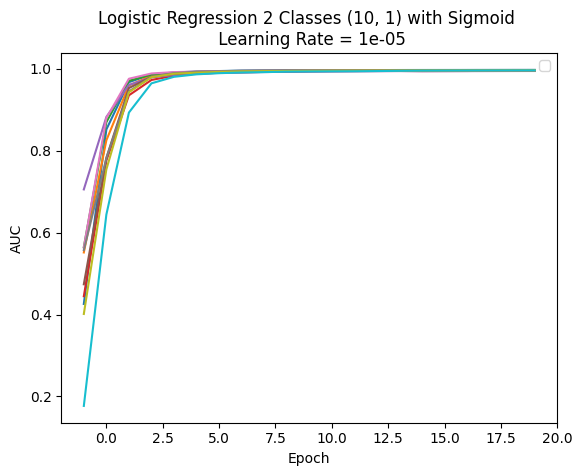

In [70]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()